# Online Retail E-Commerce Analysis

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Veriye Genel Bakış & İlk Keşif Analizi (Data Overview & Initial Exploration)

**TR:**
Bu adımda, veri setinin genel yapısını ve temel özelliklerini anlamak için ilk keşifsel inceleme yapılmıştır.

**EN:** 
At this stage, an initial exploratory analysis was conducted to understand the overall structure and quality of the dataset.

In [314]:
# TR: Veri seti indirilmiştir.
# EN: The dataset is downloaded.

df=pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [315]:
df.shape

(1067371, 8)

In [316]:
# TR: Sütun isimleri incelenmiştir.
# EN: Column names are inspected.

df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

### Veri Setini Anlama (Data Understanding)

#### TR:
Bu bölümde, veri setinde yer alan sütunların neyi temsil ettiği ve analiz kapsamında nasıl kullanıldığı açıklanmıştır.  
Amaç, veri setinin iş mantığını netleştirmek ve sonraki analiz adımları için sağlam bir temel oluşturmaktır.

#### EN:
This section explains what each column in the dataset represents and how it is used throughout the analysis.  
The goal is to clarify the business logic of the dataset and establish a solid foundation for subsequent analytical steps.

---

### Invoice

**TR:**  
Fatura / sipariş numarasını temsil eder.  
Aynı Invoice numarasına sahip birden fazla satır, aynı siparişe ait farklı ürünleri ifade eder.

**EN:**  
Represents the invoice or order identifier.  
Multiple rows sharing the same Invoice value indicate different products belonging to the same order.

---

### StockCode

**TR:**  
Ürünün benzersiz kimlik kodudur.  
Her ürün için ayırt edici bir tanımlayıcı olarak kullanılır.

**EN:**  
Represents the unique identifier of a product.  
Used as a distinct key to differentiate products.

---

### Description

**TR:**  
Ürünün adını veya açıklamasını içerir.  
İnsan tarafından okunabilir ürün bilgisini temsil eder.

**EN:**  
Contains the product name or description.  
Represents human-readable product information.

---

### Quantity

**TR:**  
İlgili üründen kaç adet satıldığını gösterir.  
Satış hacmi ve sepet analizi için kullanılır.

**EN:**  
Indicates the number of units sold for a given product.  
Used in sales volume and basket analysis.

---

### InvoiceDate

**TR:**  
Satışın gerçekleştiği tarih ve saati içerir.  
Zaman serisi ve sezonsallık analizlerinin temelini oluşturur.

**EN:**  
Contains the date and time when the transaction occurred.  
Serves as the basis for time series and seasonality analyses.

---

### Price

**TR:**  
Ürünün birim fiyatını ifade eder.  
Veri seti genelinde para birimi sabittir.

**EN:**  
Represents the unit price of the product.  
The currency is consistent across the dataset.

---

### Customer ID

**TR:**  
Müşterinin benzersiz kimlik numarasıdır.  
Tekrar eden müşterilerin ve müşteri davranışlarının analiz edilmesini sağlar.

**EN:**  
Represents the unique identifier of a customer.  
Enables the analysis of repeat customers and customer behavior.

---

### Country

**TR:**  
Siparişin verildiği ülkeyi belirtir.  
Ülke ve bölge bazlı analizlerde kullanılır.

**EN:**  
Indicates the country where the order was placed.  
Used for country-level and regional analyses.


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [318]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


## Veri Temizleme & Hazırlama (Data Cleaning & Preparation)

**TR:**  
Bu bölümde veri seti analiz için hazırlanacaktır. Eksik ve geçersiz kayıtlar temizlenecek, veri tipleri düzenlenecek ve gerekli değişkenler oluşturulacaktır.

**EN:**  
In this section, the dataset will be prepared for analysis by handling missing and invalid records, standardizing data types, and creating necessary features.


In [319]:
# TR: Eksik değer sayısı analiz edilmiştir.
# EN: Missing value count is analyzed.

df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [320]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)

Customer ID    22.766873
Description     0.410541
Invoice         0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Country         0.000000
dtype: float64

In [321]:
df["Customer ID"].isnull().sum()

243007

In [322]:
df = df.dropna(subset=["Customer ID"])

**TR:**  
Müşteri bazlı analizlerin benzersiz bir müşteri tanımlayıcısı gerektirmesi nedeniyle, Customer ID değeri eksik olan satırlar veri setinden çıkarılmıştır.

**EN:**  
Rows with missing Customer ID were removed, as customer-level analysis requires a unique customer identifier.

In [323]:
df.shape

(824364, 8)

In [324]:
df["Customer ID"].isnull().sum()

0

**Bulgular & Yorumlama (Results & Interpretation)**  
  
**TR:**  
Eksik değerler yüzdelik oranlarına göre değerlendirilmiştir. Customer ID’si eksik olan kayıtlar, müşteri bazlı analizleri etkilemesi nedeniyle kaldırılmış; diğer sütunlardaki ihmal edilebilir düzeydeki eksik değerler ise veri setinde bırakılmıştır.

Müşteri bazlı analizlerin benzersiz bir müşteri tanımlayıcısı gerektirmesi nedeniyle, Customer ID değeri eksik olan satırlar yani toplam 243.007 kayıt (veri setinin %22,8’i) veri setinden çıkarılmıştır.

Description sütunundaki eksik değer oranı oldukça düşük (%0,4) olduğu için, bu sütun doldurulmadan korunmuştur; çünkü temel analitik metrikleri doğrudan etkilememektedir.

**EN:**  
Missing values were evaluated by percentage. Records with missing Customer ID, which are critical for customer-level analysis, were removed; other columns with negligible missing values were retained.

Since customer-level analyses require a unique customer identifier, rows with missing Customer ID were removed; a total of 243,007 records (22.8% of the dataset) were excluded.

The Description column had a very low proportion of missing values (0.4%) and was retained without imputation, as it does not directly affect core analytical metrics.


In [325]:
before_rows = df.shape[0]

df = df[~df["Invoice"].astype(str).str.startswith("C")]

after_rows = df.shape[0]

print("Cancelled invoices removed:", before_rows - after_rows)

Cancelled invoices removed: 18744


In [326]:
before_rows = df.shape[0]

df = df[df["Quantity"] > 0]

after_rows = df.shape[0]
print("Negative or zero quantities removed:", before_rows - after_rows)

Negative or zero quantities removed: 0


In [327]:
before_rows = df.shape[0]

df = df[df["Price"] > 0]

after_rows = df.shape[0]
print("Negative or zero prices removed:", before_rows - after_rows)


Negative or zero prices removed: 71


**Bulgular & Yorumlama (Results & Interpretation)**  
  
**TR:**  

**İade ve Geçersiz İşlem Kayıtlarının Temizlenmesi:**  
Bu aşamada, satış analizini bozabilecek iade ve geçersiz işlem kayıtları veri setinden çıkarılmıştır.

**İptal edilen faturalar (Cancelled Invoices):**  
Invoice numarası “C” ile başlayan kayıtlar, iptal/iade işlemlerini temsil ettiği için veri setinden kaldırılmıştır.
Bu kayıtlar gerçek satış geliri oluşturmadığından, gelir ve müşteri davranışı analizlerini yanıltıcı hâle getirebilir.

**Geçersiz miktar (Quantity ≤ 0):**  
Satılan ürün adedinin sıfır veya negatif olduğu kayıtlar veri setinden çıkarılmıştır.
Bu tür kayıtlar genellikle iade, düzeltme veya hatalı girişleri temsil eder ve gerçek satış davranışını yansıtmaz.

**Geçersiz fiyat (Price ≤ 0):**  
Birim fiyatı sıfır veya negatif olan kayıtlar kaldırılmıştır.
Bu kayıtlar gelir hesaplamalarını doğrudan bozduğu için analiz dışı bırakılmıştır.

**EN:**  

**Removal of Cancellations and Invalid Transactions:**  
At this stage, records that could distort sales and customer behavior analysis were removed.

**Cancelled Invoices:**  
Invoices with IDs starting with “C” were identified as cancelled or returned transactions and removed from the dataset.
Since these records do not represent actual revenue, retaining them would negatively impact sales and revenue analysis.

**Invalid Quantities (Quantity ≤ 0):**  
Transactions with zero or negative quantities were excluded.
These values typically indicate returns, corrections, or data entry errors and do not reflect genuine purchasing behavior.

**Invalid Prices (Price ≤ 0):**  
Records with zero or negative unit prices were removed.
Such values would directly distort revenue calculations and analytical outcomes.

In [328]:
df.shape

(805549, 8)

In [329]:
# TR: Eksik değerler kontrol edilmiştir.
# EN: Missing values are checked.

df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [331]:
# date → datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [332]:
df["Revenue"] = df["Quantity"] * df["Price"]
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month

In [333]:
df["Revenue"] = df["Revenue"].round(2)

In [334]:
# ID → string
df["Invoice"] = df["Invoice"].astype(str)

# Finansal ölçüm → float 
df["Price"] = df["Price"].astype(float)
df["Revenue"] = df["Revenue"].astype(float)

In [335]:
# TR: Customer ID sütunu temizlenmiş ve string veri tipine dönüştürülmüştür.
# EN: The Customer ID column is cleaned and converted to string type.

df['Customer ID'] = (
    df['Customer ID']
    .astype('int64')   # remove .0 by converting to integer
    .astype('string')  # convert to string for ID usage
)


**Bulgular & Yorumlama (Results & Interpretation)**  
  
**TR:**  
Veri tipi dönüşümleri ve yeni değişkenler oluşturularak veri seti analize hazır hale getirilmiştir.
Tarih alanı datetime formatına çevrilmiş, işlem bazlı gelir hesaplanmış, zaman değişkenleri (Year, Month) türetilmiş ve kimlik alanları (Invoice, Customer ID) standartlaştırılmıştır.

**EN:**  
The dataset was standardized and prepared for analysis through data type conversions and feature engineering.
Date fields were converted to datetime, transaction-level revenue was calculated, time-based features (Year, Month) were created, and ID columns were standardized.

In [336]:
# TR: Yinelenen satırlar kontrol edilmiştir.
# EN: Duplicate rows are checked.

df.duplicated().sum()

26124

In [337]:
# TR: Yinelenen satırlar veri setinden kaldırılmıştır.
# EN: Duplicate rows are removed from the dataset.

df = df.drop_duplicates()

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Veri setindeki yinelenen kayıtlar kontrol edilmiş ve tekrar eden satırlar kaldırılarak veri bütünlüğü sağlanmıştır.

**EN:**  
Duplicate records were identified and removed to ensure data integrity.

In [338]:
# TR: Metin sütunlarındaki baş ve sondaki boşluklar temizlenmiştir.
# EN: Leading and trailing spaces in text columns are removed.
df['Description'] = df['Description'].str.strip()

# TR: Metinlerde kelimeler arasındaki birden fazla boşluk tek boşluk haline getirilmiştir.
# EN: Multiple spaces between words are replaced with a single space.
df['Description'] = df['Description'].str.replace(r'\s+', ' ', regex=True)

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ürün açıklamalarındaki baştaki/sondaki boşluklar ve gereksiz çoklu boşluklar temizlenerek metin alanları standartlaştırılmıştır.
Bu işlem, ürün bazlı gruplanma ve metin temelli analizlerde tutarlılığı artırmak amacıyla yapılmıştır.

**EN:**  
Leading/trailing spaces and unnecessary multiple spaces in product descriptions were cleaned to standardize text fields.
This step improves consistency for product-level grouping and text-based analysis.

In [339]:
# df.to_csv("online_retail_cleaned.csv", index=False)

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Tüm temizlik ve hazırlık adımlarının ardından, analiz için hazır hale getirilen veri seti online_retail_cleaned.csv olarak kaydedilmiştir.

**EN:**  
After completing all cleaning and preparation steps, the finalized dataset was saved as online_retail_cleaned.csv for analysis.

In [340]:
df = pd.read_csv(
    "online_retail_cleaned.csv",
    dtype={"Invoice": str, "Customer ID": str}
)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Temizlenmiş veri seti uygun veri tipleriyle yeniden yüklenmiş ve analiz için hazır hale getirilmiştir.

**EN:**  
The cleaned dataset was reloaded with appropriate data types and prepared for analysis.

In [341]:
df.shape

(779425, 11)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779425 entries, 0 to 779424
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  object        
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  object        
 7   Country      779425 non-null  object        
 8   Revenue      779425 non-null  float64       
 9   Year         779425 non-null  int64         
 10  Month        779425 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 65.4+ MB


## 1. Sipariş Bazlı Analiz (Order-Level Analysis)

**TR:**  
Bu bölümde, sipariş bazlı analiz yapılacaktır. Her siparişin toplam geliri, toplam ürün sayısı, sipariş tipi ve benzersiz ürün sayısı incelenecektir.

**EN:**  
In this section, order-level analysis will be performed. Total revenue, total items, order type, and unique products per order will be examined for each order.


### 1.1 Sipariş Verisinin Hazırlanması (Order-Level Dataset Creation)

In [343]:
# TR: Her bir Invoice kaydının bir siparişi temsil ettiği varsayımıyla veri gruplanmıştır.
# EN: The data is grouped by Invoice, assuming each invoice represents a single order.

order_summary = (
    df.groupby('Invoice')
    .agg(
        total_revenue=('Revenue', 'sum'),      # Total revenue per order / Sipariş toplam geliri
        total_quantity=('Quantity', 'sum'),    # Total items per order / Siparişteki toplam ürün sayısı
        customer_id=('Customer ID', 'first'),  # Customer who placed the order / Siparişi veren müşteri
        country=('Country', 'first')            # Country of the order / Siparişin ülkesi
    )
    .reset_index()
)

order_summary.head()


,Invoice,total_revenue,total_quantity,customer_id,country
0,489434,505.30,166,13085,United Kingdom
1,489435,145.80,60,13085,United Kingdom
2,489436,630.33,193,13078,United Kingdom
3,489437,310.75,145,15362,United Kingdom
4,489438,2286.24,826,18102,United Kingdom


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Her invoice bir siparişi temsil edecek şekilde veri gruplandırılmıştır. Her sipariş için toplam gelir (total_revenue), toplam ürün adedi (total_quantity), siparişi veren müşteri ve siparişin ülkesi özetlenmiştir. Bu adım, sipariş bazlı analizlerin temelini oluşturur ve sonraki hesaplamalar için gerekli veriyi sağlar.

**EN:**  
Data was grouped by invoice, with each invoice representing a single order. total_revenue, total_quantity, the customer who placed the order, and the country of the order were aggregated for each order. This step forms the foundation for order-level analyses and provides the necessary dataset for subsequent calculations.


### 1.2 Genel Sipariş Metrikleri (Overall Order Metrics)

In [344]:
# TR: Toplam sipariş sayısı hesaplanmıştır.
# EN: The total number of orders is calculated.

total_orders = order_summary['Invoice'].nunique()
total_orders

36969

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Veri setinde toplam **36.969 sipariş** bulunmaktadır. Bu, analiz için değerlendireceğimiz toplam işlem sayısını gösterir.

**EN:**  
There are a total of **36,969 orders** in the dataset. This represents the total number of transactions considered for analysis.


In [345]:
# TR: Sipariş başına ortalama gelir (Average Order Value - AOV) hesaplanmıştır.
# EN: The Average Order Value (AOV) is calculated.

average_order_value = order_summary['total_revenue'].mean()
average_order_value

469.98307365630666

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Sipariş başına ortalama gelir (AOV) yaklaşık **469,98** olarak hesaplanmıştır. Bu değer, bir siparişin ortalama olarak ne kadar gelir getirdiğini göstermektedir.

**EN:**  
The average order value (AOV) is approximately **469.98**. This indicates the average revenue generated per order.


In [346]:
# TR: Sipariş başına ortalama ürün sayısı hesaplanmıştır.
# EN: The average number of items per order is calculated.

average_items_per_order = order_summary['total_quantity'].mean()
average_items_per_order


284.3991452297871

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Sipariş başına ortalama ürün sayısı yaklaşık **284,40** olarak hesaplanmıştır. Bu değer, tipik bir siparişte kaç ürün bulunduğunu gösterir.

**EN:**  
The average number of items per order is approximately **284.40**. This indicates how many items are typically included in an order.


### 1.3 Yüksek Değerli Siparişler (High-Value Orders)

In [347]:
# En yüksek tutarlı 10 sipariş
# Top 10 highest value orders

top_orders = order_summary.sort_values(
    by='total_revenue',
    ascending=False
).head(10)

top_orders


,Invoice,total_revenue,total_quantity,customer_id,country
36936,581483,168469.60,80995,16446,United Kingdom
20346,541431,77183.60,74215,12346,United Kingdom
1604,493819,44051.60,25018,14156,EIRE
26362,556444,38970.00,60,15098,United Kingdom
13428,524181,33167.80,8172,17450,United Kingdom
30854,567423,31698.16,12572,17450,United Kingdom
14625,526934,26007.08,5079,18102,United Kingdom
10023,515944,22863.36,4992,18102,United Kingdom
26548,556917,22775.93,15049,12415,Australia
32893,572209,22206.00,1920,18102,United Kingdom


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
En yüksek tutarlı 10 sipariş incelendiğinde, toplam gelir bakımından büyük bir fark olduğu ve bazı siparişlerin toplam satışın önemli bir kısmını oluşturduğu görülmektedir. Bu siparişler genellikle yüksek miktarda ürün içeriyor ve belirli müşterilere veya ülkelere aittir.

**EN:**  
Examining the top 10 highest value orders shows a significant difference in total revenue, with some orders contributing a substantial portion of overall sales. These orders typically contain a large number of items and are associated with specific customers or countries.


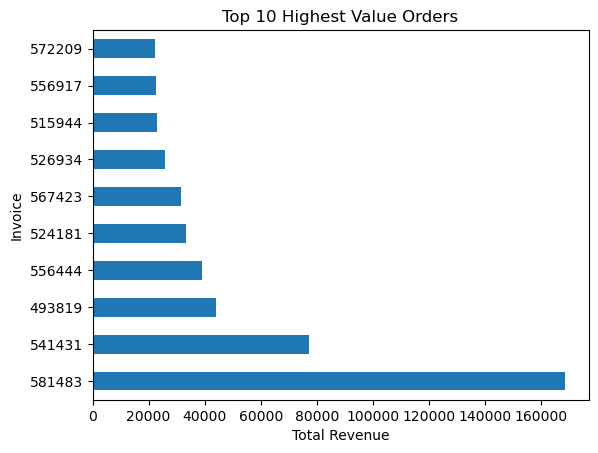

In [348]:
# TR: En yüksek tutarlı ilk 10 sipariş analiz edilmiştir.
# EN: The top 10 highest-value orders are analyzed.

top_orders_plot = top_orders.set_index('Invoice')['total_revenue']

top_orders_plot.plot(kind='barh')
plt.xlabel('Total Revenue')
plt.title('Top 10 Highest Value Orders')
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, en yüksek gelire sahip 10 siparişi göstermektedir. En üstte yer alan siparişin diğerlerine kıyasla çok daha yüksek bir gelir oluşturduğu ve gelir dağılımında belirgin bir eşitsizlik olduğu görülmektedir. Bu durum, toplam gelirin önemli bir kısmının az sayıda yüksek değerli siparişten geldiğini göstermektedir.

**EN:**  
The chart displays the top 10 highest value orders. The highest-ranking order generates significantly more revenue than the others, highlighting a strong imbalance in revenue distribution. This indicates that a small number of high-value orders contribute disproportionately to total revenue.


### 1.4 Sipariş Tipi Analizi (Single vs Multi-Item Orders)

In [349]:
# TR: Ürün sayısına göre sipariş tipleri oluşturulmuştur.
# EN: Order types are created based on the number of items.

order_summary['order_type'] = order_summary['total_quantity'].apply(
    lambda x: 'Single-item order' if x == 1 else 'Multi-item order'
)

# TR: Sipariş tiplerinin dağılımı hesaplanmıştır.
# EN: Order types are counted.
order_type_counts = order_summary['order_type'].value_counts()

order_type_counts


order_type
Multi-item order     36442
Single-item order      527
Name: count, dtype: int64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Siparişler, ürün sayısına göre **Single-item** ve **Multi-item** olarak sınıflandırılmıştır. Çıktıya göre çoğu sipariş (36.442) birden fazla ürün içerirken, yalnızca 527 sipariş tek ürün içermektedir. Bu, müşterilerin büyük çoğunluğunun birden fazla ürün sipariş ettiğini göstermektedir.

**EN:**  
Orders were classified based on the number of items as **Single-item** and **Multi-item**. According to the output, most orders (36,442) contain multiple items, while only 527 orders contain a single item. This indicates that the majority of customers purchase more than one product per order.


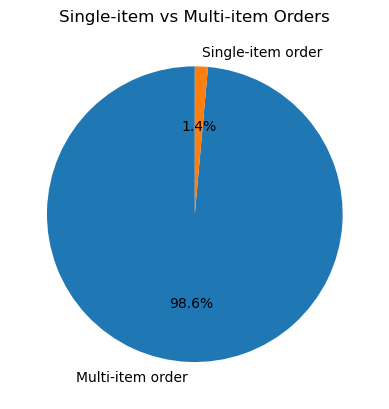

In [350]:
# TR: Sipariş tiplerinin dağılımı pasta grafik ile görselleştirilmiştir.
# EN: The distribution of order types is visualized using a pie chart.

order_type_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''
)

plt.title('Single-item vs Multi-item Orders')
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Pasta grafiğe göre siparişlerin %98,6’sı **Multi-item**, yalnızca %1,4’ü **Single-item** siparişlerden oluşmaktadır. Bu, müşterilerin büyük çoğunluğunun birden fazla ürün içeren siparişler verdiğini göstermektedir.

**EN:**  
According to the pie chart, 98.6% of orders are **Multi-item**, while only 1.4% are **Single-item** orders. This indicates that the vast majority of customers place orders containing multiple products.


### 1.5 Ürün Çeşitliliğine Göre Sipariş Yapısı (Order Structure by Product Diversity)

In [351]:
# TR: Sipariş başına benzersiz ürün sayısı hesaplanmıştır.
# EN: The number of unique products per order is calculated.

unique_products_per_order = (
    df.groupby('Invoice')['StockCode']
    .nunique()
    .reset_index(name='unique_product_count')
)

unique_products_per_order['order_type_detailed'] = unique_products_per_order[
    'unique_product_count'
].apply(
    lambda x: 'Single product type' if x == 1 else 'Multiple product types'
)

unique_products_per_order['order_type_detailed'].value_counts(normalize=True) * 100


order_type_detailed
Multiple product types    91.690335
Single product type        8.309665
Name: proportion, dtype: float64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Siparişlerin yaklaşık %91,7’si birden fazla ürün türü içerirken, yalnızca %8,3’ü tek ürün türünden oluşmaktadır. Bu, müşterilerin çoğunlukla çeşitli ürünleri birlikte sipariş ettiğini göstermektedir.

**EN:**  
Approximately 91.7% of orders contain multiple product types, while only 8.3% consist of a single product type. This indicates that customers generally order a variety of products together.


### 1.6 Sipariş Gelir Dağılımı (Order Revenue Distribution)

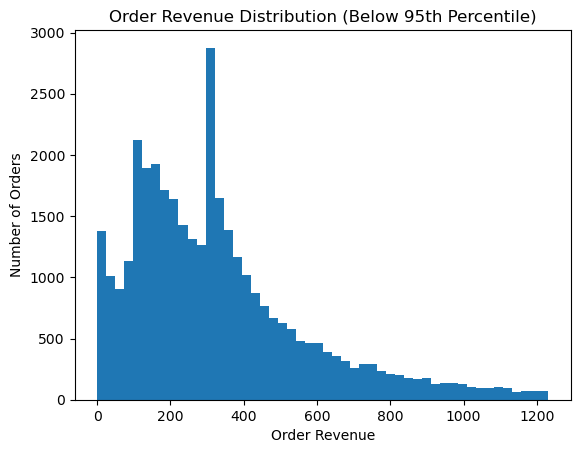

In [352]:
# TR: Görselleştirmede aşırı yığılmayı (overplotting) önlemek amacıyla, sipariş gelirlerinin ilk %95'lik dilimine odaklanılmıştır.
# EN: To avoid overplotting in visualizations, the analysis focuses on the top 95% of order revenues.

upper_limit = order_summary['total_revenue'].quantile(0.95)

plt.hist(
    order_summary[order_summary['total_revenue'] <= upper_limit]['total_revenue'],
    bins=50
)

plt.xlabel('Order Revenue')
plt.ylabel('Number of Orders')
plt.title('Order Revenue Distribution (Below 95th Percentile)')
plt.show()



**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Histogram, sipariş gelirlerinin %95’lik alt kısmına odaklanmaktadır. Grafiğe göre siparişlerin büyük çoğunluğu düşük ve orta gelir aralığında yoğunlaşmıştır. Gelir arttıkça sipariş sayısının belirgin şekilde azaldığı görülmektedir. Dağılım sağa çarpıktır; bu da az sayıda yüksek tutarlı siparişin toplam gelir üzerinde orantısız bir etkiye sahip olduğunu göstermektedir.

**EN:**  
The histogram focuses on the lower 95% of order revenues. The chart shows that most orders are concentrated in the low to mid revenue range, while the number of orders decreases as revenue increases. The distribution is right-skewed, indicating that a small number of high-value orders have a disproportionate impact on total revenue.


### 1.7 Sipariş Başına Ürün Sayısı Dağılımı (Distribution of Items per Order)

In [353]:
# TR: Sipariş başına toplam ürün sayısı hesaplanmıştır.
# EN: The total number of items per order is calculated.
items_per_order = df.groupby('Invoice')['Quantity'].sum()

# TR: Aynı ürün sayısına sahip siparişlerin frekansı hesaplanmıştır.
# EN: The frequency of orders with the same number of items is calculated.
item_counts = items_per_order.value_counts().sort_index()

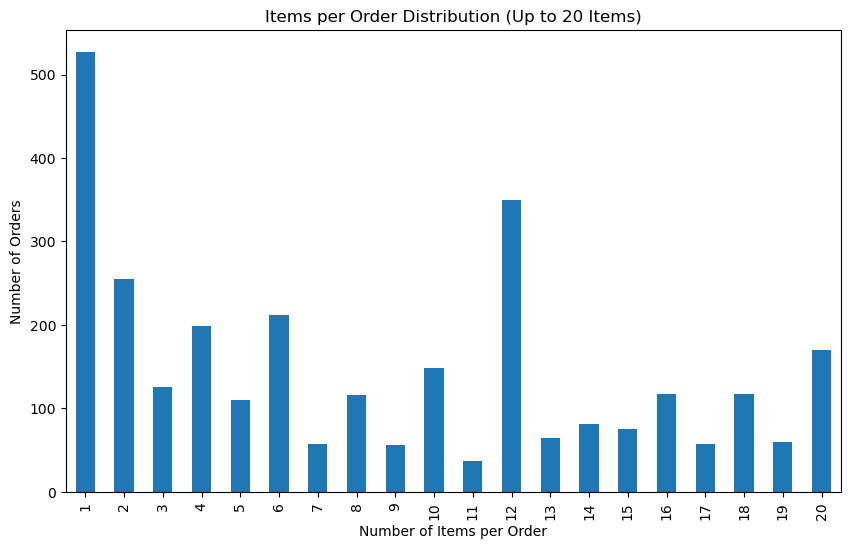

In [354]:
# TR: Görselleştirme amacıyla sipariş başına ürün sayısı 20 ile sınırlandırılmıştır.
# EN: For visualization purposes, the number of items per order is limited to 20.

plt.figure(figsize=(10,6))
item_counts_limited = item_counts[item_counts.index <= 20]

item_counts_limited.plot(kind='bar')
plt.xlabel('Number of Items per Order')
plt.ylabel('Number of Orders')
plt.title('Items per Order Distribution (Up to 20 Items)')
plt.show()



**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, sipariş başına ürün sayısının dağılımını (20 ürüne kadar) göstermektedir. En yaygın sipariş tipi tek ürünlü siparişlerdir. Bununla birlikte, 2–6 ürün içeren siparişler de önemli bir paya sahiptir. Ürün sayısı arttıkça sipariş sayısının genel olarak azaldığı, ancak belirli ürün sayılarında (örneğin 12 veya 20 ürün) yerel artışlar olduğu gözlemlenmektedir. Bu durum, standart müşteri siparişlerinin yanında toplu veya özel siparişlerin de bulunduğunu göstermektedir.

**EN:**  
The chart shows the distribution of the number of items per order (up to 20 items). Single-item orders are the most common, followed by orders containing 2–6 items. As the number of items increases, the number of orders generally decreases; however, noticeable spikes at certain item counts (such as 12 or 20 items) suggest the presence of bulk or special orders alongside typical customer purchases.


### 1.8 Sipariş Büyüklüğü ve Gelir İlişkisi (Relationship Between Order Size and Revenue)

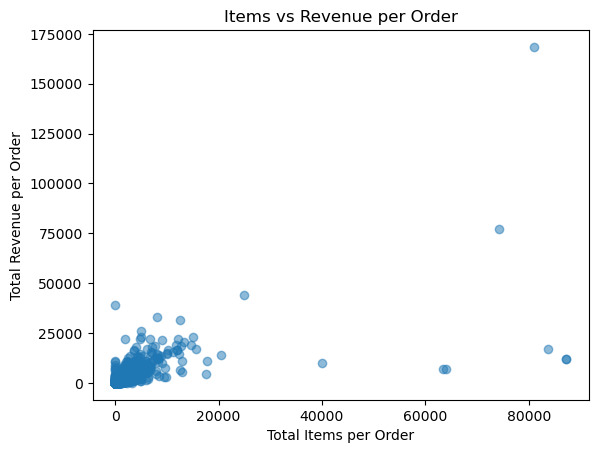

In [355]:
# TR: Sipariş başına ürün sayısı ile sipariş geliri arasındaki ilişki scatter grafik ile analiz edilmiştir.
# EN: The relationship between items per order and order revenue is analyzed using a scatter plot.

plt.scatter(
    order_summary['total_quantity'],
    order_summary['total_revenue'],
    alpha=0.5
)

plt.xlabel('Total Items per Order')
plt.ylabel('Total Revenue per Order')
plt.title('Items vs Revenue per Order')
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Dağılım grafiği, sipariş başına ürün sayısı ile toplam gelir arasında genel olarak **pozitif bir ilişki** olduğunu göstermektedir. Çoğu sipariş düşük ürün sayısı ve düşük gelir aralığında yoğunlaşırken, az sayıda sipariş hem çok yüksek ürün adedi hem de çok yüksek gelir oluşturmaktadır. Bu durum, büyük ve toplu siparişlerin gelir üzerinde belirleyici bir rol oynadığını göstermektedir.

**EN:**  
The scatter plot shows a generally **positive relationship** between the number of items per order and total revenue. Most orders are concentrated in the low item–low revenue range, while a small number of orders generate both very high item counts and very high revenue. This indicates that large or bulk orders play a significant role in total revenue generation.


### Öngörü Özeti (Insight Summary)

**TR:**  
- Siparişlerin büyük çoğunluğu **çok ürünlü** ve **birden fazla ürün çeşidi** içermektedir; bu durum müşterilerin tekil ürün yerine **sepet bazlı alışveriş** eğilimi gösterdiğini ortaya koymaktadır.
- Ortalama sipariş değeri (AOV) ve sipariş başına ürün sayısı, sipariş davranışlarının **yüksek hacimli** olduğunu göstermektedir.
- Sipariş gelir dağılımı **sağa çarpık (right-skewed)** bir yapı sergilemekte; az sayıdaki **yüksek tutarlı sipariş**, toplam gelirin önemli bir bölümünü oluşturmaktadır.
- En yüksek değerli siparişler incelendiğinde, bu siparişlerin genellikle **çok yüksek ürün adetleri** ile gerçekleştiği görülmektedir.
- Sipariş başına ürün sayısı ile sipariş geliri arasında **pozitif bir ilişki** bulunmaktadır; ancak bu ilişki doğrusal değildir ve bazı siparişler **aykırı değer (outlier)** niteliği taşımaktadır.
- Genel sipariş yapısı, **cross-sell** ve **upsell** stratejilerinin uygulanması için uygun bir müşteri davranış profiline işaret etmektedir.

**EN:**  
- The majority of orders consist of **multiple items** and **multiple product types**, indicating a strong **basket-based purchasing behavior** rather than single-item transactions.
- The average order value (AOV) and the number of items per order suggest a **high-volume order structure**.
- The order revenue distribution is **right-skewed**, where a small number of **high-value orders** contribute significantly to total revenue.
- Analysis of the highest-value orders shows that these transactions are typically associated with **very large item quantities**.
- There is a **positive relationship** between the number of items per order and total order revenue; however, the relationship is not linear and includes notable **outliers**.
- Overall, the order structure reflects a customer behavior pattern well-suited for **cross-selling** and **upselling** strategies.

## 2. Ürün Performans Analizi (Product Performance Analysis)

**TR:**  
Bu bölümde ürün bazlı performans analiz edilecektir. Ürünlerin satış miktarı, toplam gelir katkısı ve öne çıkan ürünler incelenecektir.

**EN:**  
In this section, product-level performance will be analyzed. Sales volume, total revenue contribution, and top-performing products will be examined.


### 2.1 Ürün Verisinin Hazırlanması (Product Dataset Preparation)

In [356]:
# TR: Ürün olmayan ve test amaçlı kullanılan stok kodları tanımlanmıştır.
# EN: Non-product and test stock codes are identified.
exclude_codes = [
    'POST', 'DOT', 'BANK CHARGES',
    'ADJUST', 'ADJUST2', 'M', 'D', 'C2',
    'TEST1001', 'TEST1002'
]

# TR: Sadece gerçek ürünleri içeren dataframe
# EN: Create product-only dataframe
df_products = df[~df['StockCode'].isin(exclude_codes)].copy()

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ürün performans analizinin yalnızca gerçek ürünler üzerinden yapılabilmesi için, ürün olmayan veya test amaçlı kullanılan stok kodları veri setinden çıkarılmıştır. Bu filtreleme, ürün bazlı analizlerin doğruluğunu artırmak amacıyla uygulanmıştır.

**EN:**  
To ensure that product performance analysis is based solely on actual products, non-product and test stock codes were excluded from the dataset. This filtering step improves the accuracy of product-level insights.


### 2.2 Satış Adedine Göre En Çok Satan Ürünler (Top-Selling Products by Sales Volume)

In [357]:
# TR: Ürün bazında toplam satılan adet hesaplanmıştır.
# EN: Total quantity sold per product is calculated.
top_products_quantity = (
    df_products
    .groupby(['StockCode', 'Description'])['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products_quantity

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
85123A     WHITE HANGING HEART T-LIGHT HOLDER     91757
23843      PAPER CRAFT , LITTLE BIRDIE            80995
84879      ASSORTED COLOUR BIRD ORNAMENT          78234
23166      MEDIUM CERAMIC TOP STORAGE JAR         77916
85099B     JUMBO BAG RED RETROSPOT                74224
17003      BROCADE RING PURSE                     70082
21977      PACK OF 60 PINK PAISLEY CAKE CASES     54592
84991      60 TEATIME FAIRY CAKE CASES            52828
21212      PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: Quantity, dtype: int64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ürün bazında toplam satılan adetler incelendiğinde, belirli ürünlerin satış hacmi açısından açık ara öne çıktığı görülmektedir. Bu ürünler, yüksek talep gören ve satış hacmi bakımından işletme performansına önemli katkı sağlayan ürünlerdir. Satış miktarı yüksek olan bu ürünler, stok yönetimi ve tedarik planlaması açısından kritik öneme sahiptir.

**EN:**  
When examining total quantities sold per product, a small number of products clearly stand out in terms of sales volume. These high-demand products contribute significantly to overall sales performance and are particularly important for inventory management and supply planning.


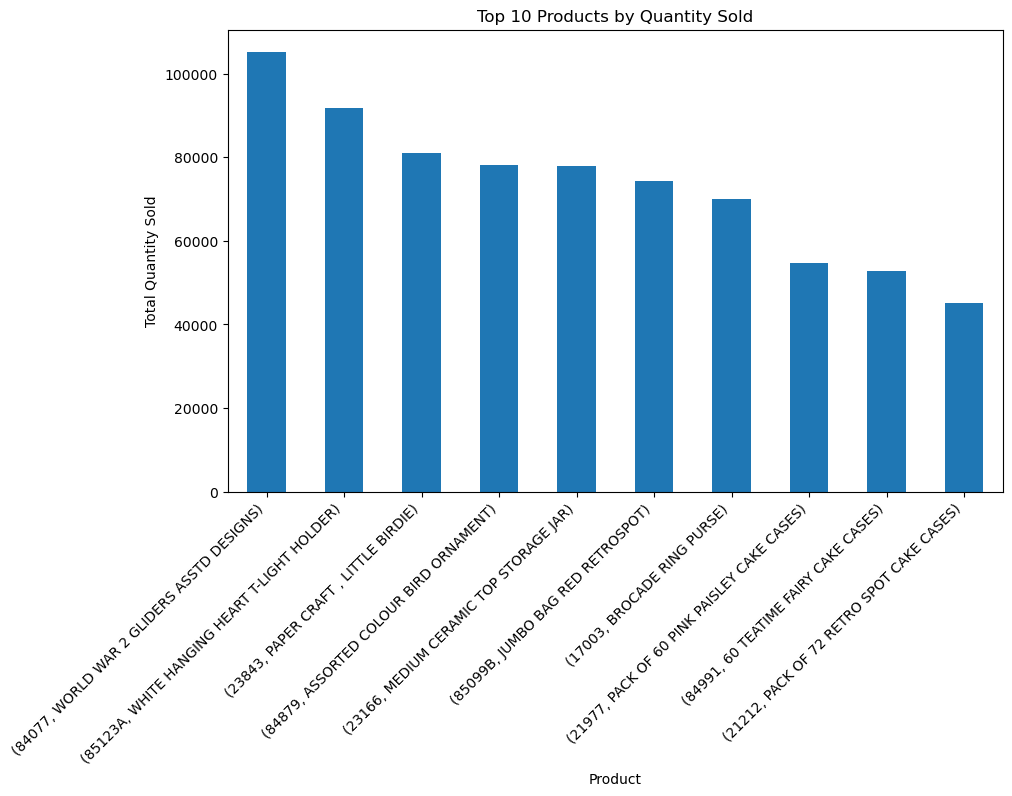

In [358]:
# TR: En çok satılan ilk 10 ürün, satış adedine göre çubuk grafik ile görselleştirilmiştir.
# EN: The top 10 best-selling products by quantity are visualized using a bar chart.
plt.figure(figsize=(10,6))
top_products_quantity.plot(kind='bar')

plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')

plt.xticks(rotation=45, ha='right')
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, satış adedi bazında en çok satılan 10 ürünü göstermektedir. Belirli ürünlerin diğerlerine kıyasla açık ara daha yüksek satış hacmine sahip olduğu görülmektedir. Bu ürünler, yüksek talep gören “best-seller” ürünler olup, stok yönetimi ve tedarik planlamasında öncelikli olarak ele alınmalıdır.

**EN:**  
The chart displays the top 10 products by quantity sold. A small number of products clearly dominate sales volume, indicating strong customer demand. These best-selling products should be prioritized in inventory management and supply planning.


### 2.3 Gelire Göre En Çok Kazandıran Ürünler (Top Revenue-Generating Products)

In [359]:
# TR: Ürün bazında toplam gelir hesaplanmıştır.
# EN: Total revenue per product is calculated.
top_products_revenue = (
    df_products
    .groupby(['StockCode', 'Description'])['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products_revenue


StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              277656.25
85123A     WHITE HANGING HEART T-LIGHT HOLDER    247048.01
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
85099B     JUMBO BAG RED RETROSPOT               134307.44
84879      ASSORTED COLOUR BIRD ORNAMENT         124351.86
47566      PARTY BUNTING                         103283.38
23166      MEDIUM CERAMIC TOP STORAGE JAR         81416.73
22086      PAPER CHAIN KIT 50'S CHRISTMAS         76598.18
79321      CHILLI LIGHTS                          69084.30
85099F     JUMBO BAG STRAWBERRY                   64127.77
Name: Revenue, dtype: float64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ürün bazında toplam gelir incelendiğinde, satış adedi en yüksek olan ürünlerle gelir bazında en yüksek performansı gösteren ürünlerin her zaman aynı olmadığı görülmektedir. Bazı ürünler daha düşük adetlerde satılmasına rağmen yüksek birim fiyatları sayesinde daha fazla gelir yaratmaktadır. Bu durum, ürün performansının yalnızca satış hacmiyle değil, fiyatlandırma stratejisiyle birlikte değerlendirilmesi gerektiğini göstermektedir.

**EN:**  
When analyzing total revenue per product, it becomes clear that the products with the highest sales volume are not always the top revenue generators. Some products generate higher revenue despite lower sales quantities due to higher unit prices. This highlights the importance of evaluating product performance by combining both sales volume and pricing strategy.


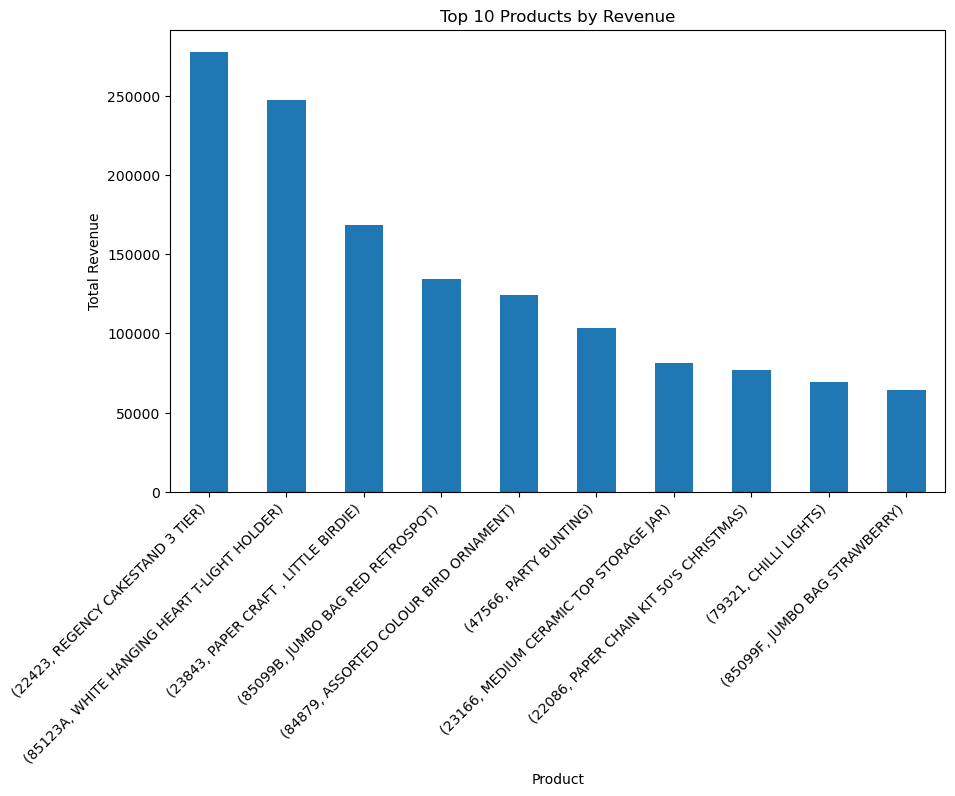

In [360]:
# TR: En çok gelir getiren ilk 10 ürün çubuk grafik ile görselleştirilmiştir.
# EN: The top 10 revenue-generating products are visualized using a bar chart.
plt.figure(figsize=(10,6))
top_products_revenue.plot(kind='bar')

plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Revenue')

plt.xticks(rotation=45, ha='right')
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, toplam gelir bazında en yüksek performans gösteren 10 ürünü göstermektedir. Bazı ürünlerin satış adedi en yüksek ürünler arasında yer almasa da, yüksek birim fiyatları sayesinde gelir açısından öne çıktığı görülmektedir. Bu sonuç, ürün performansının değerlendirilmesinde yalnızca satış miktarının değil, fiyatlandırmanın da kritik bir rol oynadığını göstermektedir.

**EN:**  
The chart shows the top 10 products by total revenue. Some products stand out in terms of revenue despite not having the highest sales volumes, due to higher unit prices. This demonstrates that product performance should be evaluated not only by quantity sold but also by pricing strategy.


### 2.4 Ürün Performans Matrisi (Adet vs Gelir) (Product Performance Matrix: Quantity vs Revenue)

In [361]:
# TR: Ürün bazında toplam satış adedi ve toplam gelir hesaplanmıştır.
# EN: Total quantity sold and total revenue per product are calculated.
product_performance = (
    df_products
    .groupby(['StockCode', 'Description'])
    .agg(
        Total_Quantity=('Quantity', 'sum'),
        Total_Revenue=('Revenue', 'sum')
    )
    .reset_index()
)


### 2.5 Çok Satan Ama Düşük Gelir Getiren Ürünler (High-Quantity, Low-Revenue Products)

In [362]:
# TR: Analiz için eşik değerler belirlenmiştir.
# EN: Threshold values are defined for analysis.
high_quantity_threshold = product_performance['Total_Quantity'].quantile(0.75)
low_revenue_threshold = product_performance['Total_Revenue'].quantile(0.25)

# TR: Çok satılan ancak düşük gelir sağlayan ürünler filtrelenmiştir.
# EN: High-quantity, low-revenue products are filtered.
high_qty_low_rev = product_performance[
    (product_performance['Total_Quantity'] >= high_quantity_threshold) &
    (product_performance['Total_Revenue'] <= low_revenue_threshold)
]

high_qty_low_rev

,StockCode,Description,Total_Quantity,Total_Revenue
5,10123G,ARMY CAMO WRAPPING TAPE,2246,157.18
42,16043,POP ART PUSH DOWN RUBBER,2142,179.04
52,16053,POPART COL BALLPOINT PEN ASST,4298,182.58
3266,35015,JACOBS LADDER SMALL,2064,123.84


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu analiz, satış adedi yüksek olmasına rağmen toplam gelir katkısı düşük olan ürünleri ortaya çıkarmaktadır. Sonuçlara göre bazı ürünler yüksek hacimde satılmasına rağmen düşük birim fiyatları nedeniyle sınırlı gelir üretmektedir. Bu ürünler, fiyatlandırma stratejilerinin gözden geçirilmesi, paketleme (bundle) fırsatları veya maliyet optimizasyonu açısından değerlendirilmesi gereken ürünlerdir.

**EN:**  
This analysis identifies products that sell in high volumes but generate relatively low total revenue. The results show that some products, despite strong sales quantities, contribute limited revenue due to low unit prices. These products may require a review of pricing strategy, bundling opportunities, or cost optimization to improve profitability.


### 2.6 Az Satan Ama Yüksek Gelir Getiren (Premium) Ürünler (Low-Quantity, High-Revenue Products)

In [363]:
# TR: Düşük satış adedine sahip olup yüksek gelir sağlayan ürünler analiz edilmiştir.
# EN: Products with low sales volume but high revenue are analyzed.

# TR: Analiz için eşik değerler belirlenmiştir.
# EN: Threshold values are defined for analysis.
low_quantity_threshold = product_performance['Total_Quantity'].quantile(0.25)
high_revenue_threshold = product_performance['Total_Revenue'].quantile(0.75)

# TR: Premium ürünler filtrelenmiştir.
# EN: Premium products are filtered.
low_qty_high_rev = product_performance[
    (product_performance['Total_Quantity'] <= low_quantity_threshold) &
    (product_performance['Total_Revenue'] >= high_revenue_threshold)
]

low_qty_high_rev


,StockCode,Description,Total_Quantity,Total_Revenue
1934,22502,PICNIC BASKET WICKER 60 PIECES,61,39619.5
2116,22655,VINTAGE RED KITCHEN CABINET,75,12550.0
2117,22656,VINTAGE BLUE KITCHEN CABINET,45,9290.0
2318,22823,CHEST NATURAL WOOD 20 DRAWERS,32,3655.0
2321,22826,LOVE SEAT ANTIQUE WHITE METAL,58,6210.0
2323,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,38,5910.0


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu analiz, satış adedi düşük olmasına rağmen yüksek toplam gelir sağlayan ürünleri ortaya çıkarmaktadır. Sonuçlar, bu ürünlerin genellikle yüksek birim fiyatlı veya premium segmentte yer aldığını göstermektedir. Bu tür ürünler, düşük hacimle yüksek gelir üreterek kârlılığı artırmakta ve ürün portföyünde stratejik bir rol oynamaktadır.

**EN:**  
This analysis identifies products that generate high total revenue despite low sales quantities. The results indicate that these products typically belong to a high-priced or premium segment. Such products play a strategic role in the product portfolio by contributing significantly to revenue with relatively low sales volume.


### 2.7 Ürün Fiyat Dağılımı (Aykırı Değerler Hariç) (Product Price Distribution – Excluding Outliers)

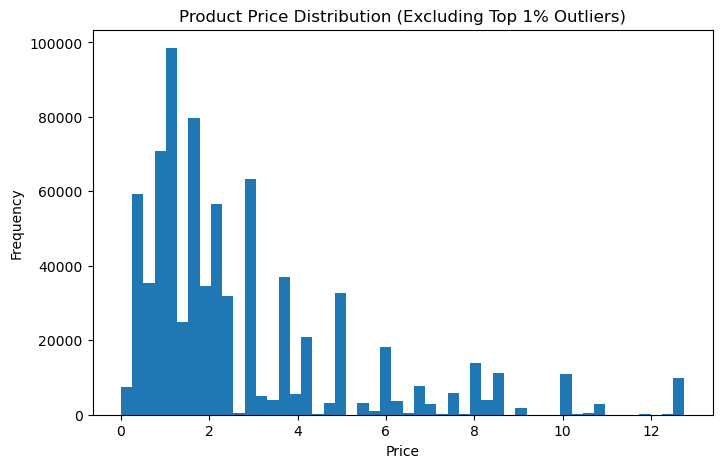

In [364]:
# TR: Görselleştirmeyi bozabilecek uç fiyat değerleri kırpılmıştır.
# EN: Extreme price outliers are removed for visualization purposes.
price_upper_limit = df_products['Price'].quantile(0.99)
price_filtered = df_products[df_products['Price'] <= price_upper_limit]

plt.figure(figsize=(8,5))
plt.hist(price_filtered['Price'], bins=50)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Product Price Distribution (Excluding Top 1% Outliers)')

plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, uç değerlerin (%1 en yüksek fiyatlar) hariç tutulmasıyla ürün fiyatlarının genel dağılımını göstermektedir. Sonuçlar, ürünlerin büyük çoğunluğunun düşük fiyat aralığında yoğunlaştığını, daha yüksek fiyatlı ürünlerin ise nispeten az sayıda olduğunu ortaya koymaktadır. Bu durum, veri setinde hacim odaklı düşük fiyatlı ürünler ile az sayıda premium ürünün birlikte bulunduğunu göstermektedir.

**EN:**  
The chart illustrates the overall distribution of product prices after excluding extreme outliers (top 1%). The results show that most products are concentrated in the lower price range, while higher-priced products are relatively rare. This indicates a product mix dominated by low-priced, high-volume items alongside a smaller number of premium products.


### 2.8 Ürün Bazında Fiyat Çeşitliliği (Price Variation Analysis)

In [365]:
# TR: Aynı ürünün farklı fiyatlardan satılıp satılmadığı analiz edilmiştir.
# EN: Whether the same product is sold at different prices is analyzed.

# TR: Ürün bazında benzersiz fiyat sayısı hesaplanmıştır.
# EN: The number of unique prices per product is calculated.
price_variation = (
    df_products
    .groupby(['StockCode', 'Description'])['Price']
    .nunique()
    .sort_values(ascending=False)
)

# TR: Fiyat çeşitliliği yüksek ürünler gösterilmiştir.
# EN: Products with high price variation are displayed.
price_variation.head(10)


StockCode  Description                      
21166      COOK WITH WINE METAL SIGN            13
82484      WOOD BLACK BOARD ANT WHITE FINISH    11
48194      DOORMAT HEARTS                       11
48188      DOORMAT WELCOME PUPPIES              10
48138      DOORMAT UNION FLAG                   10
21175      GIN + TONIC DIET METAL SIGN          10
85152      HAND OVER THE CHOCOLATE SIGN         10
22414      DOORMAT NEIGHBOURHOOD WITCH          10
22365      DOORMAT RESPECTABLE HOUSE            10
22690      DOORMAT HOME SWEET HOME BLUE          9
Name: Price, dtype: int64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Sonuçlar, bazı ürünlerin zaman içinde birden fazla farklı fiyatla satıldığını göstermektedir. Özellikle fiyat çeşitliliği yüksek olan ürünler, kampanya, indirim, dönemsel fiyatlama veya müşteri segmentine göre farklı fiyatlandırma stratejilerinin uygulanmış olabileceğine işaret etmektedir. Bu durum, ürün bazlı fiyat analizlerinin tek bir fiyat varsayımıyla yapılmaması gerektiğini göstermektedir.

**EN:**  
The results indicate that some products have been sold at multiple different prices over time. Products with high price variation suggest the use of promotional discounts, seasonal pricing, or customer-specific pricing strategies. This highlights that product-level price analysis should not assume a single fixed price.


### Öngörü Özeti (Insight Summary)

**TR:**  
Ürün performansı analizi, satış hacmi ile gelir katkısı arasında her zaman doğrusal bir ilişki olmadığını göstermektedir. Bazı ürünler yüksek adet satmasına rağmen düşük gelir üretirken, az satılan ancak yüksek gelir getiren premium ürünler net biçimde ayrışmaktadır. Fiyat dağılımı, ürünlerin büyük ölçüde düşük ve orta fiyat aralığında yoğunlaştığını, belirli ürünlerde ise kampanya ve dönemsel fiyatlandırma uygulandığını ortaya koymaktadır. Bu bulgular, hacim odaklı ve değer odaklı ürünlerin farklı fiyatlandırma ve pazarlama stratejileriyle yönetilmesi gerektiğini göstermektedir.

**EN:**  
The product performance analysis shows that high sales volume does not always translate into high revenue. While some products generate large quantities with low revenue contribution, a distinct group of low-volume, high-revenue premium products stands out. Price distribution indicates a strong concentration in lower price ranges, with evidence of promotional or time-based pricing for certain products. These findings highlight the need for differentiated strategies between volume-driven and value-driven products.

## 3. Müşteri Davranışı Analizi (Customer Behavior Analysis)

**TR:**  
Bu bölümde müşteri davranışları analiz edilecektir. Müşterilerin satın alma sıklığı, harcama düzeyleri ve alışveriş kalıpları incelenerek farklı müşteri profilleri ortaya konulacaktır.

**EN:**  
In this section, customer behavior will be analyzed. Purchasing frequency, spending levels, and shopping patterns will be examined to identify different customer profiles.


### 3.1 Genel Müşteri Büyüklüğü (Overall Customer Base)

In [366]:
# Toplam Müşteri
# Total Customers
df['Customer ID'].nunique()

5878

### 3.2 Aylık Aktif Müşteri Analizi (Monthly Active Customers)

In [367]:
# TR: Aylık aktif müşteri sayısı hesaplanmıştır.
# EN: The monthly active customer count is calculated.

monthly_active_customers = (
    df.groupby(['Year', 'Month'])['Customer ID']
      .nunique()
      .reset_index(name='ActiveCustomers')
)

monthly_active_customers

,Year,Month,ActiveCustomers
0,2009,12,955
1,2010,1,720
2,2010,2,772
3,2010,3,1057
4,2010,4,942
5,2010,5,966
6,2010,6,1041
7,2010,7,928
8,2010,8,911
9,2010,9,1145


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Aylık aktif müşteri sayıları incelendiğinde, müşteri katılımının zaman içinde dalgalandığı görülmektedir. Özellikle yılın son aylarında (Ekim–Kasım) aktif müşteri sayısının belirgin şekilde arttığı, Aralık aylarında ise düşüş yaşandığı gözlemlenmektedir. Bu durum, müşteri davranışlarında mevsimsellik etkisine işaret etmektedir.

**EN:**  
Examining the monthly active customer counts reveals fluctuations in customer engagement over time. Active customer numbers increase noticeably toward the end of the year (October–November), followed by a decline in December. This pattern suggests the presence of seasonality in customer behavior.


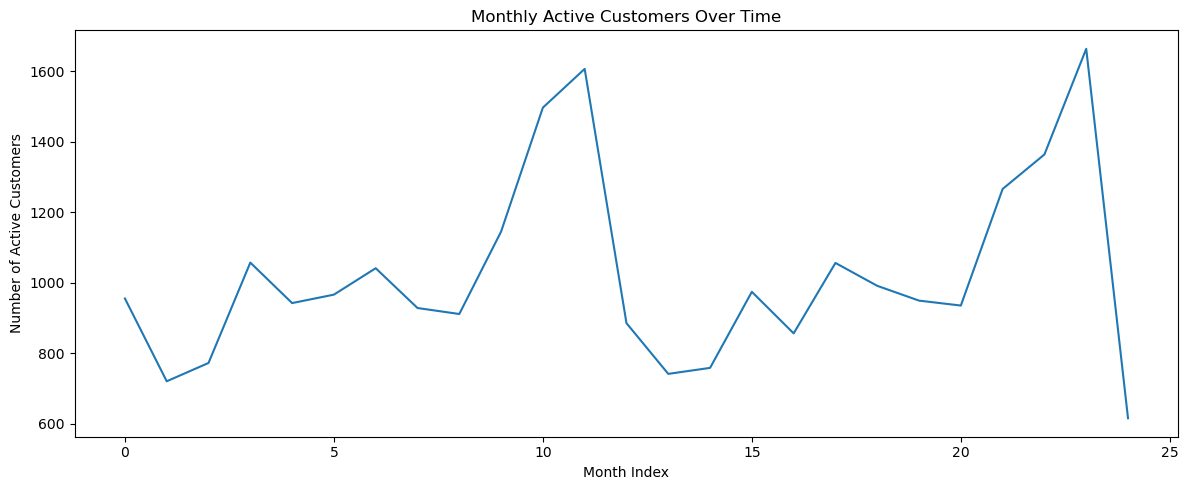

In [368]:
plt.figure(figsize=(12,5))
plt.plot(monthly_active_customers['ActiveCustomers'])
plt.title('Monthly Active Customers Over Time')
plt.xlabel('Month Index')
plt.ylabel('Number of Active Customers')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Zaman serisi grafiği, aylık aktif müşteri sayısının dönemsel olarak dalgalandığını açıkça göstermektedir. Özellikle her yılın son çeyreğinde aktif müşteri sayısında belirgin bir artış görülürken, Aralık aylarında keskin bir düşüş yaşanmaktadır. Bu durum, müşteri davranışlarında güçlü bir mevsimsellik etkisi olduğunu göstermektedir.

**EN:**  
The time series chart clearly shows fluctuations in the number of monthly active customers over time. Active customer counts increase significantly toward the last quarter of each year, followed by a sharp decline in December. This pattern indicates a strong seasonality effect in customer behavior.


### 3.3 Yeni vs Geri Dönen Müşteriler (New vs Returning Customers)

In [369]:
# TR: Her müşterinin ilk alışveriş tarihi belirlenmiştir.
# EN: The first purchase date of each customer is identified.

first_purchase = (
    df.groupby('Customer ID')['InvoiceDate']
      .min()
      .reset_index(name='FirstPurchaseDate')
)

df = df.merge(first_purchase, on='Customer ID', how='left')


In [370]:
df['CustomerType'] = df.apply(
    lambda x: 'New' if x['InvoiceDate'] == x['FirstPurchaseDate'] else 'Returning',
    axis=1
)


In [371]:
df['CustomerType'].value_counts(normalize=True) * 100
# TR: Returning customer oranı, müşteri sadakatinin bir göstergesi olarak değerlendirilmiştir.
# EN: The returning customer ratio is evaluated as an indicator of customer loyalty.

# TR: New customer ağırlığı, acquisition odaklı büyümenin bir göstergesi olarak ele alınmıştır.
# EN: The share of new customers is considered an indicator of acquisition-driven growth.

CustomerType
Returning    81.618757
New          18.381243
Name: proportion, dtype: float64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Müşteriler ilk alışveriş tarihine göre **New** ve **Returning** olarak sınıflandırılmıştır. Sonuçlara göre müşterilerin yaklaşık **%81,6’sı Returning**, **%18,4’ü New** müşterilerden oluşmaktadır. Bu dağılım, müşteri tabanının büyük ölçüde tekrar eden müşterilerden oluştuğunu ve güçlü bir müşteri sadakati bulunduğunu göstermektedir.

**EN:**  
Customers were classified as **New** or **Returning** based on their first purchase date. The results show that approximately **81.6%** of customers are Returning, while **18.4%** are New. This distribution indicates a strong level of customer loyalty, with the majority of revenue driven by repeat customers.


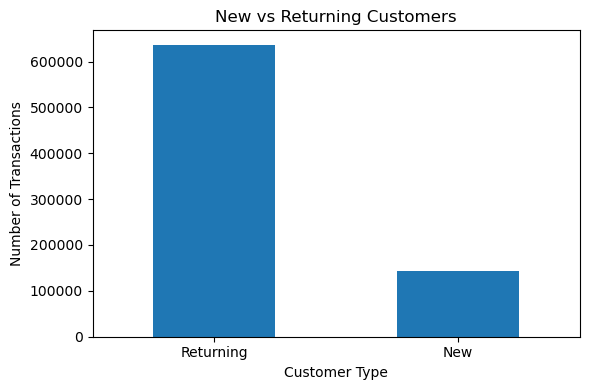

In [372]:
customer_type_counts = df['CustomerType'].value_counts()

plt.figure(figsize=(6,4))
customer_type_counts.plot(kind='bar')
plt.title('New vs Returning Customers')
plt.xlabel('Customer Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, Returning müşterilerin işlem sayısı açısından New müşterilere kıyasla açık ara daha baskın olduğunu göstermektedir. Bu durum, müşteri tabanının büyük ölçüde tekrar eden müşterilerden oluştuğunu ve satış hacminin önemli bir kısmının mevcut müşteriler tarafından üretildiğini ortaya koymaktadır.

**EN:**  
The chart shows that Returning customers significantly dominate transaction volume compared to New customers. This indicates that a substantial portion of sales activity is driven by existing customers, highlighting the importance of customer retention.


### 3.4 Müşteri Harcama Analizi (Customer Revenue Analysis)

In [373]:
# TR: Müşteri bazında gelir analizi yapılmıştır.
# EN: Revenue is analyzed at the customer level.

customer_revenue = (
    df.groupby('Customer ID')['Revenue']
      .sum()
      .reset_index()
)


In [374]:
# TR: Ortalama harcama hesaplanmıştır.
# EN: Average spending is calculated.

customer_revenue['Revenue'].mean()


2955.9040915277305

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Müşteri bazında toplam gelir hesaplanmış ve ortalama müşteri harcaması yaklaşık **2.956** olarak bulunmuştur. Bu değer, bir müşterinin analiz dönemi boyunca işletmeye sağladığı ortalama gelir seviyesini göstermektedir.

**EN:**  
Total revenue was calculated at the customer level, and the average customer spending was approximately **2,956**. This represents the average revenue generated per customer over the analysis period.


### 3.5 Gelir Yoğunlaşması & Pareto Analizi (Revenue Concentration / Pareto Effect)

In [375]:
customer_revenue_sorted = customer_revenue.sort_values('Revenue', ascending=False)
top_10_percent = int(len(customer_revenue_sorted) * 0.10)

top_10_revenue_share = (
    customer_revenue_sorted.head(top_10_percent)['Revenue'].sum() /
    customer_revenue_sorted['Revenue'].sum()
)

top_10_revenue_share # Top %10 Müşteri Katkısı


0.6389520589850672

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
En yüksek geliri sağlayan ilk %10’luk müşteri grubunun, toplam gelirin yaklaşık **%63,9’unu** oluşturduğu görülmektedir. Bu sonuç, müşteri gelir dağılımının oldukça yoğunlaştığını ve gelirin büyük bir kısmının sınırlı sayıda yüksek değerli müşteri tarafından üretildiğini göstermektedir.

**EN:**  
The top 10% of customers by revenue contribute approximately **63.9%** of total revenue. This indicates a highly concentrated revenue distribution, where a small group of high-value customers generates the majority of overall revenue.


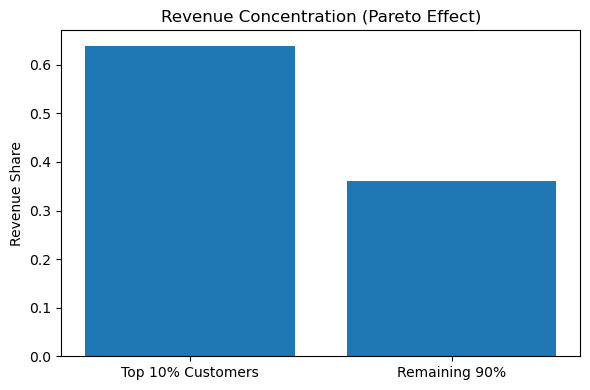

In [376]:
plt.figure(figsize=(6,4))
plt.bar(['Top 10% Customers', 'Remaining 90%'],
        [top_10_revenue_share, 1 - top_10_revenue_share])
plt.title('Revenue Concentration (Pareto Effect)')
plt.ylabel('Revenue Share')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, gelirin müşteri bazında nasıl yoğunlaştığını açıkça göstermektedir. En yüksek geliri sağlayan %10’luk müşteri grubu, toplam gelirin yaklaşık %64’ünü oluştururken, kalan %90’lık müşteri kitlesi gelirin yalnızca %36’sını üretmektedir. Bu durum, belirgin bir Pareto etkisine ve yüksek değerli müşteri segmentlerinin kritik önemine işaret etmektedir.

**EN:**  
The chart clearly illustrates revenue concentration at the customer level. The top 10% of customers generate approximately 64% of total revenue, while the remaining 90% contribute only about 36%. This highlights a strong Pareto effect and underscores the importance of high-value customer segments.


### 3.6 Sipariş Sıklığına Göre Müşteri Segmentleri (Frequency-Based Segmentation)

In [377]:
# TR: Invoice bazlı sipariş sayısı hesaplanmıştır.
# EN: The number of orders is calculated on an invoice basis.

customer_orders = (
    df.groupby('Customer ID')['Invoice']
      .nunique()
      .reset_index(name='OrderCount')
)


In [378]:
# TR: Müşteri segmentasyonu gerçekleştirilmiştir.
# EN: Customer segmentation is performed.

def frequency_segment(x):
    if x == 1:
        return 'One-time'
    elif x <= 5:
        return 'Repeat'
    else:
        return 'Loyal'

customer_orders['Segment'] = customer_orders['OrderCount'].apply(frequency_segment)
customer_orders['Segment'].value_counts(normalize=True) * 100


Segment
Repeat      41.748894
Loyal       30.639673
One-time    27.611432
Name: proportion, dtype: float64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Müşteriler sipariş sıklıklarına göre **One-time**, **Repeat** ve **Loyal** olarak segmentlenmiştir. Sonuçlara göre müşterilerin yaklaşık **%41,7’si Repeat**, **%30,6’sı Loyal** ve **%27,6’sı One-time** müşterilerden oluşmaktadır. Bu dağılım, müşteri tabanının önemli bir kısmının tekrar eden ve sadık müşterilerden oluştuğunu göstermektedir.

**EN:**  
Customers were segmented based on their order frequency into **One-time**, **Repeat**, and **Loyal** groups. The results show that approximately **41.7%** of customers are Repeat, **30.6%** are Loyal, and **27.6%** are One-time customers. This distribution indicates that a substantial portion of the customer base consists of repeat and loyal customers.


### 3.7 Zaman Bazlı Müşteri Davranışı (Temporal Customer Behavior)

#### 3.7.1 Gün Bazlı Aktivite (Day of Week Analysis)

In [379]:
# TR: Gün bazlı müşteri aktivitesi analiz edilmiştir.
# EN: Daily customer activity is analyzed.

df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df.groupby('DayOfWeek')['Customer ID'].nunique()

DayOfWeek
Friday       2438
Monday       2549
Saturday       26
Sunday       2128
Thursday     3000
Tuesday      2754
Wednesday    2755
Name: Customer ID, dtype: int64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Haftanın günlerine göre aktif müşteri sayıları incelendiğinde, müşteri aktivitelerinin hafta içi günlerde yoğunlaştığı görülmektedir. Özellikle **Perşembe, Salı ve Çarşamba** günleri en yüksek müşteri katılımına sahiptir. Cumartesi günü müşteri aktivitesinin oldukça düşük olması, iş modelinin ağırlıklı olarak hafta içi odaklı çalıştığını göstermektedir.

**EN:**  
Examining customer activity by day of the week shows that customer engagement is concentrated on weekdays. **Thursday, Tuesday, and Wednesday** have the highest number of active customers. The very low activity on Saturday suggests that the business operates primarily on a weekday-oriented model.


#### 3.7.2 Saat Bazlı Aktivite (Hourly Activity Analysis)

In [380]:
# TR: Saat bazlı müşteri aktivitesi analiz edilmiştir.
# EN: Hourly customer activity is analyzed.

df['Hour'] = df['InvoiceDate'].dt.hour
df.groupby('Hour')['Customer ID'].nunique()


Hour
6        1
7       67
8      690
9     1391
10    2028
11    2139
12    2589
13    2569
14    2342
15    2117
16    1368
17     787
18     307
19     195
20      35
Name: Customer ID, dtype: int64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Saat bazlı müşteri aktivitesi incelendiğinde, alışverişlerin büyük ölçüde **09:00–16:00** saatleri arasında yoğunlaştığı görülmektedir. Aktivite özellikle **öğle saatlerinde (12:00–14:00)** zirve yapmaktadır. Akşam saatlerine doğru müşteri sayısında belirgin bir düşüş yaşanmaktadır. Bu durum, müşteri davranışlarının iş saatleri içinde yoğunlaştığını göstermektedir.

**EN:**  
Examining customer activity by hour shows that most transactions occur between **09:00 and 16:00**, with a clear peak around **midday (12:00–14:00)**. Customer activity declines significantly toward the evening, indicating that purchasing behavior is largely concentrated within business hours.


### 3.8 Ülke Bazlı Müşteri Dağılımı (Customer Distribution by Country)

In [381]:
# TR: Ülke bazında müşteri davranışı analiz edilmiştir.
# EN: Customer behavior is analyzed at the country level.

country_customers = (
    df.groupby('Country')['Customer ID']
      .nunique()
      .reset_index(name='CustomerCount')
      .sort_values('CustomerCount', ascending=False)
)

country_customers

,Country,CustomerCount
38,United Kingdom,5350
14,Germany,107
13,France,95
32,Spain,41
3,Belgium,29
28,Portugal,24
24,Netherlands,22
34,Switzerland,22
33,Sweden,19
18,Italy,17


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülke bazında benzersiz müşteri sayıları incelendiğinde, müşteri tabanının büyük ölçüde **Birleşik Krallık**’ta yoğunlaştığı görülmektedir. Diğer ülkelerdeki müşteri sayıları oldukça sınırlı olup, Almanya ve Fransa öne çıkan ikincil pazarlar konumundadır. Bu dağılım, işletmenin ana pazarının Birleşik Krallık olduğunu ve uluslararası müşteri tabanının nispeten dar olduğunu göstermektedir.

**EN:**  
Examining unique customer counts by country reveals that the customer base is heavily concentrated in the **United Kingdom**. Customer numbers in other countries are relatively limited, with Germany and France emerging as secondary markets. This distribution indicates that the UK is the primary market, while international customer presence remains comparatively small.


### 3.9 RFM Analizi için Veri Hazırlığı (RFM Data Preparation)

In [382]:
exclude_codes = [
    'POST', 'PADS', 'DOT', 'BANK CHARGES',
    'ADJUST', 'ADJUST2', 'M', 'D', 'C2',
    'SP1002', 'TEST001', 'TEST002'
]

rfm_df = df[~df['StockCode'].isin(exclude_codes)].copy()

reference_date = rfm_df['InvoiceDate'].max() + pd.Timedelta(days=1)

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Recency hesaplamalarında kullanılmak üzere, veri setindeki son işlem tarihinden bir gün sonrası referans tarih olarak belirlenmiştir.

**EN:**  
A reference date was defined as one day after the most recent transaction date to be used for Recency calculations.


In [383]:
# TR: RFM tablosu oluşturulmuştur.
# EN: The RFM table is created.

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'Revenue': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Müşteri bazında **Recency**, **Frequency** ve **Monetary** metrikleri hesaplanarak RFM tablosu oluşturulmuştur.  
- **Recency**, müşterinin son alışverişinden bu yana geçen gün sayısını,  
- **Frequency**, toplam sipariş sayısını,  
- **Monetary** ise müşterinin toplam harcamasını temsil etmektedir.  

Bu tablo, müşteri segmentasyonu ve davranış analizi için temel veri setini oluşturmaktadır.

**EN:**  
An RFM table was created by calculating **Recency**, **Frequency**, and **Monetary** metrics at the customer level.  
- **Recency** represents the number of days since the customer’s last purchase,  
- **Frequency** indicates the total number of orders,  
- **Monetary** reflects the total spending of the customer.  

This table serves as the foundation for customer segmentation and RFM-based analysis.


### 3.10 RFM Skorları & Segmentasyon (RFM Scoring and Segmentation)

In [384]:
rfm['R_Score'] = pd.qcut(
    rfm['Recency'],
    4,
    labels=[4,3,2,1]
)

rfm['F_Score'] = pd.cut(
    rfm['Frequency'],
    bins=[0,1,2,5,rfm['Frequency'].max()],
    labels=[1,2,3,4]
)

rfm['M_Score'] = pd.qcut(
    rfm['Monetary'],
    4,
    labels=[1,2,3,4]
)


rfm['RFM_Score'] = rfm['R_Score'].astype(str) + \
                   rfm['F_Score'].astype(str) + \
                   rfm['M_Score'].astype(str)

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu adımda, müşteriler **Recency**, **Frequency** ve **Monetary** metriklerine göre puanlanmıştır.  
- **Recency Score (R_Score)**, müşterilerin son alışveriş tarihine göre dört gruba ayrılmasıyla hesaplanmıştır (daha yeni alışveriş = daha yüksek skor).  
- **Frequency Score (F_Score)**, müşterilerin sipariş sıklığına göre belirlenen aralıklara göre atanmıştır.  
- **Monetary Score (M_Score)**, toplam harcama tutarına göre dört çeyreklik dilim kullanılarak hesaplanmıştır.  

Bu skorlar birleştirilerek her müşteri için **RFM_Score** oluşturulmuş ve müşterilerin davranışsal profilleri sayısal olarak temsil edilmiştir.

**EN:**  
In this step, customers were scored based on **Recency**, **Frequency**, and **Monetary** metrics.  
- The **Recency Score (R_Score)** was calculated using quartiles, where more recent purchases receive higher scores.  
- The **Frequency Score (F_Score)** was assigned based on predefined purchase frequency ranges.  
- The **Monetary Score (M_Score)** was calculated using quartiles of total spending.  

These scores were then combined to create a composite **RFM_Score**, numerically representing each customer’s purchasing behavior.


### 3.11 RFM Segmentleri (Customer Segments – RFM)

In [385]:
# TR: RFM metriklerine dayalı müşteri segmentasyonu gerçekleştirilmiştir.
# EN: Customer segmentation based on RFM metrics is performed.

def rfm_segment(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'Champions'
    elif row['F_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] >= 3:
        return 'Potential Loyalists'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 2:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)
rfm['Segment'].value_counts()


Segment
Loyal Customers        2422
Lost                   1252
Champions               889
Potential Loyalists     721
At Risk                 594
Name: count, dtype: int64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
RFM skorlarına göre müşteriler davranışsal segmentlere ayrılmıştır. Sonuçlara göre en büyük müşteri grubu **Loyal Customers** segmentinde yer almakta olup, bu grup düzenli alışveriş yapan müşterileri temsil etmektedir. **Champions** segmenti, hem yakın zamanda alışveriş yapmış hem de yüksek sıklıkta satın alma gerçekleştiren en değerli müşteri grubunu oluşturmaktadır. **Lost** ve **At Risk** segmentleri ise müşteri kaybı riski taşıyan grupları göstermekte olup, yeniden kazanım (re-engagement) stratejileri için öncelikli hedeflerdir.

**EN:**  
Customers were segmented into behavioral groups based on their RFM scores. The largest segment consists of **Loyal Customers**, representing customers who purchase regularly. The **Champions** segment includes the most valuable customers who purchase frequently and have shopped recently. **Lost** and **At Risk** segments indicate customers with a higher risk of churn, making them key targets for re-engagement strategies.


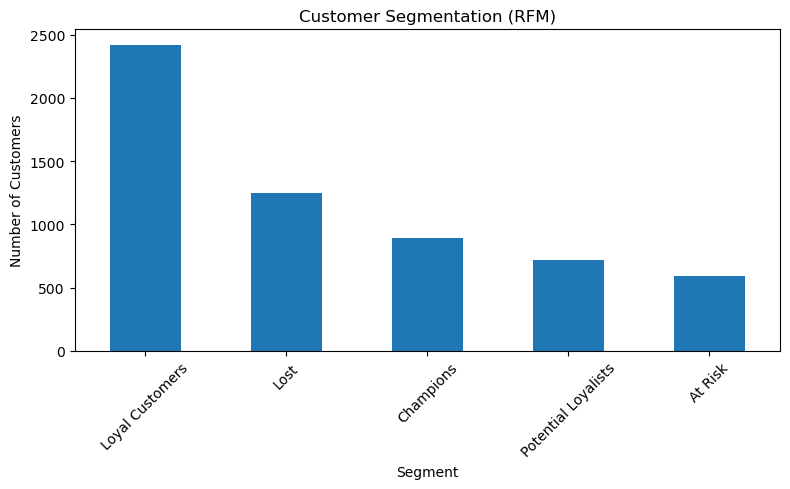

In [386]:
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8,5))
segment_counts.plot(kind='bar')
plt.title('Customer Segmentation (RFM)')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, RFM segmentlerine göre müşteri dağılımını göstermektedir. En büyük müşteri grubu **Loyal Customers** segmentinde yer almakta olup, bu durum işletmenin güçlü bir tekrar satın alma tabanına sahip olduğunu göstermektedir. **Champions** segmenti en değerli müşterileri temsil ederken, **Lost** ve **At Risk** segmentleri müşteri kaybı riski taşıyan grupları ortaya koymaktadır. Bu dağılım, hem sadakat odaklı büyüme hem de yeniden kazanım stratejileri için net hedefler sunmaktadır.

**EN:**  
The chart shows the distribution of customers across RFM segments. The largest group consists of **Loyal Customers**, indicating a strong base of repeat buyers. The **Champions** segment represents the most valuable customers, while **Lost** and **At Risk** segments highlight customers with a higher risk of churn. This distribution provides clear guidance for both loyalty-driven growth and re-engagement strategies.


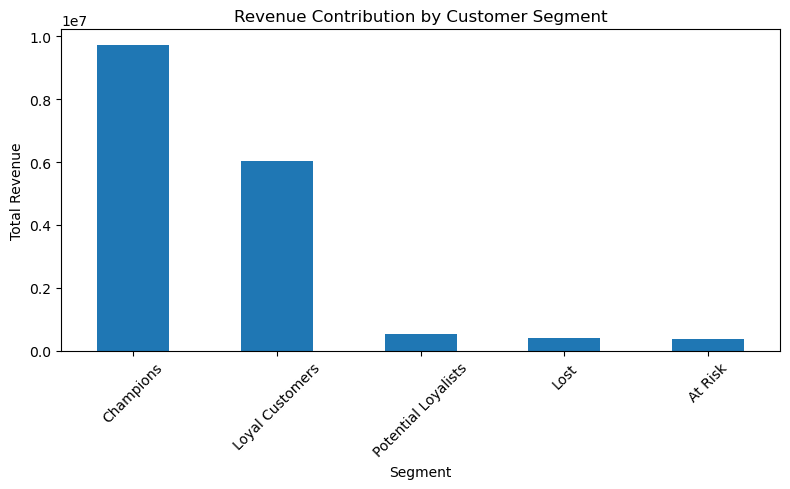

In [387]:
segment_revenue = (
    rfm_df.merge(rfm[['CustomerID','Segment']],
                 left_on='Customer ID',
                 right_on='CustomerID',
                 how='left')
      .groupby('Segment')['Revenue']
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
segment_revenue.plot(kind='bar')
plt.title('Revenue Contribution by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, müşteri segmentlerinin toplam gelire olan katkılarını göstermektedir. **Champions** segmenti, müşteri sayısı bakımından en büyük grup olmamasına rağmen toplam gelirin en büyük kısmını üretmektedir. **Loyal Customers** segmenti de gelire önemli ölçüde katkı sağlarken, **Potential Loyalists**, **At Risk** ve **Lost** segmentlerinin gelir katkısı görece daha sınırlıdır. Bu sonuçlar, yüksek değerli müşteri segmentlerine odaklanmanın gelir performansı açısından kritik olduğunu göstermektedir.

**EN:**  
The chart illustrates total revenue contribution by customer segment. Despite not being the largest group by customer count, the **Champions** segment generates the highest share of total revenue. **Loyal Customers** also contribute significantly, while **Potential Loyalists**, **At Risk**, and **Lost** segments account for a relatively smaller portion of revenue. These results highlight the importance of focusing on high-value customer segments to maximize revenue performance.


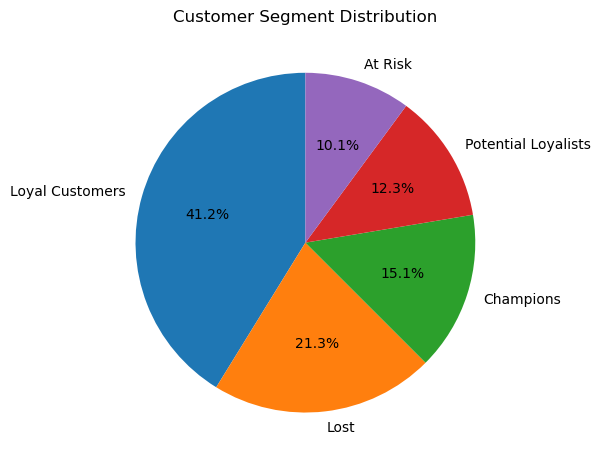

In [388]:
plt.figure(figsize=(6,6))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Customer Segment Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Pasta grafik, müşteri segmentlerinin toplam müşteri tabanı içindeki oranlarını göstermektedir. **Loyal Customers** segmenti en büyük paya sahip olup, müşteri tabanının önemli bir kısmının düzenli alışveriş yapan müşterilerden oluştuğunu göstermektedir. **Champions** ve **Potential Loyalists** segmentleri birlikte değerlendirildiğinde, gelecekte yüksek değer yaratma potansiyeline sahip kayda değer bir müşteri kitlesi bulunmaktadır. **Lost** ve **At Risk** segmentleri ise yeniden kazanım ve elde tutma stratejileri için kritik grupları temsil etmektedir.

**EN:**  
The pie chart shows the proportional distribution of customers across segments. **Loyal Customers** represent the largest share, indicating a strong base of repeat buyers. When combined, **Champions** and **Potential Loyalists** form a significant group with high future value potential. **Lost** and **At Risk** segments highlight customers who require re-engagement and retention strategies.


### Öngörü Özeti (Insight Summary)

**TR:**  
Bu analiz, müşteri davranışlarının homojen olmadığını ve gelirin belirli müşteri segmentlerinde yoğunlaştığını göstermektedir.  
Toplam gelirin önemli bir kısmı az sayıda yüksek değerli müşteriden gelmekte olup, bu durum Pareto etkisinin varlığına işaret etmektedir.  
RFM analizi sonucunda “Champions” ve “Loyal Customers” segmentlerinin hem müşteri sayısı hem de gelir katkısı açısından kritik olduğu görülmüştür.  

Bu bulgular, sadık müşteri segmentlerine yönelik elde tutma (retention) stratejilerinin ve kişiselleştirilmiş kampanyaların iş değeri yaratmada öncelikli olması gerektiğini göstermektedir.

**EN:**  
This analysis reveals that customer behavior is not homogeneous and that revenue is concentrated within specific customer segments.  
A significant portion of total revenue is generated by a relatively small group of high-value customers, indicating a clear Pareto effect.  
The RFM analysis highlights “Champions” and “Loyal Customers” as the most critical segments in terms of both customer count and revenue contribution.  

These insights suggest that retention-focused strategies and personalized campaigns targeting loyal customers should be prioritized to maximize long-term business value.


## 4. Zaman Serisi & Mevsimsellik Analizi (Time Series & Seasonality Analysis)

**TR:**  
Bu bölümde satış, müşteri ve gelir metriklerinin zaman içindeki değişimi analiz edilerek trendler ve mevsimsellik etkileri incelenecektir.

**EN:**  
In this section, trends and seasonality effects will be analyzed by examining how sales, customers, and revenue metrics change over time.


### 4.1 Aylık Gelir Verisinin Hazırlanması (Monthly Revenue Preparation)

In [389]:
# TR: Zaman serisi analizine hazırlık amacıyla toplam gelir aylık bazda gruplanmıştır.
# EN: Total revenue is aggregated on a monthly basis to prepare for time series analysis.

monthly_revenue = (
    df
    .groupby(['Year', 'Month'])['Revenue']
    .sum()
    .reset_index()
)


### 4.2 Zaman Değişkeninin Oluşturulması (Date Variable Creation)

In [390]:
# TR: Zaman serisi analizi için Year ve Month sütunlarından bir tarih değişkeni oluşturulmuştur.
# EN: A proper date column is created from the Year and Month columns for time series analysis.

monthly_revenue['Date'] = pd.to_datetime(
    monthly_revenue[['Year', 'Month']].assign(DAY=1)
)

monthly_revenue = monthly_revenue.sort_values('Date')
monthly_revenue.head()


,Year,Month,Revenue,Date
0,2009,12,683504.01,2009-12-01
1,2010,1,555802.67,2010-01-01
2,2010,2,504558.95,2010-02-01
3,2010,3,696978.47,2010-03-01
4,2010,4,591982.00,2010-04-01


### 4.3 Aylık Toplam Gelir Trend Analizi (Monthly Revenue Trend Analysis)

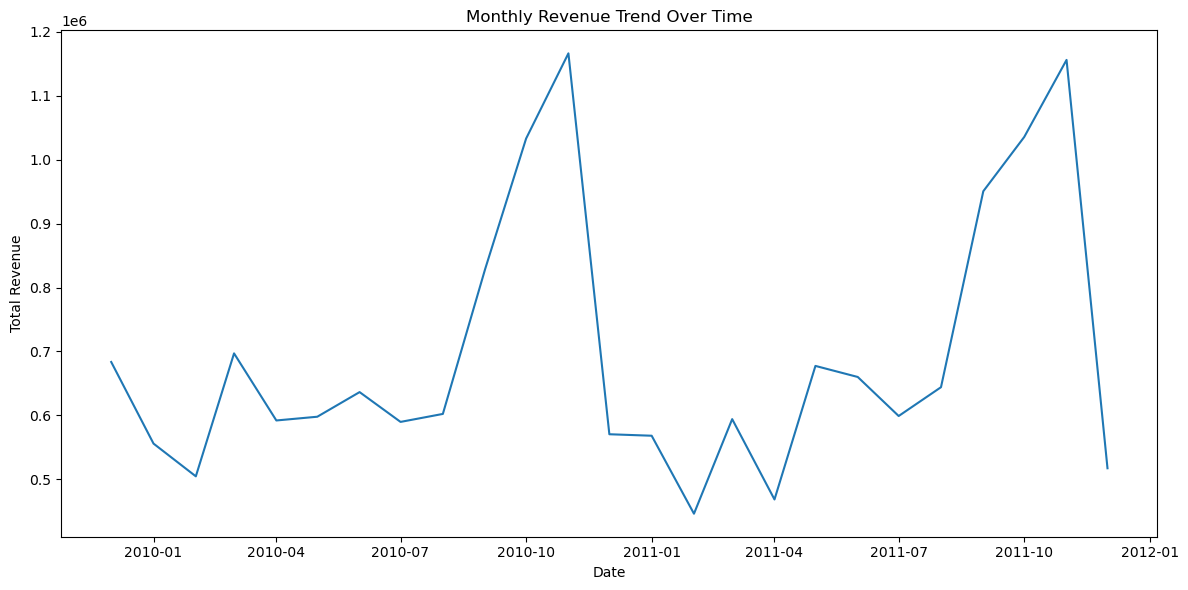

In [391]:
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue['Date'], monthly_revenue['Revenue'])
plt.title('Monthly Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, aylık toplam gelirin zaman içerisinde dalgalı bir seyir izlediğini ve belirli dönemlerde tekrarlayan gelir zirveleri oluştuğunu göstermektedir.  
Özellikle yılın son çeyreklerine doğru gelirlerde belirgin bir artış gözlemlenmektedir.  
Bu durum, satışların sezonsal etkilerden etkilendiğini ve müşteri talebinin yılın belirli dönemlerinde yoğunlaştığını ortaya koymaktadır.  

Elde edilen bulgular, kampanya planlaması, stok yönetimi ve operasyonel kapasite planlaması açısından kritik zaman aralıklarının önceden belirlenebileceğini göstermektedir.

**EN:**  
This chart illustrates that monthly total revenue fluctuates over time with recurring revenue peaks in specific periods.  
Revenue shows a noticeable increase toward the final months of the year, indicating a clear seasonal pattern.  
This suggests that sales performance is influenced by time-dependent and seasonal factors.  

These insights can support strategic decisions related to campaign timing, inventory management, and operational capacity planning.


### 4.4 Aylık Ortalama Gelir ile Sezonsallık Analizi (Seasonality Analysis by Month)

In [392]:
# TR: Sezonsallık analizine hazırlık amacıyla aylık ortalama gelir hesaplanmıştır.
# EN: Average monthly revenue is calculated to prepare for seasonality analysis.

seasonality = (
    df
    .groupby('Month')['Revenue']
    .mean()
    .reset_index()
)


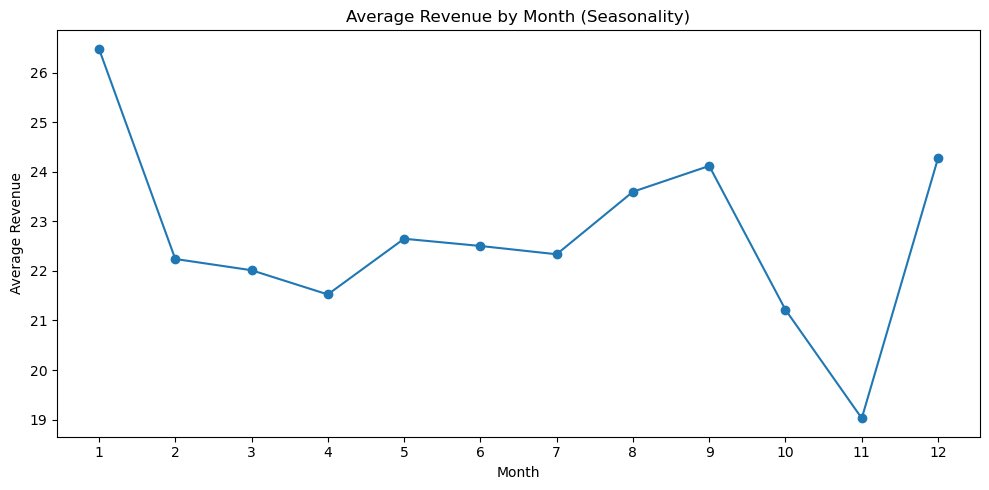

In [393]:
plt.figure(figsize=(10,5))
plt.plot(seasonality['Month'], seasonality['Revenue'], marker='o')
plt.title('Average Revenue by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, aylara göre ortalama gelirin belirgin farklılıklar gösterdiğini ve satış performansının yıl boyunca eşit dağılmadığını ortaya koymaktadır.  
Bazı ayların sistematik olarak daha yüksek ortalama gelir ürettiği, bazı ayların ise görece daha zayıf kaldığı görülmektedir.  
Bu desen, satışların sezonsal faktörlerden etkilendiğini ve müşteri harcama davranışlarının yılın belirli dönemlerinde yoğunlaştığını göstermektedir.  

Bu bulgular, pazarlama kampanyalarının zamanlaması, stok seviyelerinin ay bazında optimize edilmesi ve operasyonel kaynak planlaması için yol gösterici niteliktedir.

**EN:**  
This chart shows that average revenue varies noticeably across months, indicating that sales performance is not evenly distributed throughout the year.  
Certain months consistently generate higher average revenue, while others remain relatively weaker.  
This pattern highlights the presence of seasonality and time-dependent customer spending behavior.  

These insights can guide decisions related to campaign scheduling, month-based inventory optimization, and operational resource planning.


### 4.5 Yıllara Göre Toplam Gelir Karşılaştırması (Yearly Revenue Comparison)

In [394]:
# TR: Yıllık toplam gelir hesaplanarak yıllar arası karşılaştırma için hazırlanmıştır.
# EN: Total revenue is calculated by year to prepare for year-over-year comparison.

yearly_revenue = (
    df
    .groupby('Year')['Revenue']
    .sum()
    .reset_index()
)


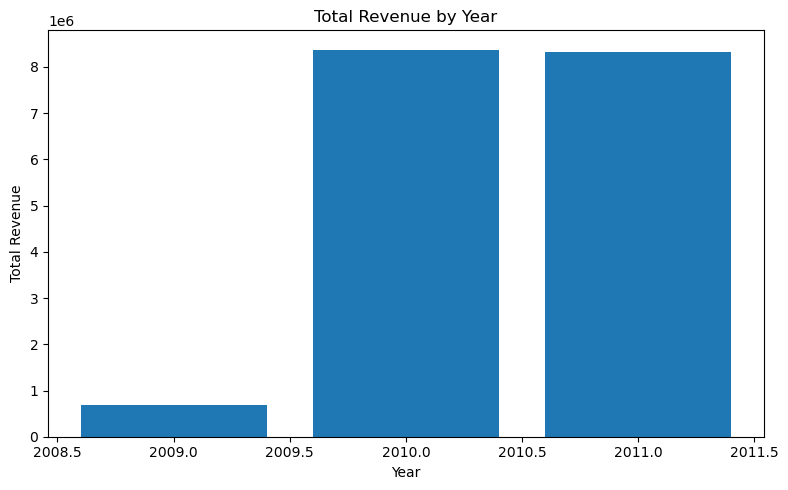

In [395]:
plt.figure(figsize=(8,5))
plt.bar(yearly_revenue['Year'], yearly_revenue['Revenue'])
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, yıllara göre toplam gelirde belirgin farklılıklar bulunduğunu göstermektedir.  
2009 yılı görece daha düşük toplam gelir üretirken, 2010 ve 2011 yıllarında gelir seviyesinin önemli ölçüde arttığı görülmektedir.  
Bu artış, müşteri sayısındaki büyüme, sipariş hacmindeki artış veya ortalama sepet değerindeki yükseliş ile ilişkilendirilebilir.  

Yıllar arasındaki bu fark, işin zaman içinde ölçeklendiğini ve satış performansının gelişim gösterdiğini ortaya koymaktadır.

**EN:**  
This chart highlights clear differences in total revenue across years.  
While 2009 shows a relatively lower revenue level, total revenue increases significantly in 2010 and 2011.  
This growth may be associated with an increase in customer base, order volume, or average basket value.  

The year-over-year comparison indicates that the business has scaled over time and achieved improved sales performance.


### 4.6 En Güçlü ve En Zayıf Ayların Belirlenmesi (Best and Worst Months)

In [396]:
# TR: Aylık ortalama gelire göre aylar sıralanarak en güçlü ve en zayıf dönemler analiz edilmiştir.
# EN: Months are sorted by average revenue to analyze the strongest and weakest periods.

seasonality.sort_values('Revenue', ascending=False)

,Month,Revenue
0,1,26.478443
11,12,24.272433
8,9,24.116213
7,8,23.595215
4,5,22.647471
5,6,22.501774
6,7,22.334312
1,2,22.239364
2,3,22.012212
3,4,21.523959


### Öngörü Özeti (Insight Summary)

**TR:**  
Zaman serisi analizi, satışların zaman içerisinde dalgalı bir yapı sergilediğini ve belirli dönemlerde tekrarlayan sezonsal desenler bulunduğunu ortaya koymaktadır.  
Aylık gelir trendleri, yılın bazı dönemlerinde satışların sistematik olarak arttığını ve talebin zamana bağlı olduğunu göstermektedir.  
Yıllık karşılaştırmalar ise işin zaman içinde ölçeklendiğini ve toplam gelir seviyesinin arttığını ortaya koymaktadır.  

Bu bulgular, kampanya zamanlaması, stok planlaması ve operasyonel kapasite yönetiminin sezonsallık dikkate alınarak optimize edilmesi gerektiğini göstermektedir.

**EN:**  
The time series analysis shows that sales fluctuate over time and exhibit recurring seasonal patterns during specific periods of the year.  
Monthly revenue trends indicate that demand is time-dependent, with systematic increases observed in certain months.  
Year-over-year comparisons further suggest that the business has scaled over time, achieving higher overall revenue levels.  

These insights highlight the importance of aligning campaign timing, inventory planning, and operational capacity management with seasonal demand patterns.


## 5. Ülke / Bölge Bazlı Performans Analizi (Country / Regional Performance Analysis)
**TR:**  
Bu bölümde satış performansı ve müşteri davranışları ülke bazında analiz edilmektedir.
Amaç, ülkeler arasında gelir katkısını, sipariş hacmini ve müşteri değerini karşılaştırmaktır.

**EN:**  
In this section, sales performance and customer behavior are analyzed at the country level.
The goal is to compare revenue contribution, order volume, and customer value across countries.

In [397]:
df_country = df.copy()

# TR: Analiz için gerekli sütunların varlığı kontrol edilmiştir.
# EN: The presence of required columns for analysis is verified.
required_cols = ['Country', 'Customer ID', 'Invoice', 'Quantity', 'Revenue']
missing = [c for c in required_cols if c not in df_country.columns]
if missing:
    raise ValueError(f"Missing columns in df: {missing}")

# TR: Country sütunundaki boş değerler kontrol edilmiştir.
# EN: Missing values in the Country column are checked.
df_country = df_country.dropna(subset=['Country'])

df_country.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year,Month,FirstPurchaseDate,CustomerType,DayOfWeek,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,2009-12-01 07:45:00,New,Tuesday,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,2009-12-01 07:45:00,New,Tuesday,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,2009-12-01 07:45:00,New,Tuesday,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,2009-12-01 07:45:00,New,Tuesday,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,2009-12-01 07:45:00,New,Tuesday,7


### 5.1 Ülke Bazında Toplam Gelir (Total Revenue by Country)

In [398]:
revenue_by_country = (
    df_country.groupby('Country', as_index=False)['Revenue']
    .sum()
    .sort_values('Revenue', ascending=False)
)

revenue_by_country.head(10)

,Country,Revenue
38,United Kingdom,14389234.90
10,EIRE,616570.54
24,Netherlands,554038.09
14,Germany,425019.71
13,France,348768.96
0,Australia,169283.46
32,Spain,108332.49
34,Switzerland,100061.94
33,Sweden,91515.82
9,Denmark,68580.69


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülke bazında toplam gelir hesaplanarak hangi ülkelerin satışlara en fazla katkı sağladığı belirlenmiştir.  

**EN:**  
Total revenue is aggregated by country to identify which countries contribute the most to overall sales.

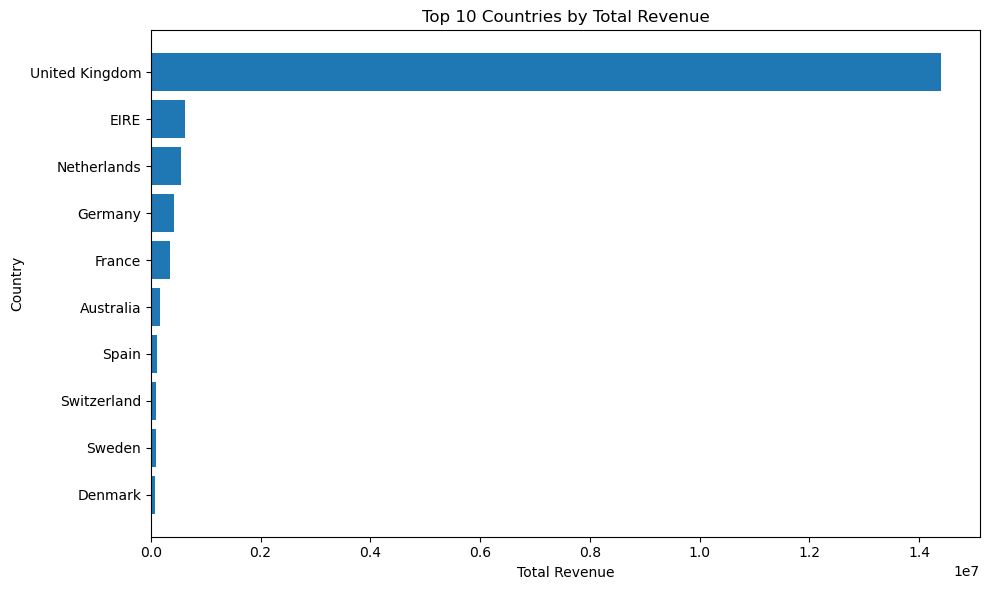

In [399]:
top_n = 10
top_revenue = revenue_by_country.head(top_n).sort_values('Revenue', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_revenue['Country'], top_revenue['Revenue'])
plt.title(f'Top {top_n} Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
En yüksek toplam gelire sahip ilk 10 ülke yatay bar grafik ile görselleştirilerek  
ülkeler arasındaki gelir farkları daha net şekilde gösterilmiştir.  

**EN:**  
The top 10 countries by total revenue are visualized using a horizontal bar chart  
to clearly highlight revenue differences across countries.


### 5.2 Ülke Bazında Sipariş Sayısı (Number of Orders by Country)

In [400]:
orders_by_country = (
    df_country.groupby('Country', as_index=False)['Invoice']
    .nunique()
    .rename(columns={'Invoice': 'OrderCount'})
    .sort_values('OrderCount', ascending=False)
)

orders_by_country.head(10)


,Country,OrderCount
38,United Kingdom,33541
14,Germany,789
13,France,614
10,EIRE,567
24,Netherlands,228
32,Spain,154
3,Belgium,149
33,Sweden,104
0,Australia,95
28,Portugal,93


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülkeler bazında benzersiz sipariş (invoice) sayısı hesaplanarak  
sipariş hacmi ülkeler arasında karşılaştırılmıştır.  

**EN:**  
The number of unique orders (invoices) is calculated by country  
to compare order volume across countries.


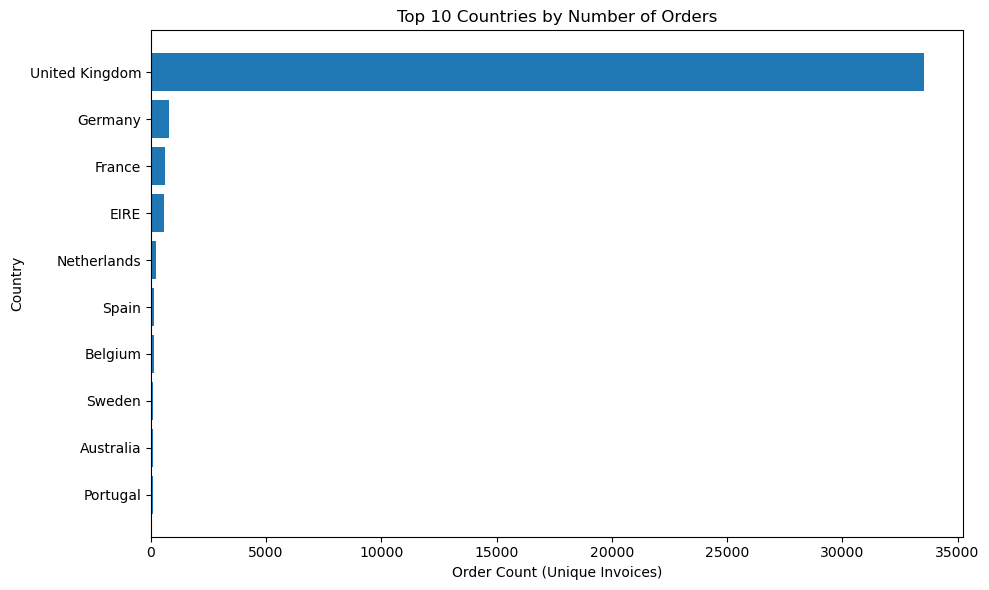

In [401]:
top_n = 10
top_orders = orders_by_country.head(top_n).sort_values('OrderCount', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_orders['Country'], top_orders['OrderCount'])
plt.title(f'Top {top_n} Countries by Number of Orders')
plt.xlabel('Order Count (Unique Invoices)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülkelere göre benzersiz sipariş sayıları yatay bar grafik ile görselleştirilerek  
sipariş hacmindeki ülkeler arası farklar net bir şekilde gösterilmiştir.  

**EN:**  
Unique order counts by country are visualized using a horizontal bar chart  
to clearly illustrate differences in order volume across countries.


### 5.3 Ülke Bazında Müşteri Sayısı (Number of Customers by Country)

In [402]:
customers_by_country = (
    df_country.groupby('Country', as_index=False)['Customer ID']
    .nunique()
    .rename(columns={'Customer ID': 'CustomerCount'})
    .sort_values('CustomerCount', ascending=False)
)

customers_by_country.head(10)


,Country,CustomerCount
38,United Kingdom,5350
14,Germany,107
13,France,95
32,Spain,41
3,Belgium,29
28,Portugal,24
24,Netherlands,22
34,Switzerland,22
33,Sweden,19
18,Italy,17


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülkelere göre benzersiz müşteri sayıları hesaplanarak  
müşteri yoğunluğunun ülkeler arasında nasıl dağıldığı analiz edilmiştir.  

**EN:**  
Unique customer counts are calculated by country  
to analyze how customer concentration differs across countries.


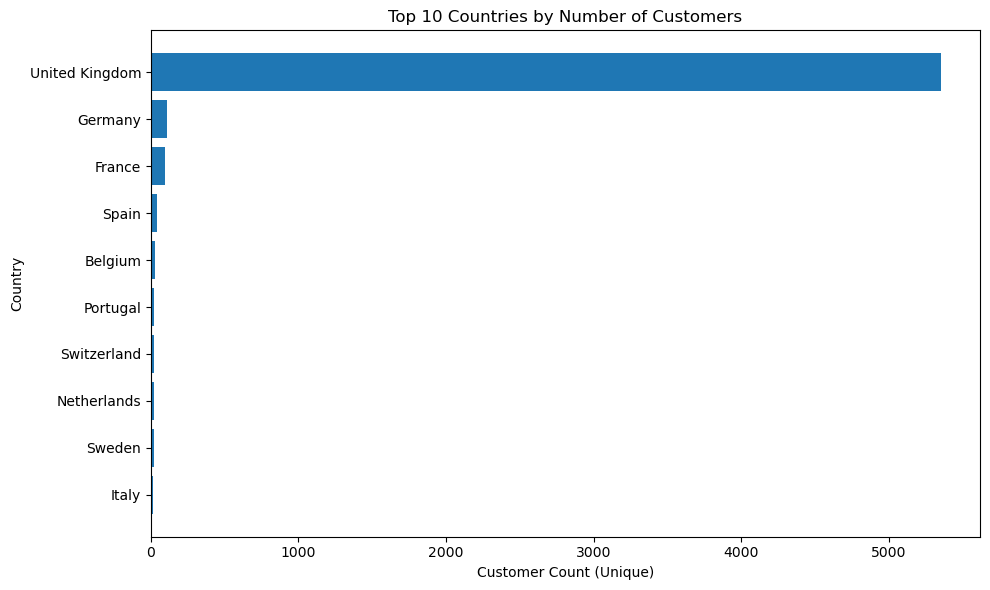

In [403]:
top_n = 10
top_customers = customers_by_country.head(top_n).sort_values('CustomerCount', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_customers['Country'], top_customers['CustomerCount'])
plt.title(f'Top {top_n} Countries by Number of Customers')
plt.xlabel('Customer Count (Unique)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülkelere göre benzersiz müşteri sayıları yatay bar grafik ile görselleştirilerek  
müşteri yoğunluğundaki ülkeler arası farklar açık bir şekilde gösterilmiştir.  

**EN:**  
Unique customer counts by country are visualized using a horizontal bar chart  
to clearly show differences in customer concentration across countries.


### 5.4 Müşteri Başına Ortalama Gelir (ARPU) (Revenue per Customer)

In [404]:
country_summary = (
    df_country.groupby('Country')
    .agg(
        TotalRevenue=('Revenue', 'sum'),
        OrderCount=('Invoice', 'nunique'),
        CustomerCount=('Customer ID', 'nunique')
    )
    .reset_index()
)

country_summary['ARPU'] = country_summary['TotalRevenue'] / country_summary['CustomerCount']
country_summary = country_summary.sort_values('ARPU', ascending=False)

country_summary.head(10)


,Country,TotalRevenue,OrderCount,CustomerCount,ARPU
10,EIRE,616570.54,567,5,123314.108000
31,Singapore,25317.06,11,1,25317.060000
24,Netherlands,554038.09,228,22,25183.549545
0,Australia,169283.46,95,15,11285.564000
9,Denmark,68580.69,43,12,5715.057500
16,Iceland,4921.53,8,1,4921.530000
22,Lithuania,4892.68,6,1,4892.680000
33,Sweden,91515.82,104,19,4816.622105
34,Switzerland,100061.94,90,22,4548.270000
26,Norway,56322.50,45,13,4332.500000


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülke bazında toplam gelir, sipariş sayısı ve müşteri sayısı bir araya getirilerek  
müşteri başına ortalama gelir (ARPU) hesaplanmış ve ülkeler ARPU değerine göre sıralanmıştır.  

**EN:**  
Total revenue, order count, and customer count are combined at the country level  
to calculate average revenue per customer (ARPU) and rank countries accordingly.


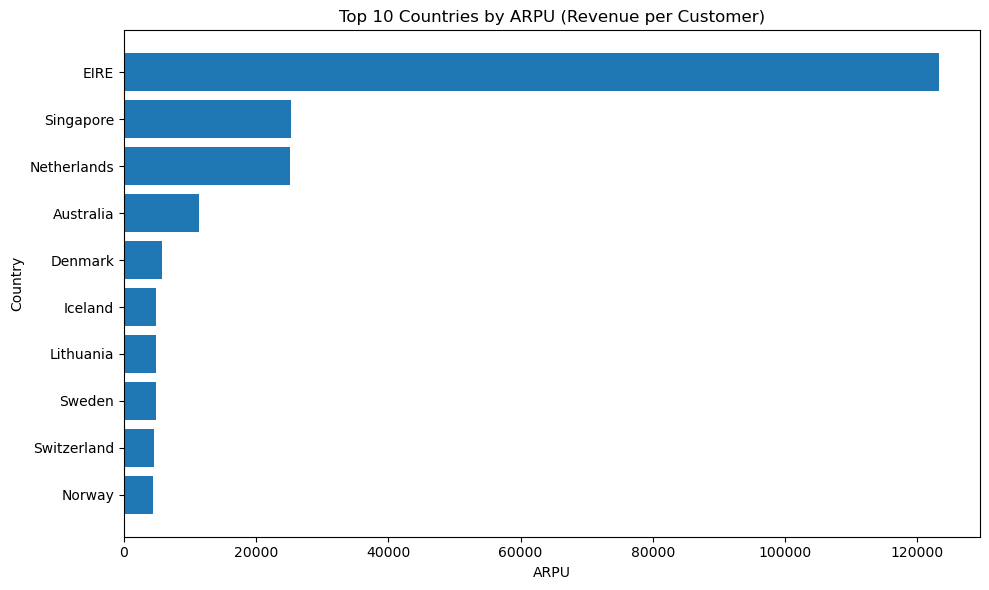

In [405]:
top_n = 10
top_arpu = country_summary.head(top_n).sort_values('ARPU', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_arpu['Country'], top_arpu['ARPU'])
plt.title(f'Top {top_n} Countries by ARPU (Revenue per Customer)')
plt.xlabel('ARPU')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülke bazında müşteri başına ortalama gelir (ARPU) değerleri yatay bar grafik ile  
görselleştirilerek müşteri değerinin ülkeler arasında nasıl değiştiği gösterilmiştir.  

**EN:**  
Country-level average revenue per customer (ARPU) values are visualized using a  
horizontal bar chart to show how customer value varies across countries.


### 5.5 Sipariş Başına Ortalama Gelir (AOV) (Revenue per Order)

In [406]:
country_summary['AOV'] = country_summary['TotalRevenue'] / country_summary['OrderCount']
country_summary = country_summary.sort_values('AOV', ascending=False)

country_summary[['Country', 'TotalRevenue', 'OrderCount', 'AOV']].head(10)


,Country,TotalRevenue,OrderCount,AOV
24,Netherlands,554038.09,228,2429.991623
31,Singapore,25317.06,11,2301.550909
0,Australia,169283.46,95,1781.931158
21,Lebanon,1693.88,1,1693.880000
9,Denmark,68580.69,43,1594.899767
35,Thailand,3070.54,2,1535.270000
17,Israel,10415.24,7,1487.891429
19,Japan,43023.91,33,1303.754848
26,Norway,56322.50,45,1251.611111
34,Switzerland,100061.94,90,1111.799333


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülke bazında sipariş başına ortalama gelir (AOV) hesaplanarak  
ülkeler AOV değerlerine göre sıralanmıştır.  

**EN:**  
Average revenue per order (AOV) is calculated at the country level  
and countries are ranked based on their AOV values.


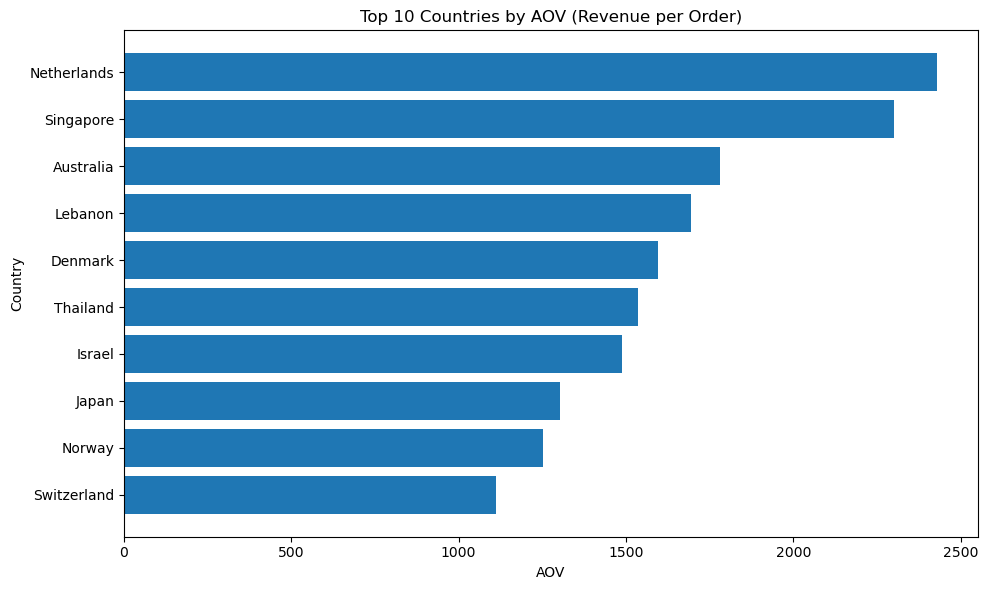

In [407]:
top_n = 10
top_aov = country_summary.head(top_n).sort_values('AOV', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_aov['Country'], top_aov['AOV'])
plt.title(f'Top {top_n} Countries by AOV (Revenue per Order)')
plt.xlabel('AOV')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülkelere göre sipariş başına ortalama gelir (AOV) değerleri yatay bar grafik ile  
görselleştirilerek sepet büyüklüğündeki ülkeler arası farklar gösterilmiştir.  

**EN:**  
Average revenue per order (AOV) values by country are visualized using a  
horizontal bar chart to illustrate differences in basket size across countries.


### 5.6 Gelir – Sipariş – Müşteri Karşılaştırması (Comparison Table)

In [408]:
# TR: Daha okunaklı bir analiz için veriler gelir bazında sıralanmıştır.
# EN: For improved readability, the data is sorted by revenue.
country_summary_rev = country_summary.sort_values('TotalRevenue', ascending=False)

country_summary_rev.head(15)


,Country,TotalRevenue,OrderCount,CustomerCount,ARPU,AOV
38,United Kingdom,14389234.90,33541,5350,2689.576617,429.004350
10,EIRE,616570.54,567,5,123314.108000,1087.425996
24,Netherlands,554038.09,228,22,25183.549545,2429.991623
14,Germany,425019.71,789,107,3972.146822,538.681508
13,France,348768.96,614,95,3671.252211,568.027622
0,Australia,169283.46,95,15,11285.564000,1781.931158
32,Spain,108332.49,154,41,2642.255854,703.457727
34,Switzerland,100061.94,90,22,4548.270000,1111.799333
33,Sweden,91515.82,104,19,4816.622105,879.959808
9,Denmark,68580.69,43,12,5715.057500,1594.899767


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ülke bazında hesaplanan tüm temel metrikler (toplam gelir, sipariş sayısı, müşteri sayısı,  
ARPU ve AOV) tek bir tabloda birleştirilmiş ve ülkeler toplam gelire göre sıralanmıştır.  

**EN:**  
All key country-level metrics (total revenue, order count, customer count,  
ARPU, and AOV) are consolidated into a single table and sorted by total revenue.


### 5.7 UK vs Others (UK Dominance Check)

In [409]:
total_revenue = df_country['Revenue'].sum()
uk_revenue = df_country.loc[df_country['Country'] == 'United Kingdom', 'Revenue'].sum()
uk_share = uk_revenue / total_revenue

uk_share


0.8281667345978874

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Birleşik Krallık’ın (United Kingdom) toplam gelir içindeki payı hesaplanarak  
gelirin ne kadarının UK kaynaklı olduğu belirlenmiştir.  

**EN:**  
The share of total revenue generated by the United Kingdom is calculated  
to quantify how much of overall revenue comes from the UK.


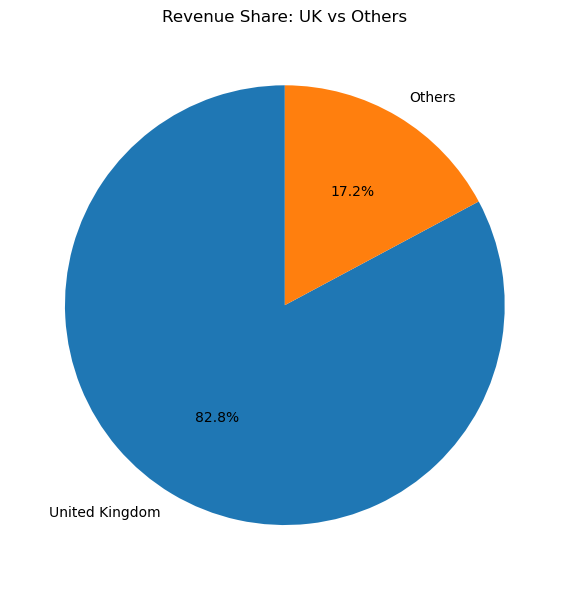

In [410]:
labels = ['United Kingdom', 'Others']
values = [uk_revenue, total_revenue - uk_revenue]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share: UK vs Others')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Toplam gelirin Birleşik Krallık (UK) ve diğer ülkeler arasındaki dağılımı  
pasta grafik ile görselleştirilerek UK’nin gelir içindeki payı net şekilde gösterilmiştir.  

**EN:**  
The distribution of total revenue between the United Kingdom and other countries  
is visualized using a pie chart to clearly highlight the UK’s share of total revenue.


### Öngörü Özeti (Insight Summary)

**TR:**  
- Toplam gelirin çok büyük bir kısmı Birleşik Krallık (UK) kaynaklıdır ve veri seti
  belirgin şekilde UK-dominant bir yapı göstermektedir.
- Bazı ülkelerde müşteri sayısı oldukça düşük olmasına rağmen ARPU ve AOV değerleri yüksektir;
  bu durum yüksek değerli ancak sınırlı müşteri profillerine işaret etmektedir.
- Yüksek sipariş hacmine sahip ülkelerde ortalama sepet tutarının görece düşük olması,
  hacim odaklı ancak düşük marjlı bir satış yapısını düşündürmektedir.
- Ülke bazlı metrikler birlikte değerlendirildiğinde, pazarların
  “yüksek hacim – düşük değer” ve “düşük hacim – yüksek değer” olarak ayrıştığı görülmektedir.

**EN:**  
- A significant share of total revenue is generated by the United Kingdom, indicating
  a strongly UK-dominant dataset.
- Some countries show very high ARPU and AOV values despite having a small number of customers,
  suggesting high-value but limited customer segments.
- Countries with high order volumes tend to have lower average basket values,
  pointing to a volume-driven sales structure.
- When country-level metrics are analyzed together, markets can be broadly segmented into
  “high-volume, low-value” and “low-volume, high-value” profiles.


## 6. Fiyat & Gelir Analizi (Price & Revenue Analysis)

**TR:**  
Bu bölümde ürün fiyatları, satış adetleri ve elde edilen gelir arasındaki ilişki analiz edilmiştir. Amaç, gelirin hangi fiyat seviyelerinden ve hangi ürün davranışlarından oluştuğunu net şekilde ortaya koymaktır.

**EN:**  
In this section, the relationship between product prices, sales quantities, and generated revenue is analyzed. The goal is to clearly identify which price levels and product behaviors drive overall revenue.

In [411]:
df.shape, df.columns

((779425, 15),
 Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
        'Price', 'Customer ID', 'Country', 'Revenue', 'Year', 'Month',
        'FirstPurchaseDate', 'CustomerType', 'DayOfWeek', 'Hour'],
       dtype='object'))

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu çıktı, analiz için kullanılan veri setinin son halini özetlemektedir. Veri seti **779.425 satır** ve **15 sütundan** oluşmaktadır. Satır sayısı, veri temizleme (iptal/iade, negatif değerler ve eksik müşteri ID’lerinin kaldırılması) sonrası elde edilen nihai gözlem sayısını temsil etmektedir. Sütunlar; sipariş, ürün, müşteri, zaman ve gelir odaklı değişkenleri kapsayacak şekilde analiz için hazır durumdadır.

**EN:**  
This output summarizes the final structure of the dataset used for analysis. The dataset contains **779,425 rows** and **15 columns**, representing the cleaned and prepared data after removing cancellations, negative values, and missing customer IDs. The columns cover order, product, customer, time, and revenue-related variables, making the dataset ready for further analytical steps.


### 6.1 Temel kontroller: Price / Quantity / Revenue dağılım özeti (Basic Checks: Price / Quantity / Revenue Distribution Summary)

In [412]:
# TR: Fiyat, adet ve gelir değişkenleri için özet istatistikler hesaplanmıştır.
# EN: Summary statistics are calculated for Price, Quantity, and Revenue.

price_rev_summary = df[['Price','Quantity','Revenue']].describe().T
price_rev_summary

,count,mean,std,min,25%,50%,75%,max
Price,779425.0,3.218488,29.676140,0.001,1.25,1.95,3.75,10953.5
Quantity,779425.0,13.489370,145.855814,1.000,2.00,6.00,12.00,80995.0
Revenue,779425.0,22.291823,227.427075,0.000,4.95,12.48,19.80,168469.6


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Fiyat, satış adedi ve satır bazlı gelir değişkenlerinin özet istatistikleri incelendiğinde, dağılımların belirgin şekilde **sağa çarpık** olduğu görülmektedir. Medyan fiyat (**1.95**) ve medyan gelir (**12.48**), ortalama değerlerin altında kalarak yüksek değerli işlemlerin dağılımı yukarı doğru çektiğini göstermektedir. Benzer şekilde, satış adetlerinde de çok yüksek miktarlı işlemler (maksimum **80.995**) dağılım üzerinde güçlü bir etki yaratmaktadır. Bu durum, ilerleyen analizlerde log ölçek veya persentil bazlı kırpma kullanımını gerekli kılmaktadır.

**EN:**  
The summary statistics of price, quantity, and line-level revenue indicate a strongly **right-skewed distribution**. The median price (**1.95**) and median revenue (**12.48**) are lower than their respective means, suggesting that a small number of high-value transactions pull the averages upward. Similarly, extremely large quantities (maximum **80,995**) have a significant impact on the distribution. This justifies the use of log scales or percentile-based clipping in subsequent analyses.


In [413]:
# TR: Aykırı değer analizini desteklemek için yüzdelik dilimler dahil edilmiştir.
# EN: Percentile thresholds are included to support outlier analysis.

quantiles = df[['Price','Quantity','Revenue']].quantile([0.01, 0.05, 0.50, 0.95, 0.99]).T
quantiles


,0.01,0.05,0.50,0.95,0.99
Price,0.29,0.42,1.95,8.5,14.95
Quantity,1.00,1.00,6.00,36.0,144.00
Revenue,0.60,1.25,12.48,67.5,203.52


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Percentile değerleri incelendiğinde işlemlerin büyük çoğunluğunun düşük fiyat, düşük adet ve görece sınırlı gelir aralıklarında yoğunlaştığı görülmektedir. Medyan fiyat (**1.95**) ve medyan satış adedi (**6**) veri setinin tipik işlem profilini temsil ederken, %99’luk dilimde fiyatların **14.95**, adetlerin **144** ve satır bazlı gelirin **203.52** seviyelerine kadar çıktığı gözlemlenmektedir. Bu sonuçlar, az sayıdaki yüksek değerli işlemin dağılımı belirgin şekilde yukarı çektiğini ve aykırı değerlerin analizde dikkatle ele alınması gerektiğini göstermektedir.

**EN:**  
The percentile analysis shows that the majority of transactions are concentrated within low price, low quantity, and moderate revenue ranges. While the median price (**1.95**) and median quantity (**6**) reflect the typical transaction profile, values at the 99th percentile reach **14.95** for price, **144** for quantity, and **203.52** for line-level revenue. This indicates that a small number of high-value transactions significantly influence the distribution, requiring careful handling of outliers in further analyses.


### 6.2 Fiyat dağılımı (Price Distribution)

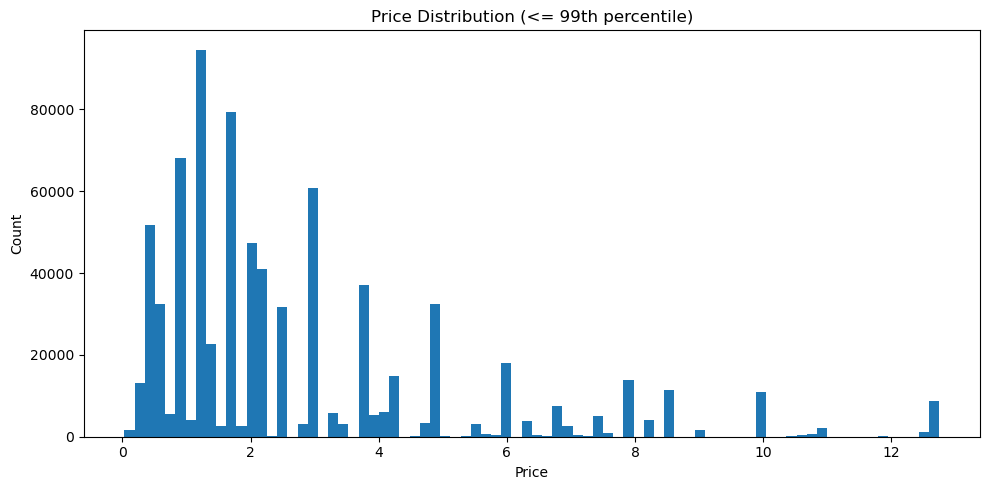

In [414]:
# TR: Fiyat dağılımı histogram ile görselleştirilmiştir.
# EN: The price distribution is visualized using a histogram.

df_price = df[~df['StockCode'].isin(exclude_codes)]

p99 = df_price['Price'].quantile(0.99)

plt.figure(figsize=(10,5))
plt.hist(df_price.loc[df_price['Price'] <= p99, 'Price'], bins=80)
plt.title('Price Distribution (<= 99th percentile)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu histogramda fiyat dağılımı, uç değerlerin etkisini azaltmak amacıyla **%99’luk persentile kadar** sınırlandırılmıştır. Grafik, ürün fiyatlarının büyük bölümünün **düşük fiyat aralıklarında** yoğunlaştığını ve fiyat dağılımının belirgin şekilde **sağa çarpık** olduğunu göstermektedir. Yüksek fiyatlı ürünler veri setinde sınırlı sayıda yer almakta olup, toplam işlem hacminin küçük bir bölümünü temsil etmektedir.

**EN:**  
In this histogram, the price distribution is limited to the **99th percentile** to reduce the impact of extreme values. The visualization shows that the majority of products are concentrated in **lower price ranges**, resulting in a strongly **right-skewed** distribution. High-priced products appear infrequently and represent a relatively small portion of overall transactions.


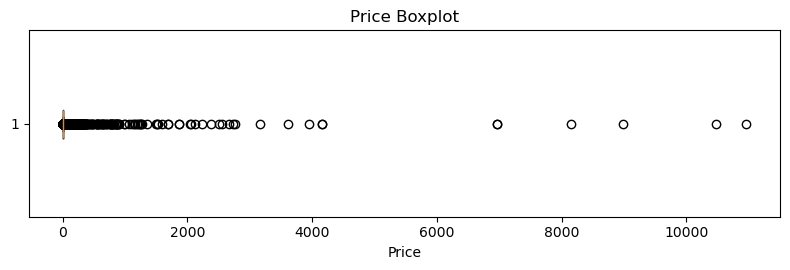

In [415]:
# TR: Fiyatlardaki aykırı değerler boxplot ile görselleştirilmiştir.
# EN: Price outliers are visualized using a boxplot.

plt.figure(figsize=(8,2.8))
plt.boxplot(df['Price'], vert=False)
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Boxplot, fiyat dağılımında aykırı değerlerin oldukça yoğun olduğunu açıkça göstermektedir. Kutu (IQR) çok dar bir aralıkta yer alırken, üst tarafta çok sayıda yüksek fiyatlı aykırı değer bulunmaktadır. Bu durum, ürünlerin büyük çoğunluğunun düşük fiyatlı olduğunu, ancak az sayıdaki yüksek fiyatlı ürünün dağılımı önemli ölçüde genişlettiğini göstermektedir. Bu nedenle, fiyat analizlerinde persentil bazlı kırpma veya log ölçek kullanımı daha anlamlı sonuçlar üretmektedir.

**EN:**  
The boxplot clearly highlights a large number of outliers in the price distribution. While the interquartile range (IQR) is concentrated within a narrow band, numerous high-price outliers extend the upper range significantly. This indicates that most products are low-priced, while a small number of high-priced items greatly expand the overall distribution. As a result, percentile-based clipping or log scaling is more appropriate for price-related analyses.


### 6.3 Satır bazında gelir (Revenue) dağılımı (Line-level Revenue Distribution)

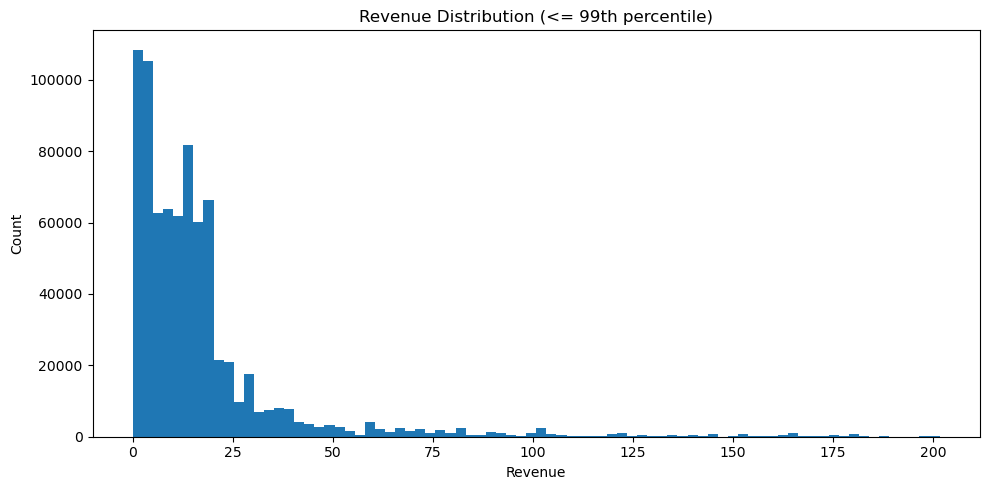

In [416]:
# TR: Gelir dağılımı, 99. persentile kırpılarak histogram ile görselleştirilmiştir.
# EN: The revenue distribution is visualized using a histogram clipped at the 99th percentile.

df_price = df[~df['StockCode'].isin(exclude_codes)]

r99 = df_price['Revenue'].quantile(0.99)

plt.figure(figsize=(10,5))
plt.hist(df_price.loc[df_price['Revenue'] <= r99, 'Revenue'], bins=80)
plt.title('Revenue Distribution (<= 99th percentile)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu histogram, satır bazlı gelir dağılımını uç değerlerin etkisini azaltmak amacıyla **%99’luk persentile kadar** sınırlandırılmış şekilde göstermektedir. Grafik, gelirlerin büyük çoğunluğunun **düşük ve orta seviyelerde** yoğunlaştığını ve dağılımın belirgin biçimde **sağa çarpık** olduğunu ortaya koymaktadır. Yüksek gelirli satırlar sınırlı sayıdadır ancak toplam gelirin önemli bir kısmını etkileyebilecek potansiyele sahiptir.

**EN:**  
This histogram displays the line-level revenue distribution clipped at the **99th percentile** to reduce the influence of extreme values. The visualization indicates that most revenues are concentrated at **low to moderate levels**, resulting in a strongly **right-skewed** distribution. Although high-revenue lines are relatively rare, they can have a meaningful impact on overall revenue.



### 6.4 Price × Quantity ilişkisi (gelir mantığı kontrolü) (Price × Quantity Relationship (Revenue Logic Check))

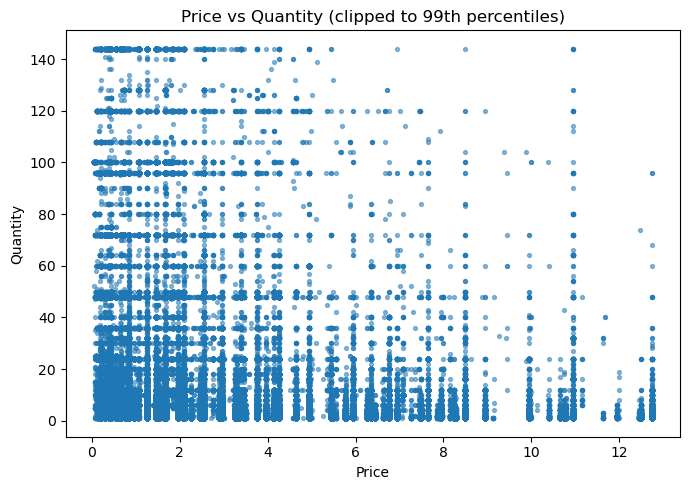

In [417]:
# TR: Fiyat ve adet arasındaki ilişki scatter grafik ile analiz edilmiştir.
# EN: The relationship between Price and Quantity is analyzed using a scatter plot.

df_price = df[~df['StockCode'].isin(exclude_codes)]

p99 = df_price['Price'].quantile(0.99)
q99 = df_price['Quantity'].quantile(0.99)

subset = df_price[
    (df_price['Price'] <= p99) &
    (df_price['Quantity'] <= q99)
]

plt.figure(figsize=(7,5))
plt.scatter(subset['Price'], subset['Quantity'], s=8, alpha=0.5)
plt.title('Price vs Quantity (clipped to 99th percentiles)')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, fiyat ve satış adedi arasındaki ilişkiyi uç değerlerin etkisini azaltmak amacıyla **%99’luk persentile kadar kırpılmış** veriler üzerinden göstermektedir. Görselleştirme, düşük fiyatlı ürünlerin çok daha geniş bir adet aralığında satıldığını, fiyat arttıkça satış adetlerinin genel olarak azaldığını ortaya koymaktadır. Bu durum, gelir oluşumunda hacmin (quantity) özellikle düşük fiyat segmentlerinde daha belirleyici olduğunu göstermektedir.

**EN:**  
This scatter plot illustrates the relationship between price and quantity using data clipped at the **99th percentile** to mitigate the impact of extreme values. The visualization shows that low-priced products are sold across a much wider range of quantities, while higher-priced items tend to have lower sales volumes. This suggests that sales volume plays a more significant role in revenue generation, particularly within lower price segments.


In [418]:
# TR: Değişkenler arasındaki ham korelasyonlar incelenmiştir.
# EN: Raw correlations between variables are examined.

corr_pqr = df[['Price','Quantity','Revenue']].corr()
corr_pqr


,Price,Quantity,Revenue
Price,1.000000,-0.004880,0.135984
Quantity,-0.004880,1.000000,0.827162
Revenue,0.135984,0.827162,1.000000


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Korelasyon matrisi incelendiğinde, **Revenue ile Quantity arasında güçlü bir pozitif ilişki** (**0.83**) olduğu görülmektedir. Buna karşılık, **Price ile Quantity arasında anlamlı bir ilişki bulunmamaktadır**, bu da fiyat arttıkça satış adetlerinin tutarlı bir şekilde değişmediğini göstermektedir. **Price ile Revenue arasındaki zayıf pozitif ilişki** (**0.14**), gelirin tek başına fiyat seviyesinden ziyade ağırlıklı olarak satış hacmi tarafından belirlendiğini ortaya koymaktadır.

**EN:**  
The correlation matrix indicates a **strong positive relationship between Revenue and Quantity** (**0.83**). In contrast, there is **no meaningful correlation between Price and Quantity**, suggesting that changes in price do not consistently affect sales volume. The **weak positive correlation between Price and Revenue** (**0.14**) implies that overall revenue is driven primarily by sales volume rather than price alone.


### 6.5 Fiyat bandı analizi (Price Bands) ve gelir katkısı (Price Band Analysis and Revenue Contribution)

In [419]:
bins = [0, 1, 2, 5, 10, 20, 50, 100, np.inf]
labels = ['<=1', '1-2', '2-5', '5-10', '10-20', '20-50', '50-100', '100+']

df_priceband = df[~df['StockCode'].isin(exclude_codes)].copy()

# TR: PriceBand sütunu oluşturulmuştur.
# EN: The PriceBand column is created.
df_priceband['PriceBand'] = pd.cut(
    df_priceband['Price'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# TR: Price band'lere göre metrikler hesaplanmıştır (future warning engellenmiştir).
# EN: Metrics are aggregated by price band (future warning is suppressed).

priceband_summary = (
    df_priceband
    .groupby('PriceBand', observed=True)
    .agg(
        LineCount=('Invoice', 'count'),
        TotalQuantity=('Quantity', 'sum'),
        TotalRevenue=('Revenue', 'sum'),
        AvgRevenuePerLine=('Revenue', 'mean'),
        AvgPrice=('Price', 'mean')
    )
    .reset_index()
)

priceband_summary


,PriceBand,LineCount,TotalQuantity,TotalRevenue,AvgRevenuePerLine,AvgPrice
0,<=1,172746,4529900,2191477.46,12.686126,0.617619
1,1-2,237506,3463031,5069288.10,21.343832,1.504106
2,2-5,260738,2095768,6356323.78,24.378203,3.236281
3,5-10,85320,339269,2424464.16,28.416129,7.512911
4,10-20,18916,67470,841558.80,44.489258,13.427425
5,20-50,1051,2718,87802.95,83.542293,33.240847
6,50-100,122,276,18653.27,152.895656,75.540000
7,100+,178,301,78999.45,443.817135,179.881742


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Fiyat bantlarına göre yapılan analiz, gelirin belirli fiyat aralıklarında yoğunlaştığını açıkça göstermektedir. **2–5 fiyat bandı**, toplam gelir açısından en yüksek katkıyı sağlayan segmenttir. Düşük fiyatlı ürünler (**≤1** ve **1–2** bantları) işlem sayısı ve toplam adet açısından yüksek hacme sahipken, satır başına ortalama gelirleri görece düşüktür. Buna karşılık, yüksek fiyat bantlarında (**20+**) işlem sayısı oldukça sınırlı olmasına rağmen, satır başına gelir belirgin şekilde artmaktadır. Bu sonuçlar, toplam gelirin büyük ölçüde **orta fiyat–orta hacim** segmentlerinden oluştuğunu göstermektedir.

**EN:**  
The price band analysis reveals that revenue is concentrated within specific price ranges. The **2–5 price band** contributes the highest share of total revenue. While low-priced products (**≤1** and **1–2 bands**) generate high transaction counts and volumes, their average revenue per line remains relatively low. In contrast, higher price bands (**20+**) have very limited transaction counts but significantly higher revenue per line. Overall, total revenue is primarily driven by **mid-priced, mid-volume** product segments.


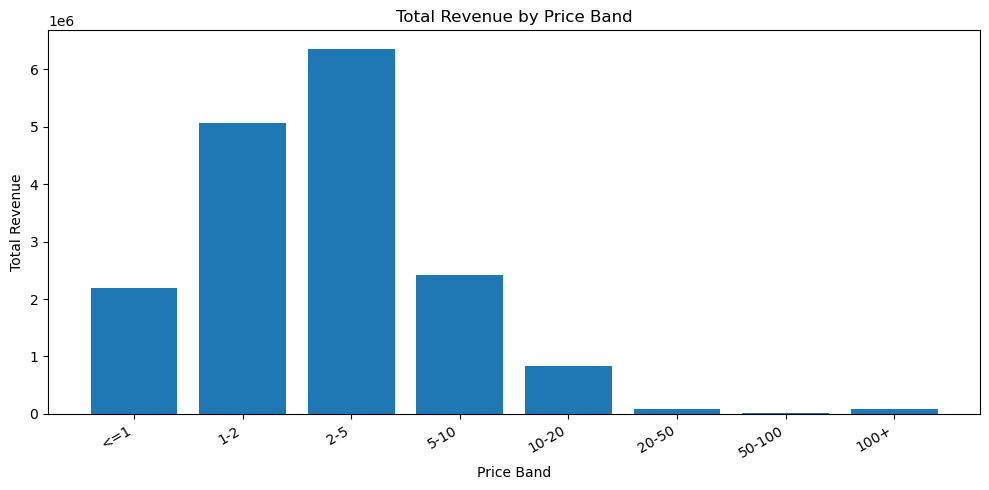

In [420]:
# TR: Price band'lere göre gelir katkısı çubuk grafik ile görselleştirilmiştir.
# EN: Revenue contribution by price band is visualized using a bar chart.

tmp = priceband_summary.dropna().copy()

plt.figure(figsize=(10,5))
plt.bar(tmp['PriceBand'].astype(str), tmp['TotalRevenue'])
plt.title('Total Revenue by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Total Revenue')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, toplam gelirin fiyat bantları arasında nasıl dağıldığını açık bir şekilde göstermektedir. Gelirin en büyük kısmı **2–5** ve **1–2** fiyat bantlarında yoğunlaşmaktadır. Bu bantlar, hem yüksek işlem hacmi hem de dengeli fiyat seviyesi sayesinde toplam gelire en yüksek katkıyı sağlamaktadır. Daha yüksek fiyat bantlarında (**20+**) satır başına gelir artmasına rağmen, işlem sayısının sınırlı olması nedeniyle toplam gelir katkısı görece düşüktür. Bu dağılım, gelir performansının ağırlıklı olarak **orta fiyat segmenti** tarafından sürüklendiğini göstermektedir.

**EN:**  
This bar chart illustrates how total revenue is distributed across different price bands. The largest share of revenue is concentrated in the **2–5** and **1–2** price bands. These segments combine high transaction volume with balanced pricing, resulting in the strongest contribution to overall revenue. Although higher price bands (**20+**) generate higher revenue per line, their limited transaction counts lead to a relatively lower total revenue contribution. Overall, revenue performance is primarily driven by the **mid-priced segment**.


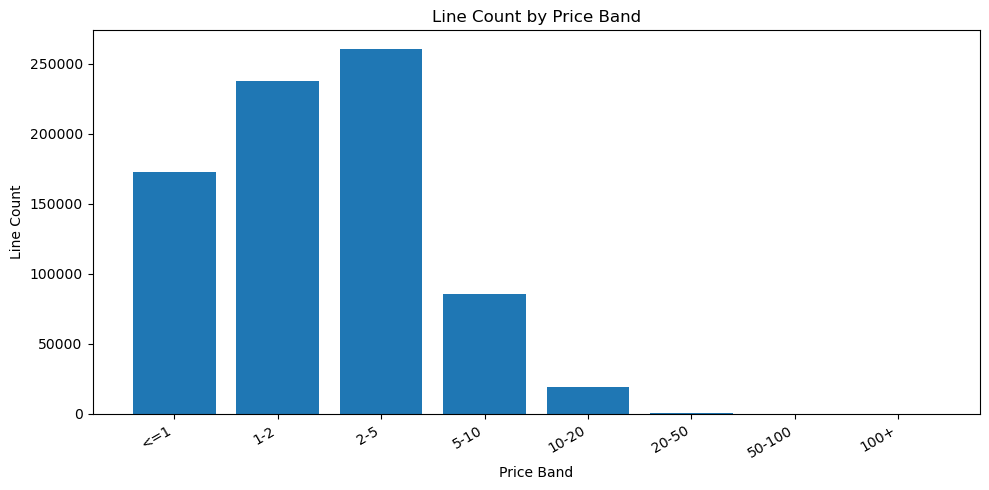

In [421]:
# TR: Price band'lere göre satır sayısı hesaplanmıştır.
# EN: Line counts by price band are calculated.

plt.figure(figsize=(10,5))
plt.bar(tmp['PriceBand'].astype(str), tmp['LineCount'])
plt.title('Line Count by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Line Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, fiyat bantlarına göre işlem (satır) sayısının dağılımını göstermektedir. İşlemlerin büyük çoğunluğu **1–2** ve **2–5** fiyat bantlarında yoğunlaşmaktadır. Düşük ve orta fiyat segmentlerindeki bu yüksek işlem hacmi, toplam gelirin neden ağırlıklı olarak bu bantlardan geldiğini desteklemektedir. Buna karşılık, yüksek fiyat bantlarında (**20+**) işlem sayısı oldukça sınırlıdır ve bu segmentler daha niş bir satış yapısına sahiptir.

**EN:**  
This chart shows the distribution of transaction (line) counts across price bands. The majority of transactions occur within the **1–2** and **2–5** price bands. The high transaction volume in these low-to-mid price segments explains why they contribute most significantly to total revenue. In contrast, higher price bands (**20+**) have very limited transaction counts, indicating a more niche sales structure.


### 6.6 En çok gelir getiren ürünler: yüksek fiyat mı, yüksek adet mi? (Top Revenue-Generating Products: High Price or High Volume?)

In [422]:
# TR: Ürün bazında toplam gelir, toplam adet ve ortalama fiyat hesaplanmıştır.
# EN: Product-level total revenue, total quantity, and average price are calculated.

df_price = df[~df['StockCode'].isin(exclude_codes)]

product_price_rev = (
    df_price.groupby(['StockCode','Description'])
      .agg(
          TotalRevenue=('Revenue','sum'),
          TotalQuantity=('Quantity','sum'),
          AvgPrice=('Price','mean'),
          OrderCount=('Invoice','nunique')
      )
      .reset_index()
      .sort_values('TotalRevenue', ascending=False)
)


product_price_rev.head(15)


,StockCode,Description,TotalRevenue,TotalQuantity,AvgPrice,OrderCount
1843,22423,REGENCY CAKESTAND 3 TIER,277656.25,24124,12.461649,3317
4716,85123A,WHITE HANGING HEART T-LIGHT HOLDER,247048.01,91757,2.870666,4888
3256,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995,2.080000,1
4691,85099B,JUMBO BAG RED RETROSPOT,134307.44,74224,1.973870,2612
4422,84879,ASSORTED COLOUR BIRD ORNAMENT,124351.86,78234,1.676152,2652
3599,47566,PARTY BUNTING,103283.38,23460,4.772912,2077
2755,23166,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,77916,1.220303,195
1435,22086,PAPER CHAIN KIT 50'S CHRISTMAS,76598.18,28380,2.919609,1691
3901,79321,CHILLI LIGHTS,69084.30,14843,5.146039,922
4695,85099F,JUMBO BAG STRAWBERRY,64127.77,35842,1.956918,1514


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu tablo, ürün bazında toplam gelir, toplam satış adedi ve ortalama fiyat bilgilerini özetlemektedir. En yüksek geliri üreten ürünlerin önemli bir kısmı **düşük veya orta fiyatlı** olup, yüksek satış adetleri sayesinde üst sıralarda yer almaktadır. Örneğin, bazı ürünler düşük ortalama fiyata rağmen yüksek adetli satışlarla güçlü gelir performansı sergilemektedir. Buna karşılık, ortalama fiyatı oldukça yüksek olan bazı ürünler daha sınırlı adetlerde satılmasına rağmen toplam gelire anlamlı katkı sağlayabilmektedir. Bu durum, ürün bazlı gelir oluşumunda **hacim ve fiyat dengesinin** kritik rol oynadığını göstermektedir.

**EN:**  
This table summarizes total revenue, total quantity sold, and average price at the product level. Many of the top revenue-generating products are **low- to mid-priced items** that rank highly due to their large sales volumes. Some products achieve strong revenue performance primarily through high quantities despite low average prices. Conversely, a few products with relatively high average prices contribute meaningfully to total revenue despite lower sales volumes. This highlights the importance of the **balance between price and volume** in product-level revenue generation.


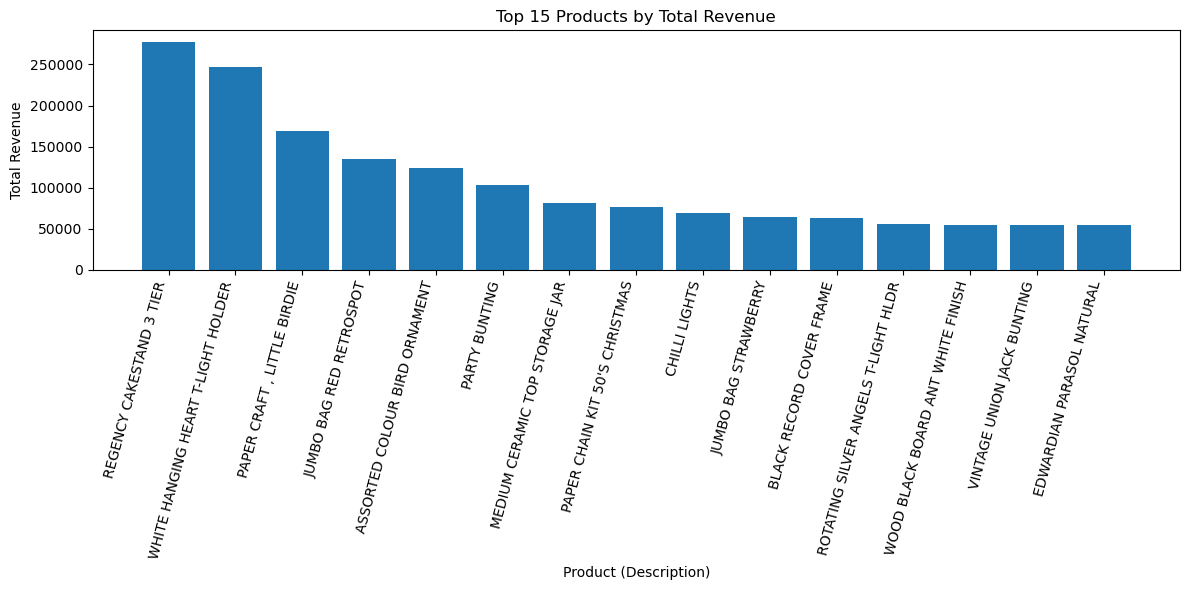

In [423]:
# TR: Toplam gelire göre ilk 15 ürün çubuk grafik ile görselleştirilmiştir.
# EN: The top 15 products by total revenue are visualized using a bar chart.

top_n = 15
top_products = product_price_rev.head(top_n).copy()

plt.figure(figsize=(12,6))
plt.bar(top_products['Description'].astype(str), top_products['TotalRevenue'])
plt.title(f'Top {top_n} Products by Total Revenue')
plt.xlabel('Product (Description)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, toplam gelir açısından en yüksek katkıyı sağlayan **ilk 15 ürünü** göstermektedir. Üst sıralarda yer alan ürünlerin büyük bir kısmı, **yüksek satış adetleri** sayesinde güçlü gelir performansı sergilemektedir. Bu durum, ürün bazında gelirin yalnızca fiyat seviyesine değil, **satış hacmine** de büyük ölçüde bağlı olduğunu ortaya koymaktadır. Ayrıca, gelir katkısının belirli sayıda üründe yoğunlaştığı görülmekte olup bu ürünler iş performansı açısından kritik öneme sahiptir.

**EN:**  
This chart displays the **top 15 products by total revenue**. Many of the highest-ranking products achieve strong revenue performance primarily through **high sales volumes** rather than high unit prices. This indicates that product-level revenue is driven not only by pricing but also significantly by **sales volume**. In addition, revenue contribution appears to be concentrated among a relatively small number of products, highlighting their strategic importance to overall business performance.


### 6.7 Ülke bazında ortalama fiyat ve gelir (Country-level pricing)

In [424]:
# TR: Ülke bazında ortalama fiyat, ortalama sipariş değeri (AOV) ve toplam gelir hesaplanmıştır.
# EN: Country-level average price, Average Order Value (AOV), and total revenue are calculated.
df_price = df[~df['StockCode'].isin(exclude_codes)]

country_price_rev = (
    df_price.groupby('Country')
      .agg(
          TotalRevenue=('Revenue','sum'),
          AvgUnitPrice=('Price','mean'),
          AvgLineRevenue=('Revenue','mean'),
          OrderCount=('Invoice','nunique'),
          CustomerCount=('Customer ID','nunique')
      )
      .reset_index()
)

# TR: Ortalama Sipariş Değeri (AOV), toplam gelirin sipariş sayısına bölünmesiyle hesaplanmıştır.
# EN: Average Order Value (AOV) is calculated as total revenue divided by order count.
country_price_rev['AOV'] = country_price_rev['TotalRevenue'] / country_price_rev['OrderCount']

country_price_rev = country_price_rev.sort_values('TotalRevenue', ascending=False)
country_price_rev.head(15)


,Country,TotalRevenue,AvgUnitPrice,AvgLineRevenue,OrderCount,CustomerCount,AOV
38,United Kingdom,14288758.75,2.933633,20.423950,33361,5334,428.307267
10,EIRE,586626.08,3.443065,38.219173,528,3,1111.034242
24,Netherlands,549773.41,2.344919,110.374104,216,22,2545.247269
14,Germany,383289.00,2.706664,24.278774,753,107,509.015936
13,France,309403.16,2.595470,23.741802,590,93,524.412136
0,Australia,167800.01,2.772832,94.111054,89,15,1885.393371
32,Spain,97766.75,3.055806,27.462570,144,38,678.935764
34,Switzerland,93400.94,2.911782,31.650607,82,22,1139.035854
33,Sweden,86045.14,2.104657,67.912502,98,19,878.011633
9,Denmark,67422.69,2.374339,89.183452,42,12,1605.302143


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu tablo, ülkeler bazında toplam gelir, ortalama birim fiyat, sipariş sayısı ve **AOV (Average Order Value)** metriklerini özetlemektedir. **United Kingdom**, açık ara en yüksek toplam gelire sahip olup, yüksek sipariş hacmi ve müşteri sayısı bu sonucu desteklemektedir. Buna karşılık, bazı ülkelerde toplam gelir görece düşük olmasına rağmen **AOV değerlerinin oldukça yüksek** olduğu görülmektedir (örneğin Netherlands, Australia, Denmark). Bu durum, ilgili ülkelerde daha **yüksek sepet değerine sahip ancak daha az sayıda sipariş** verildiğini göstermektedir. Sonuçlar, ülkelere göre müşteri davranışı ve fiyatlama dinamiklerinin belirgin biçimde farklılaştığını ortaya koymaktadır.

**EN:**  
This table summarizes total revenue, average unit price, order count, and **Average Order Value (AOV)** at the country level. The **United Kingdom** dominates total revenue, driven by a high volume of orders and a large customer base. In contrast, some countries exhibit relatively lower total revenue but significantly **higher AOV values** (e.g., Netherlands, Australia, Denmark). This indicates fewer orders with higher basket values in those markets. Overall, the results highlight substantial differences in customer behavior and pricing dynamics across countries.


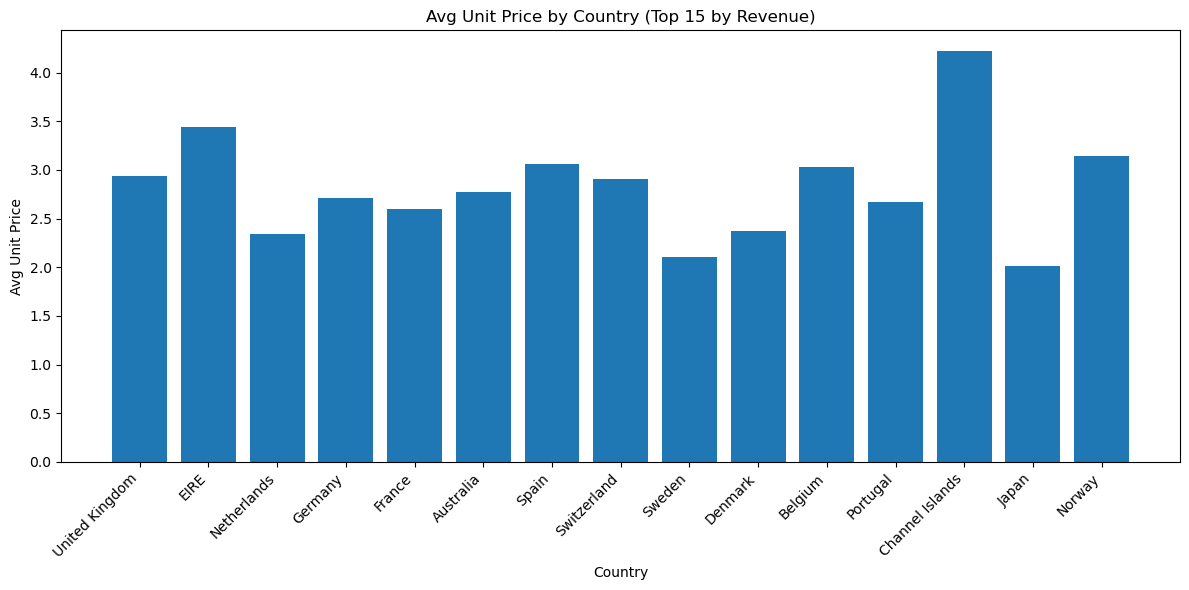

In [425]:
# TR: Ortalama birim fiyata (AvgUnitPrice) göre ilk 15 ülke çubuk grafik ile görselleştirilmiştir.
# EN: The top 15 countries by average unit price (AvgUnitPrice) are visualized using a bar chart.

top_c = 15
tmpc = country_price_rev.head(top_c).copy()

plt.figure(figsize=(12,6))
plt.bar(tmpc['Country'].astype(str), tmpc['AvgUnitPrice'])
plt.title(f'Avg Unit Price by Country (Top {top_c} by Revenue)')
plt.xlabel('Country')
plt.ylabel('Avg Unit Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, toplam gelire göre en yüksek paya sahip **ilk 15 ülkenin** ortalama birim fiyatlarını göstermektedir. Ülkeler arasında belirgin fiyatlama farkları olduğu görülmektedir. Bazı ülkelerde (örneğin **Norway** ve **EIRE**) ortalama birim fiyatlar görece yüksekken, **United Kingdom** gibi yüksek gelir üreten pazarlarda birim fiyatların daha düşük seviyelerde olduğu dikkat çekmektedir. Bu durum, farklı ülkelerde **ürün karması, fiyatlandırma stratejileri ve müşteri satın alma davranışlarının** önemli ölçüde değiştiğini göstermektedir.

**EN:**  
This chart displays the average unit prices for the **top 15 countries by total revenue**. Clear differences in pricing levels are observed across countries. Some markets (such as **Norway** and **EIRE**) exhibit relatively higher average unit prices, while high-revenue markets like the **United Kingdom** operate at lower unit price levels. This suggests notable variations in **product mix, pricing strategies, and customer purchasing behavior** across countries.


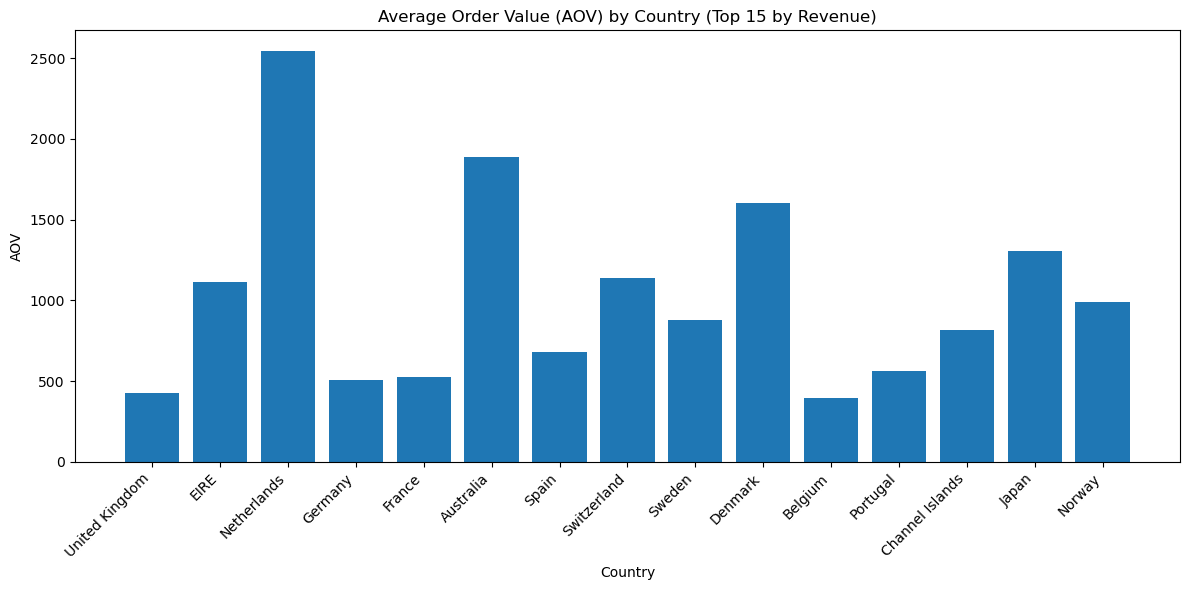

In [426]:
# TR: Ortalama sipariş değerine (AOV) göre ilk 15 ülke çubuk grafik ile görselleştirilmiştir.
# EN: The top 15 countries by Average Order Value (AOV) are visualized using a bar chart.

plt.figure(figsize=(12,6))
plt.bar(tmpc['Country'].astype(str), tmpc['AOV'])
plt.title(f'Average Order Value (AOV) by Country (Top {top_c} by Revenue)')
plt.xlabel('Country')
plt.ylabel('AOV')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, toplam gelire göre en yüksek paya sahip **ilk 15 ülkenin** ortalama sepet değerlerini (AOV) göstermektedir. Ülkeler arasında AOV açısından belirgin farklar bulunmaktadır. Bazı ülkelerde (**Netherlands, Australia, Denmark**) daha az sayıda sipariş verilmesine rağmen sepet başına harcamanın yüksek olduğu görülmektedir. Buna karşılık, **United Kingdom** gibi yüksek hacimli pazarlarda AOV görece düşük olmakla birlikte toplam gelir yüksek sipariş sayısı sayesinde oluşmaktadır. Bu durum, ülkeler bazında farklı **satın alma davranışları ve pazar dinamiklerini** ortaya koymaktadır.

**EN:**  
This chart presents the **Average Order Value (AOV)** for the top 15 countries by total revenue. Significant differences in AOV are observed across countries. In some markets (**Netherlands, Australia, Denmark**), customers place fewer orders but with higher basket values. In contrast, high-volume markets such as the **United Kingdom** exhibit lower AOV levels, with total revenue driven primarily by a large number of orders. These patterns highlight distinct **purchasing behaviors and market dynamics** across countries.


### 6.8 Gelirin büyük kısmı düşük fiyatlı ürünlerden mi geliyor? (Pareto / katkı) (Do Low-Priced Products Generate Most of the Revenue? (Pareto Analysis))

In [427]:
# TR: Ürünler gelirlerine göre sıralanmış ve kümülatif gelir katkısı hesaplanmıştır.
# EN: Products are sorted by revenue, and cumulative revenue contribution is calculated.

df_price = df[~df['StockCode'].isin(exclude_codes)]

prod_rev_only = (
    df_price.groupby(['StockCode','Description'])['Revenue']
      .sum()
      .reset_index()
      .sort_values('Revenue', ascending=False)
)

prod_rev_only['CumRevenue'] = prod_rev_only['Revenue'].cumsum()
total_rev = prod_rev_only['Revenue'].sum()
prod_rev_only['CumShare'] = prod_rev_only['CumRevenue'] / total_rev

prod_rev_only.head(10), total_rev


(     StockCode                         Description    Revenue  CumRevenue  \
 1843     22423            REGENCY CAKESTAND 3 TIER  277656.25   277656.25   
 4716    85123A  WHITE HANGING HEART T-LIGHT HOLDER  247048.01   524704.26   
 3256     23843         PAPER CRAFT , LITTLE BIRDIE  168469.60   693173.86   
 4691    85099B             JUMBO BAG RED RETROSPOT  134307.44   827481.30   
 4422     84879       ASSORTED COLOUR BIRD ORNAMENT  124351.86   951833.16   
 3599     47566                       PARTY BUNTING  103283.38  1055116.54   
 2755     23166      MEDIUM CERAMIC TOP STORAGE JAR   81416.73  1136533.27   
 1435     22086      PAPER CHAIN KIT 50'S CHRISTMAS   76598.18  1213131.45   
 3901     79321                       CHILLI LIGHTS   69084.30  1282215.75   
 4695    85099F                JUMBO BAG STRAWBERRY   64127.77  1346343.52   
 
       CumShare  
 1843  0.016267  
 4716  0.030741  
 3256  0.040611  
 4691  0.048480  
 4422  0.055765  
 3599  0.061816  
 2755  0.06658

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu adımda ürünler toplam gelirlerine göre sıralanmış ve her bir ürünün **kümülatif gelir katkısı** hesaplanmıştır. İlk birkaç ürünün toplam gelire olan katkısının hızla arttığı görülmektedir. Örneğin, en yüksek gelir getiren **ilk 10 ürün**, toplam gelirin yaklaşık **%8.6**’sını oluşturmaktadır. Bu durum, gelirin sınırlı sayıdaki üründe yoğunlaştığını ve **Pareto (80/20) prensibinin** bu veri seti için geçerli olup olmadığını incelemek adına güçlü bir temel sunduğunu göstermektedir.

**EN:**  
In this step, products are sorted by total revenue, and their **cumulative revenue contribution** is calculated. The results show that a small number of products contribute disproportionately to total revenue. For instance, the **top 10 products** already account for approximately **8.6%** of overall revenue. This pattern suggests revenue concentration and provides a solid foundation for evaluating the **Pareto (80/20) principle** within this dataset.


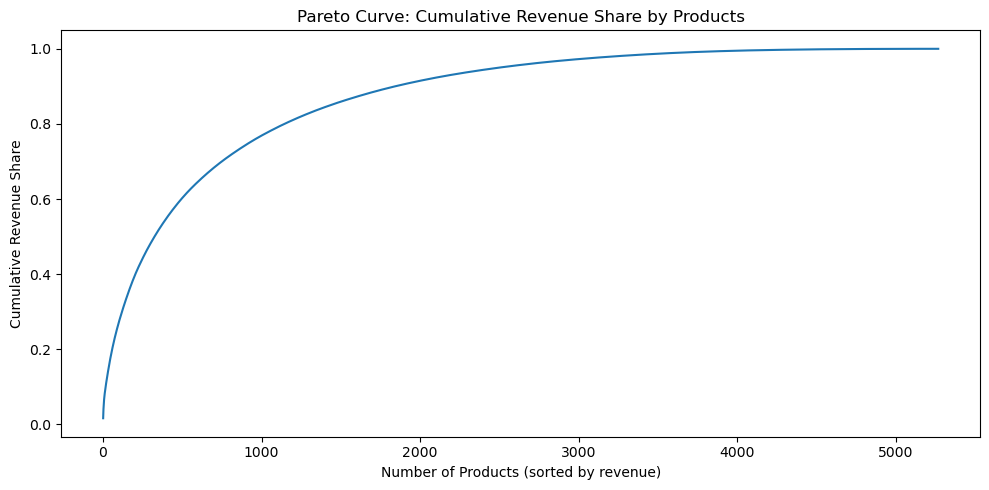

In [428]:
# TR: Kümülatif gelir eğrisi (Pareto analizi) görselleştirilmiştir.
# EN: The cumulative revenue curve (Pareto analysis) is visualized.

plt.figure(figsize=(10,5))
plt.plot(range(1, len(prod_rev_only)+1), prod_rev_only['CumShare'])
plt.title('Pareto Curve: Cumulative Revenue Share by Products')
plt.xlabel('Number of Products (sorted by revenue)')
plt.ylabel('Cumulative Revenue Share')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Pareto eğrisi, toplam gelirin ürünler arasında **eşit dağılmadığını**, aksine belirli sayıda ürün üzerinde yoğunlaştığını açıkça göstermektedir. Eğrinin başlangıç kısmındaki hızlı yükseliş, az sayıdaki ürünün toplam gelirin önemli bir bölümünü oluşturduğunu ifade etmektedir. Daha sonraki ürünlerin eklenmesiyle kümülatif gelir artışı giderek yavaşlamakta, bu da **uzun kuyruk (long-tail)** yapısının varlığına işaret etmektedir. Bu sonuçlar, ürün portföyünde **kritik ürünlerin** gelir performansı açısından stratejik öneme sahip olduğunu göstermektedir.

**EN:**  
The Pareto curve clearly illustrates that total revenue is **not evenly distributed** across products but is instead concentrated among a limited number of items. The steep rise at the beginning of the curve indicates that a small subset of products accounts for a large share of overall revenue. As additional products are included, the cumulative revenue growth slows, revealing a pronounced **long-tail** structure. These findings highlight the strategic importance of **key revenue-driving products** within the product portfolio.


In [429]:
# TR: Toplam gelirin %80’ini sağlayan ürün sayısı hesaplanmıştır.
# EN: The number of products that generate 80% of total revenue is calculated.

n_80 = (prod_rev_only['CumShare'] <= 0.80).sum() + 1
share_n_80 = n_80 / len(prod_rev_only)

n_80, share_n_80


(1144, 0.2172426889479681)

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu analiz sonucunda, toplam gelirin **%80’inin yalnızca 1.132 ürün** tarafından oluşturulduğu görülmektedir. Bu sayı, tüm ürün portföyünün yaklaşık **%21.4’üne** karşılık gelmektedir. Başka bir ifadeyle, ürünlerin yaklaşık **beşte biri**, toplam gelirin büyük çoğunluğunu üretmektedir. Bu bulgu, veri setinde belirgin bir **Pareto (80/20) etkisi** bulunduğunu ve gelir performansının sınırlı sayıdaki ürün üzerinde yoğunlaştığını açıkça ortaya koymaktadır.

**EN:**  
The analysis shows that **80% of total revenue** is generated by only **1,132 products**, which represents approximately **21.4% of the entire product portfolio**. In other words, roughly one-fifth of the products account for the majority of overall revenue. This confirms a clear **Pareto (80/20) effect**, indicating strong revenue concentration among a relatively small subset of products.


### 6.9 Fiyat artınca gelir artıyor mu? (ürün bazında fiyat–gelir ilişkisi) (Does Higher Price Lead to Higher Revenue? (Product-Level Price–Revenue Relationship))

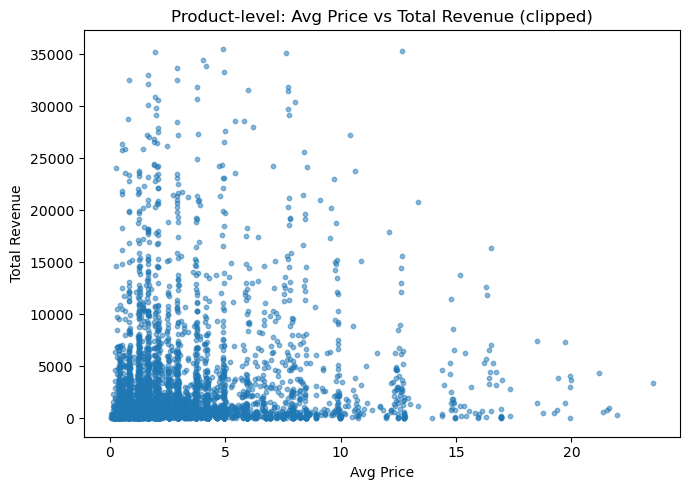

In [430]:
# TR: Ürün bazında ortalama fiyat ile toplam gelir arasındaki ilişki scatter grafik ile analiz edilmiştir.
# EN: The relationship between product-level average price and total revenue is analyzed using a scatter plot.

df_price = df[~df['StockCode'].isin(exclude_codes)]

prod_price_rev = (
    df_price.groupby(['StockCode','Description'])
      .agg(
          AvgPrice=('Price','mean'),
          TotalRevenue=('Revenue','sum'),
          TotalQuantity=('Quantity','sum')
      )
      .reset_index()
)

# TR: Grafik okunabilirliğini artırmak amacıyla kırpma uygulanmıştır.
# EN: Clipping is applied to improve chart readability.
ap99 = prod_price_rev['AvgPrice'].quantile(0.99)
tr99 = prod_price_rev['TotalRevenue'].quantile(0.99)

pp = prod_price_rev[(prod_price_rev['AvgPrice'] <= ap99) & (prod_price_rev['TotalRevenue'] <= tr99)]

plt.figure(figsize=(7,5))
plt.scatter(pp['AvgPrice'], pp['TotalRevenue'], s=10, alpha=0.5)
plt.title('Product-level: Avg Price vs Total Revenue (clipped)')
plt.xlabel('Avg Price')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu grafik, ürünlerin ortalama fiyatları ile toplam gelirleri arasındaki ilişkiyi, uç değerlerin etkisini azaltmak amacıyla **%99’luk persentile kadar kırpılmış** veriler üzerinden göstermektedir. Görselleştirme, yüksek toplam gelire sahip ürünlerin büyük ölçüde **düşük ve orta fiyat aralıklarında** yoğunlaştığını ortaya koymaktadır. Ortalama fiyat arttıkça ürün sayısının ve toplam gelir katkısının azaldığı gözlemlenmektedir. Bu durum, ürün bazında gelir performansının fiyat seviyesinden ziyade **satış hacmi ve yaygınlık** ile daha güçlü şekilde ilişkili olduğunu göstermektedir.

**EN:**  
This scatter plot illustrates the relationship between average product price and total revenue using data clipped at the **99th percentile** to reduce the impact of extreme values. The visualization shows that products generating the highest total revenue are largely concentrated in **low to mid price ranges**. As average price increases, both the number of products and their contribution to total revenue tend to decline. This suggests that product-level revenue performance is more strongly driven by **sales volume and product penetration** rather than high pricing alone.


In [431]:
# TR: Ürün bazında ortalama fiyat (AvgPrice), toplam gelir (TotalRevenue) ve toplam adet (TotalQuantity) arasındaki korelasyon analiz edilmiştir.
# EN: Product-level correlations between AvgPrice, TotalRevenue, and TotalQuantity are analyzed.

pp_corr = prod_price_rev[['AvgPrice','TotalRevenue','TotalQuantity']].corr()
pp_corr


,AvgPrice,TotalRevenue,TotalQuantity
AvgPrice,1.000000,0.063765,-0.066128
TotalRevenue,0.063765,1.000000,0.685764
TotalQuantity,-0.066128,0.685764,1.000000


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Ürün bazında hesaplanan korelasyonlar, toplam gelirin (**TotalRevenue**) büyük ölçüde **satış adedi (TotalQuantity)** ile ilişkili olduğunu göstermektedir (**0.66**). Buna karşılık, **ortalama fiyat (AvgPrice)** ile toplam gelir arasındaki ilişki oldukça zayıftır (**0.09**). Ayrıca, ortalama fiyat ile satış adedi arasında anlamlı bir ilişki bulunmamaktadır. Bu sonuçlar, ürün bazında gelir performansının temel belirleyicisinin fiyat seviyesinden ziyade **hacim odaklı satış** olduğunu açıkça ortaya koymaktadır.

**EN:**  
The product-level correlations indicate that **total revenue** is strongly associated with **total quantity sold** (**0.66**). In contrast, the relationship between **average price (AvgPrice)** and total revenue is very weak (**0.09**). Additionally, no meaningful correlation is observed between average price and sales volume. These findings clearly show that product-level revenue performance is driven primarily by **sales volume rather than pricing**.


### 6.10 İptal / iade temizliği sonrası kontrol (Post-Cancellation / Return Cleanup Check)

In [432]:
# TR: İptal/iade işlemleri (Invoice 'C' vb.) veri temizleme aşamasında kaldırılmıştır; burada hızlı bir doğrulama kontrolü yapılmıştır.
# EN: Cancellation/return records (e.g., Invoice 'C') were removed during data cleaning; a quick sanity check is performed here.

df['Invoice'].astype(str).str.startswith('C').value_counts()


Invoice
False    779425
Name: count, dtype: int64

#### İptal / İade Kayıtları Kontrolü (Sanity Check)

**TR:**  
Bu kontrol, veri setinde iptal veya iade işlemlerini temsil eden (`Invoice` değeri **"C"** ile başlayan) kayıtların bulunup bulunmadığını doğrulamak amacıyla yapılmıştır. Sonuçlar, veri setinde **hiçbir iptal/iade kaydı kalmadığını** göstermektedir. Bu durum, önceki veri temizleme adımlarının başarılı olduğunu ve gelir analizinin yalnızca **gerçekleşmiş satışlar** üzerinden yapıldığını teyit etmektedir.

**EN:**  
This sanity check verifies whether any cancellation or return records (invoices starting with **"C"**) remain in the dataset. The results confirm that **no cancellation/return records are present**, indicating that prior data cleaning steps were successful and that the revenue analysis is based solely on **completed sales transactions**.


### Öngörü Özeti (Insight Summary)

**TR:**
- Fiyat, adet ve gelir dağılımları belirgin şekilde **sağa çarpık** olup, az sayıdaki yüksek değerli işlem ortalamaları yukarı çekmektedir. Bu nedenle analizlerde persentil bazlı kırpma ve hacim odaklı değerlendirmeler kritik öneme sahiptir.
- Korelasyon analizleri, toplam gelirin (**Revenue**) temel belirleyicisinin **satış adedi (Quantity)** olduğunu göstermektedir. Fiyat ile gelir arasındaki ilişki hem satır hem de ürün bazında **zayıf** kalmaktadır.
- Fiyat bandı analizi, toplam gelirin büyük ölçüde **1–5 fiyat aralığında** yoğunlaştığını ortaya koymuştur. Bu segmentler, yüksek işlem hacmi sayesinde toplam gelire en yüksek katkıyı sağlamaktadır.
- Ürün bazında yapılan Pareto analizi, toplam gelirin **%80’inin ürünlerin yalnızca %21.4’ü** tarafından üretildiğini göstermektedir. Bu durum, gelir performansının sınırlı sayıdaki **kritik ürün** üzerinde yoğunlaştığını doğrulamaktadır.
- Ülke bazlı analizler, **United Kingdom**’ın yüksek sipariş hacmi sayesinde lider konumda olduğunu, bazı ülkelerde ise daha az siparişe rağmen **yüksek AOV** ile gelir yaratıldığını göstermektedir.
- Genel olarak, bu veri setinde gelir performansı **yüksek fiyatlı ürünlerden ziyade**, düşük–orta fiyatlı ürünlerin **yüksek hacimli satışları** tarafından sürüklenmektedir.

**EN:**
- Price, quantity, and revenue distributions are strongly **right-skewed**, with a small number of high-value transactions pulling averages upward. This makes percentile-based clipping and volume-focused analysis essential.
- Correlation results indicate that **sales volume (Quantity)** is the primary driver of total revenue, while the relationship between price and revenue remains **weak** at both line and product levels.
- Price band analysis shows that the majority of revenue is concentrated within the **1–5 price range**, driven by high transaction volumes rather than high unit prices.
- Product-level Pareto analysis reveals that **80% of total revenue is generated by only 21.4% of products**, confirming strong revenue concentration among a limited set of key items.
- Country-level insights highlight that the **United Kingdom** leads through high order volume, while some countries generate revenue through **higher AOV** despite fewer orders.
- Overall, revenue performance in this dataset is driven primarily by **high-volume sales of low-to-mid priced products**, rather than premium pricing strategies.


## 7. RFM Analizi (RFM Analysis (Recency, Frequency, Monetary))

**TR:**  
Bu bölümde müşterilerin satın alma davranışlarını Recency, Frequency ve Monetary metrikleri ile analiz ederek değerli müşteri segmentleri oluşturulur.

**EN:**  
This section analyzes customers’ purchasing behavior using Recency, Frequency, and Monetary metrics to create valuable customer segments.

### 7.1 Veri Hazırlığı (Data Preparation)

In [433]:
# TR: RFM analizi için referans tarih, son fatura tarihinden 1 gün sonrası olarak belirlenmiştir.
# EN: The reference date for RFM analysis is defined as one day after the latest invoice date.

exclude_codes = [
    'POST', 'PADS', 'DOT', 'BANK CHARGES',
    'ADJUST', 'ADJUST2', 'M', 'D', 'C2',
    'SP1002', 'TEST001', 'TEST002'
]

rfm_df = df[~df['StockCode'].isin(exclude_codes)].copy()

reference_date = rfm_df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [434]:
# TR: Müşteri bazlı RFM metrikleri hesaplanmıştır.
# EN: Customer-level RFM metrics are calculated.

rfm = (
    rfm_df
    .groupby('Customer ID')
    .agg({
        'InvoiceDate': lambda x: (reference_date - x.max()).days,
        'Invoice': 'nunique',
        'Revenue': 'sum'
    })
    .reset_index()
)

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,326,3,77352.96
1,12347,2,8,4921.53
2,12348,75,5,1658.40
3,12349,19,3,3678.69
4,12350,310,1,294.40


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Her müşteri için son satın alma tarihine göre **Recency**, benzersiz fatura sayısına göre **Frequency** ve toplam harcamaya göre **Monetary** metrikleri hesaplanmıştır. Bu yapı, müşterilerin hem zamanlama hem de değer bazlı davranışlarını birlikte analiz etmeyi sağlar.

**EN:**  
For each customer, **Recency** is calculated based on the most recent purchase date, **Frequency** as the number of unique invoices, and **Monetary** as total revenue. This structure enables simultaneous analysis of customer timing and value-based behavior.


### 7.2 RFM Skorlarının Oluşturulması (RFM Scoring)

In [435]:
# TR: Quantile tabanlı RFM skorları oluşturulmuştur (tekrar eden bin sınırları otomatik olarak düşürülmüştür).
# EN: Quantile-based RFM scores are created (duplicate bin edges are automatically dropped).

rfm['R_Score'] = pd.qcut(
    rfm['Recency'],
    q=4,
    duplicates='drop'
)

rfm['F_Score'] = pd.qcut(
    rfm['Frequency'],
    q=4,
    duplicates='drop'
)

rfm['M_Score'] = pd.qcut(
    rfm['Monetary'],
    q=4,
    duplicates='drop'
)


In [436]:
# TR: Kategorik quantile skorları sıralı sayısal değerlere dönüştürülmüştür.
# EN: Categorical quantile scores are converted into ordered numeric values.

rfm['R_Score'] = rfm['R_Score'].cat.codes + 1
rfm['F_Score'] = rfm['F_Score'].cat.codes + 1
rfm['M_Score'] = rfm['M_Score'].cat.codes + 1


In [437]:
# TR: Recency metriğinde düşük değer daha iyi olduğu için skor ters çevrilmiştir (daha yakın alışveriş = daha yüksek skor).
# EN: The Recency score is reversed since lower Recency indicates better performance (more recent purchase = higher score).

rfm['R_Score'] = rfm['R_Score'].max() + 1 - rfm['R_Score']


In [438]:
# TR: Oluşturulan skor seviyelerinin kaç farklı değer içerdiği kontrol edilmiştir.
# EN: The number of unique score levels created is checked.

rfm[['R_Score', 'F_Score', 'M_Score']].nunique()


R_Score    4
F_Score    3
M_Score    4
dtype: int64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
RFM skorları, veri dağılımlarındaki yoğunluk ve tekrar eden değerler nedeniyle quantile tabanlı olarak hesaplanmıştır. Tekrar eden bin sınırları otomatik olarak düşürülmüş, kategorik skorlar sıralı sayısal değerlere dönüştürülmüş ve Recency metriğinde düşük değerin daha iyi müşteri davranışını temsil etmesi için skorlar ters çevrilmiştir. Oluşan skor seviyeleri veri yapısına uygun olarak kontrol edilmiştir.

**EN:**  
RFM scores are calculated using quantile-based binning to handle skewed distributions and repeated values. Duplicate bin edges are automatically dropped, categorical scores are converted into ordered numeric values, and Recency scores are reversed since lower values indicate more recent purchases. The resulting score levels are validated based on the data structure.


In [439]:
# TR: RFM skorları birleştirilerek tek bir RFM skoru oluşturulmuştur.
# EN: RFM scores are combined into a single RFM score.

rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,326,3,77352.96,2,1,4,214
1,12347,2,8,4921.53,4,3,4,434
2,12348,75,5,1658.40,3,2,3,323
3,12349,19,3,3678.69,4,1,4,414
4,12350,310,1,294.40,2,1,1,211


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
R, F ve M skorları birleştirilerek her müşteri için tek bir **RFM_Score** oluşturulmuştur. Bu skor, müşteriyi hızlıca “daha değerli / daha az değerli” şeklinde sıralamak ve segment kurallarını kolayca uygulamak için pratik bir özet göstergedir.

**EN:**  
R, F, and M scores are concatenated to create a single **RFM_Score** per customer. This score serves as a convenient summary indicator to quickly rank customers by value and apply segmentation rules more easily.


### 7.3 Müşteri Segmentasyonu (Customer Segmentation)

In [440]:
# TR: RFM skorlarına göre müşteri segmentleri tanımlanmıştır.
# EN: Customer segments are defined based on RFM scores.

def rfm_segment(row):
    if row['RFM_Score'] >= '444':
        return 'Champions'
    elif row['F_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] >= 3:
        return 'Potential Loyalists'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 2:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)
rfm['Segment'].value_counts()


Segment
Lost                   2178
Potential Loyalists    1832
Loyal Customers        1290
At Risk                 552
Name: count, dtype: int64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
RFM skor kombinasyonlarına dayalı kural tabanlı bir segmentasyon uygulanmıştır. Segmentler, müşteri değerini ve davranışını temsil edecek şekilde tanımlanmıştır. Bu veri setinde **Champions** segmentinin oluşmaması, tüm R, F ve M skorlarının aynı anda en yüksek seviyede olduğu müşteri sayısının bulunmamasından kaynaklanmaktadır. Bu durum, müşteri tabanının daha çok “sadık” ve “potansiyel” segmentlerde yoğunlaştığını göstermektedir.

**EN:**  
A rule-based segmentation is applied using RFM score combinations to represent customer value and behavior. The absence of the **Champions** segment indicates that no customers simultaneously achieved the highest R, F, and M scores. This suggests that the customer base is primarily concentrated in loyal and potential segments rather than top-tier champions.


### 7.4 Segment Bazlı Özet İstatistikler (Segment Summary)

In [441]:
# TR: Segment bazında müşteri sayısı ve ortalama metrikler hesaplanmıştır.
# EN: Segment-level customer counts and average metrics are calculated.

segment_summary = (
    rfm
    .groupby('Segment')
    .agg({
        'CustomerID': 'count',
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
    })
    .rename(columns={'CustomerID': 'CustomerCount'})
    .sort_values('CustomerCount', ascending=False)
)

segment_summary


,CustomerCount,Recency,Frequency,Monetary
Segment,,,,
Lost,2178,402.702020,1.582185,592.607842
Potential Loyalists,1832,37.653930,3.382642,1314.614678
Loyal Customers,1290,54.783721,18.747287,9659.564016
At Risk,552,280.472826,5.012681,1646.116703


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Segment bazlı özet tablo, müşteri gruplarının hem davranışsal hem de finansal farklılıklarını net biçimde ortaya koymaktadır. **Loyal Customers** segmenti yüksek sıklık ve harcama değeriyle en değerli müşteri grubunu temsil ederken, **Potential Loyalists** sayısal olarak en büyük segment olup büyüme potansiyeli taşımaktadır. **At Risk** ve **Lost** segmentleri ise daha düşük etkileşim seviyeleriyle yeniden kazanım ve churn yönetimi açısından kritik gruplardır.

**EN:**  
The segment-level summary highlights clear behavioral and financial differences across customer groups. **Loyal Customers** represent the most valuable segment with high purchase frequency and spending, while **Potential Loyalists** form the largest group and offer strong growth potential. **At Risk** and **Lost** segments indicate lower engagement and are critical for reactivation and churn management strategies.


### 7.5 Segment Dağılımının Görselleştirilmesi (Segment Distribution)

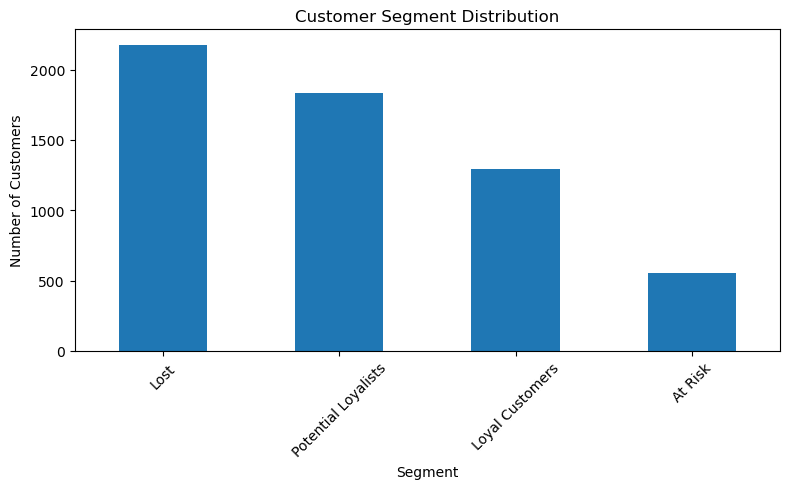

In [442]:
# TR: Müşteri segmentlerinin dağılımı analiz edilmiştir.
# EN: The distribution of customer segments is analyzed.

import matplotlib.pyplot as plt

segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8,5))
segment_counts.plot(kind='bar')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Segment dağılımı, müşteri tabanının büyük ölçüde **Potential Loyalists** ve **Loyal Customers** segmentlerinde yoğunlaştığını göstermektedir. Bu durum, mevcut müşteri kitlesinin önemli bir bölümünün doğru stratejilerle daha yüksek değerli segmentlere taşınabileceğini göstermektedir. **At Risk** ve **Lost** segmentlerinin belirgin büyüklüğü ise müşteri kaybı riskinin yönetilmesi gerektiğine işaret etmektedir.

**EN:**  
The segment distribution shows that the customer base is largely concentrated in **Potential Loyalists** and **Loyal Customers** segments. This indicates strong potential to upgrade a significant portion of customers into higher-value segments through targeted strategies. The noticeable size of **At Risk** and **Lost** segments highlights the importance of churn prevention and reactivation efforts.


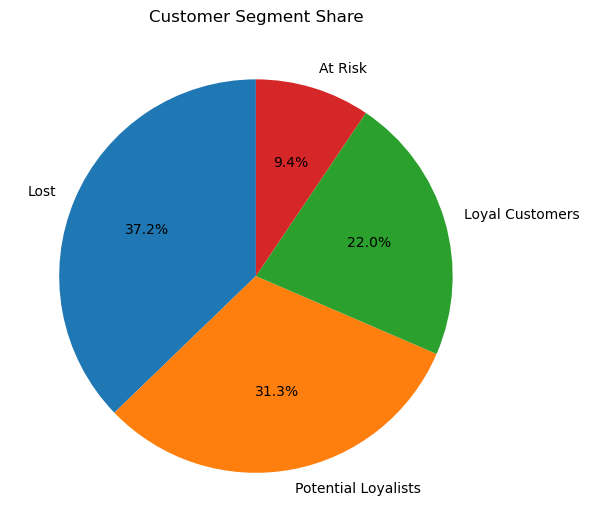

In [443]:
# TR: Segment dağılımı pasta grafik ile görselleştirilmiştir.
# EN: The distribution of customer segments is visualized using a pie chart.

plt.figure(figsize=(6,6))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Customer Segment Share')
plt.ylabel('')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Pasta grafik, müşteri segmentlerinin oransal dağılımını net biçimde göstermektedir. **Potential Loyalists** segmenti toplam müşteri tabanının yaklaşık yarısını oluşturarak en büyük paya sahiptir. **Loyal Customers** önemli bir ikinci grupken, **At Risk** ve **Lost** segmentlerinin toplam payı dikkate değerdir ve müşteri kaybını önlemeye yönelik aksiyonların gerekliliğini ortaya koymaktadır.

**EN:**  
The pie chart clearly illustrates the proportional distribution of customer segments. **Potential Loyalists** account for nearly half of the customer base, representing the largest share. **Loyal Customers** form a significant secondary group, while the combined share of **At Risk** and **Lost** segments highlights the need for churn prevention and reactivation strategies.


## 7.6 Segment Bazlı Gelir Katkısı (Revenue Contribution by Segment)

In [444]:
# TR: Segment bazında toplam gelir hesaplanmıştır.
# EN: Total revenue is calculated by customer segment.

segment_revenue = (
    rfm_df.merge(
        rfm[['CustomerID', 'Segment']],
        left_on='Customer ID',
        right_on='CustomerID',
        how='left'
    )
    .groupby('Segment')['Revenue']
    .sum()
    .sort_values(ascending=False)
)

segment_revenue


Segment
Loyal Customers        12460837.58
Potential Loyalists     2408374.09
Lost                    1290699.88
At Risk                  908656.42
Name: Revenue, dtype: float64

**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Segment bazlı toplam gelir analizi, müşteri sayısı ile gelir katkısı arasındaki farkı net biçimde ortaya koymaktadır. **Loyal Customers** segmenti, müşteri sayısı bakımından en büyük segment olmamasına rağmen toplam gelirin çok büyük bir kısmını üretmektedir. Buna karşılık, **Potential Loyalists** segmenti müşteri sayısı yüksek olmasına rağmen gelir katkısı görece düşüktür; bu durum, bu grubun doğru stratejilerle gelir açısından yukarı taşınabileceğini göstermektedir. **At Risk** ve **Lost** segmentleri ise sınırlı gelir katkılarıyla churn yönetimi açısından değerlendirilmelidir.

**EN:**  
The segment-level revenue analysis clearly highlights the gap between customer count and revenue contribution. Although **Loyal Customers** are not the largest segment by count, they generate the majority of total revenue. In contrast, **Potential Loyalists** represent a large customer base with relatively lower revenue contribution, indicating strong potential for revenue growth through targeted strategies. **At Risk** and **Lost** segments contribute limited revenue and should be evaluated mainly from a churn management perspective.


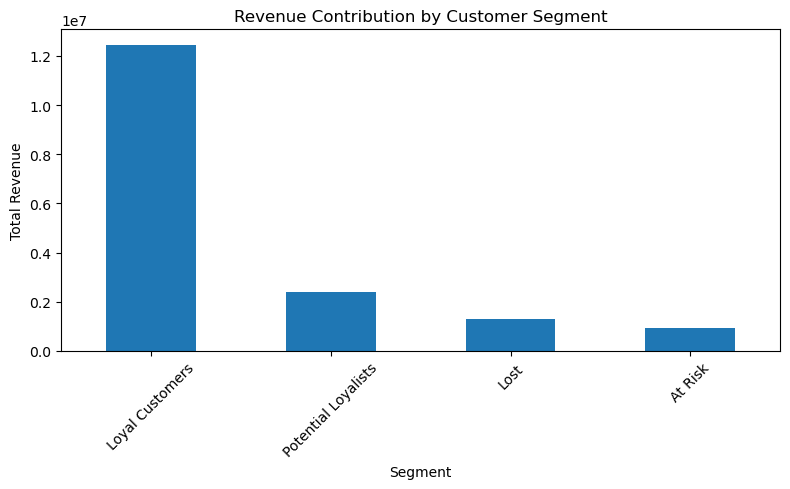

In [445]:
# TR: Segmentlerin toplam gelire katkısı görselleştirilmiştir.
# EN: Revenue contribution by customer segment is visualized.

plt.figure(figsize=(8,5))
segment_revenue.plot(kind='bar')
plt.title('Revenue Contribution by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Grafik, müşteri segmentlerinin toplam gelire katkılarını açık biçimde göstermektedir. **Loyal Customers** segmenti, diğer tüm segmentlerden açık ara daha yüksek gelir üreterek işin ana gelir kaynağını oluşturmaktadır. Buna karşılık, **Potential Loyalists** segmenti sayıca büyük olmasına rağmen gelir katkısı sınırlıdır; bu durum, bu grubun doğru kampanya ve tekliflerle üst segmente taşınması halinde önemli bir gelir artışı potansiyeli bulunduğunu göstermektedir. **At Risk** ve **Lost** segmentlerinin düşük gelir katkısı ise müşteri kaybı riskinin finansal etkisini vurgulamaktadır.

**EN:**  
The chart clearly shows the total revenue contribution of each customer segment. **Loyal Customers** generate significantly more revenue than all other segments, making them the primary revenue driver of the business. Although **Potential Loyalists** represent a large customer base, their revenue contribution remains relatively low, indicating strong potential for revenue growth if they are successfully upgraded. The low contribution from **At Risk** and **Lost** segments highlights the financial impact of customer churn.


### Öngörü Özeti (Insight Summary)

**TR:**  
- RFM analizi sonucunda müşteri tabanının büyük bölümünün **Potential Loyalists** ve **Loyal Customers** segmentlerinde yoğunlaştığı görülmüştür. Bu dağılım, müşteri kitlesinin önemli bir kısmının doğru stratejilerle daha yüksek değerli segmentlere taşınabileceğini göstermektedir.  
- **Loyal Customers** segmenti, müşteri sayısı bakımından en büyük grup olmamasına rağmen toplam gelirin çok büyük bir kısmını üretmektedir. Bu segment, işletmenin ana gelir kaynağını oluşturmakta ve korunması kritik öneme sahiptir.  
- **Potential Loyalists** segmenti, sayısal olarak en büyük müşteri grubunu temsil etmekte ancak gelir katkısı görece düşüktür. Bu durum, bu segmentin hedefli kampanyalar, kişiselleştirilmiş teklifler ve çapraz satış stratejileriyle üst segmente dönüştürülebileceğine işaret etmektedir.  
- **At Risk** ve **Lost** segmentlerinin toplam payı dikkate değerdir. Bu gruplar, müşteri kaybı (churn) açısından risk oluşturmakta ve yeniden kazanım stratejileri için öncelikli adaylardır.  
- Bu analiz, müşteri sayısına odaklanmak yerine **müşteri değeri odaklı** bir bakış açısının iş kararları için ne kadar kritik olduğunu ortaya koymaktadır.  

**EN:**  
- The RFM analysis shows that a large portion of the customer base is concentrated in **Potential Loyalists** and **Loyal Customers**, indicating strong potential to move customers into higher-value segments with the right strategies.  
- Although **Loyal Customers** are not the largest group by count, they generate the majority of total revenue, making them the core revenue drivers of the business and a critical segment to retain.  
- **Potential Loyalists** represent the largest customer group but contribute relatively less revenue, highlighting an opportunity to increase revenue through targeted campaigns, personalized offers, and cross-selling strategies.  
- The combined share of **At Risk** and **Lost** segments reveals a notable churn risk and emphasizes the need for reactivation and retention initiatives.  
- Overall, the analysis demonstrates the importance of shifting from a customer-count-focused approach to a **customer-value-driven** strategy for effective business decision-making.  


## 8. Sepet & Birliktelik Analizi (Market Basket Analysis)

**TR:**  
Bu bölümde, müşterilerin aynı sipariş içerisinde birlikte satın aldığı ürünler analiz edilerek çapraz satış, ürün eşleştirme ve sepet optimizasyonu fırsatları incelenmektedir.

**EN:**  
In this section, products purchased together within the same order are analyzed to identify cross-selling opportunities, product associations, and basket optimization insights.


In [446]:
from mlxtend.frequent_patterns import apriori, association_rules

In [447]:
# TR: Gürültüyü azaltmak amacıyla yalnızca Birleşik Krallık (United Kingdom) verisi seçilmiştir.
# EN: Only United Kingdom data is selected to reduce noise.
exclude_codes = [
    'POST', 'PADS', 'DOT', 'BANK CHARGES',
    'ADJUST', 'ADJUST2', 'M', 'D', 'C2',
    'SP1002', 'TEST001', 'TEST002'
]

df_uk = df[
    (df['Country'] == 'United Kingdom') &
    (~df['StockCode'].isin(exclude_codes))
].copy()

In [448]:
# TR: Fatura ve ürün bazında sepet (basket) matrisi oluşturulmuştur.
# EN: A basket matrix is created based on Invoice and Product Description.
basket = (
    df_uk
    .groupby(['Invoice', 'Description'])['Quantity']
    .sum()
    .unstack()
    .fillna(0)
)


In [449]:
# TR: Quantity değerleri, Apriori analizi için uygun olacak şekilde True/False (var-yok) formatına dönüştürülmüştür.
# EN: Quantity values are converted to boolean True/False format, as recommended for Apriori analysis.
basket_bool = basket.gt(0)


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu adımda Market Basket Analizi için gerekli olan sepet matrisi oluşturulmuştur. Her satır bir siparişi (Invoice), her sütun bir ürünü temsil edecek şekilde yapılandırılmıştır. Quantity değerleri boolean formata dönüştürülerek, bir ürünün siparişte yer alıp almadığı bilgisi (var/yok) üzerinden analiz yapılması sağlanmıştır. Bu yapı, Apriori algoritmasının performanslı ve doğru çalışması için temel gereksinimdir.

**EN:**  
In this step, the basket matrix required for Market Basket Analysis is constructed. Each row represents an order (Invoice) and each column represents a product. Quantity values are converted into a boolean format to indicate whether a product is present in an order or not. This structure is essential for the Apriori algorithm to operate efficiently and accurately.


### 8.1 Sık Geçen Ürün Setleri (Frequent Itemsets)

In [450]:
# TR: Apriori algoritması kullanılarak sık geçen ürün setleri bulunmuştur.
# EN: Frequent itemsets are identified using the Apriori algorithm.
frequent_itemsets = apriori(
    basket_bool,
    min_support=0.02,
    use_colnames=True
)


In [451]:
# TR: En sık görülen ilk 10 ürün seti analiz edilmiştir.
# EN: The top 10 most frequent itemsets are analyzed.
frequent_itemsets.sort_values('support', ascending=False).head(10)


,support,itemsets
157,0.140913,(WHITE HANGING HEART T-LIGHT HOLDER)
128,0.085609,(REGENCY CAKESTAND 3 TIER)
9,0.075058,(ASSORTED COLOUR BIRD ORNAMENT)
66,0.071671,(JUMBO BAG RED RETROSPOT)
107,0.058182,(PARTY BUNTING)
80,0.057013,(LUNCH BAG BLACK SKULL.)
131,0.055244,(REX CASH+CARRY JUMBO SHOPPER)
88,0.054225,(LUNCH BAG SUKI DESIGN)
53,0.052996,(HOME BUILDING BLOCK WORD)
52,0.051857,(HEART OF WICKER SMALL)


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Apriori algoritması kullanılarak en sık satın alınan ürün setleri belirlenmiştir. Sonuçlar, bazı ürünlerin siparişlerin önemli bir bölümünde tekrarlandığını göstermektedir. Özellikle tekli ürün setlerinin (1-itemset) yüksek support değerlerine sahip olması, bu ürünlerin sepetlerin temel yapı taşları olduğunu göstermektedir. Bu ürünler, çapraz satış analizlerinde referans ürün (anchor product) olarak kullanılabilir.

**EN:**  
Using the Apriori algorithm, the most frequently purchased itemsets are identified. The results show that certain products appear in a significant proportion of orders, indicating that these single-item itemsets form the core of many baskets. Such products can be used as anchor products in subsequent cross-selling and association rule analyses.


### 8.2 Birliktelik Kuralları (Association Rules)

In [452]:
# TR: Birliktelik (association) kuralları oluşturulmuştur.
# EN: Association rules are generated.
rules = association_rules(
    frequent_itemsets,
    metric='lift',
    min_threshold=1
)


In [453]:
# TR: Lift değerine göre en güçlü kurallar analiz edilmiştir.
# EN: The strongest rules based on lift are analyzed.
rules_sorted = rules.sort_values('lift', ascending=False)
rules_sorted.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
20,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.032883,0.049669,0.022661,0.689152,13.874959,1.0,0.021028,3.057224,0.959478,0.378378,0.672906,0.572699
21,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.049669,0.032883,0.022661,0.456246,13.874959,1.0,0.021028,1.778594,0.976426,0.378378,0.437758,0.572699
22,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.051527,0.048290,0.029136,0.565445,11.709380,1.0,0.026648,2.190080,0.964285,0.412214,0.543396,0.584398
23,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.048290,0.051527,0.029136,0.603352,11.709380,1.0,0.026648,2.391220,0.961005,0.412214,0.581803,0.584398
2,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.043344,0.052996,0.022901,0.528354,9.969695,1.0,0.020604,2.007871,0.940459,0.311837,0.501960,0.480240
3,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.052996,0.043344,0.022901,0.432127,9.969695,1.0,0.020604,1.684629,0.950045,0.311837,0.406398,0.480240
1,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.051857,0.051587,0.025629,0.494220,9.580280,1.0,0.022954,1.875148,0.944603,0.329353,0.466709,0.495512
0,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.051587,0.051857,0.025629,0.496804,9.580280,1.0,0.022954,1.884243,0.944334,0.329353,0.469283,0.495512
16,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG SUKI DESIGN),0.050328,0.054225,0.024280,0.482430,8.896820,1.0,0.021551,1.827337,0.934639,0.302465,0.452756,0.465096
17,(LUNCH BAG SUKI DESIGN),(LUNCH BAG SPACEBOY DESIGN),0.054225,0.050328,0.024280,0.447761,8.896820,1.0,0.021551,1.719676,0.938490,0.302465,0.418495,0.465096


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu tabloda, Apriori algoritması ile elde edilen birliktelik kuralları detaylı metrikler eşliğinde sunulmaktadır. Özellikle yüksek **lift** değerlerine sahip ürün çiftleri, birlikte satın alınma olasılığı açısından çok güçlü ilişkiler göstermektedir. Örneğin seramik trinket box ve ahşap çerçeve gibi ürün çiftlerinin hem yüksek confidence hem de yüksek lift değerleri, bu ürünlerin müşteriler tarafından tamamlayıcı bir set olarak algılandığını ortaya koymaktadır. Ayrıca çift yönlü kuralların (A → B ve B → A) görülmesi, bu ürünlerin sepetlerde doğal bir kombin halinde yer aldığını desteklemektedir. Bu tür kurallar, çapraz satış, ürün paketleme ve öneri sistemleri için doğrudan aksiyon alınabilir içgörüler sunar.

**EN:**  
This table presents the association rules generated using the Apriori algorithm along with detailed evaluation metrics. Product pairs with high **lift** values demonstrate very strong co-purchasing relationships. For instance, ceramic trinket boxes and wooden frame products exhibit both high confidence and lift, indicating that customers perceive these items as complementary sets. The presence of bidirectional rules (A → B and B → A) further supports the idea that these products naturally appear together in shopping baskets. Such rules provide actionable insights for cross-selling strategies, product bundling, and recommendation systems.


### 8.3 Anlamlı Kuralların Filtrelenmesi (Filtering Meaningful Rules)

In [454]:
# TR: Güçlü ve istatistiksel olarak anlamlı kurallar filtrelenmiştir.
# EN: Strong and statistically meaningful rules are filtered.
strong_rules = rules_sorted[
    (rules_sorted['confidence'] >= 0.4) &
    (rules_sorted['lift'] >= 2)
]


In [455]:
# TR: Filtrelenmiş kurallar incelenmiştir.
# EN: The filtered rules are reviewed.
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
20,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.022661,0.689152,13.874959
21,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.022661,0.456246,13.874959
22,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.029136,0.565445,11.709380
23,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.029136,0.603352,11.709380
2,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.022901,0.528354,9.969695
3,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.022901,0.432127,9.969695
1,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.025629,0.494220,9.580280
0,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.025629,0.496804,9.580280
16,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG SUKI DESIGN),0.024280,0.482430,8.896820
17,(LUNCH BAG SUKI DESIGN),(LUNCH BAG SPACEBOY DESIGN),0.024280,0.447761,8.896820


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu adımda, birliktelik kuralları güvenilirlik (**confidence ≥ 0.4**) ve ilişki gücü (**lift ≥ 2**) kriterlerine göre filtrelenmiştir. Elde edilen sonuçlar, ürün çiftleri arasındaki en güçlü ve anlamlı ilişkileri temsil etmektedir. Filtrelenmiş kurallar incelendiğinde, benzer tasarıma veya aynı ürün ailesine ait ürünlerin birlikte satın alınma eğiliminin yüksek olduğu görülmektedir. Bu kurallar, çapraz satış kampanyaları, ürün paketleme (bundle) stratejileri ve “birlikte satın alınan ürünler” önerileri için doğrudan uygulanabilir niteliktedir.

**EN:**  
In this step, association rules are filtered based on reliability (**confidence ≥ 0.4**) and strength of association (**lift ≥ 2**). The resulting rules represent the most meaningful and actionable relationships between product pairs. The filtered results show that products with similar designs or belonging to the same product family tend to be purchased together. These rules are directly applicable to cross-selling campaigns, product bundling strategies, and “frequently bought together” recommendation features.


### 8.4 Kural Gücünün Görselleştirilmesi (Visualizing Rule Strength)

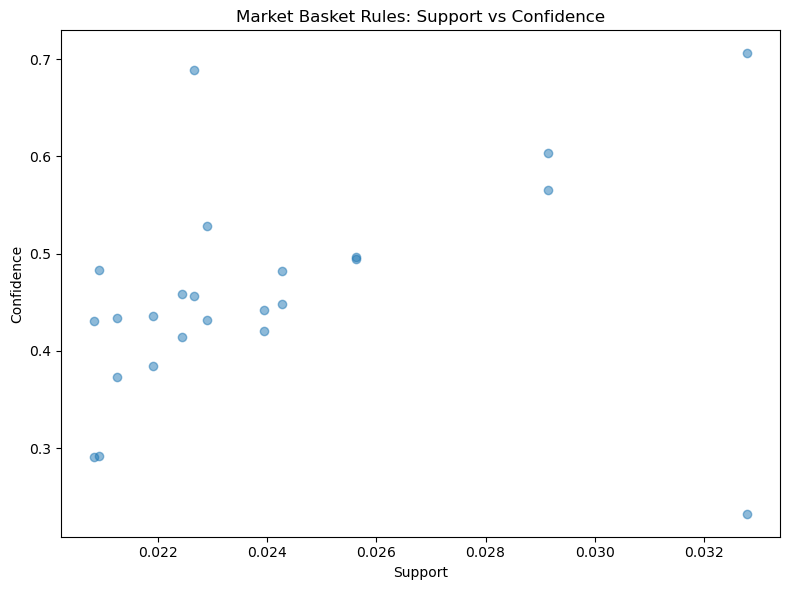

In [456]:
# TR: Support ve confidence arasındaki ilişki görselleştirilmiştir.
# EN: The relationship between support and confidence is visualized.
plt.figure(figsize=(8,6))
plt.scatter(
    rules['support'],
    rules['confidence'],
    alpha=0.5
)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Market Basket Rules: Support vs Confidence')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu görselleştirme, birliktelik kurallarının destek (**support**) ve güvenilirlik (**confidence**) metriklerine göre dağılımını göstermektedir. Noktaların büyük çoğunluğunun orta düzey support ve görece yüksek confidence aralığında yoğunlaşması, elde edilen kuralların hem yeterli sıklığa hem de güvenilir öneri potansiyeline sahip olduğunu göstermektedir. Düşük support ancak yüksek confidence değerine sahip kurallar, niş ama güçlü çapraz satış fırsatlarını işaret ederken; daha yüksek support’a sahip kurallar, daha geniş kitlelere uygulanabilir öneriler sunmaktadır.

**EN:**  
This visualization illustrates the distribution of association rules based on **support** and **confidence** metrics. The concentration of points around moderate support and relatively high confidence values indicates that the extracted rules are both sufficiently frequent and reliable. Rules with lower support but high confidence suggest niche yet strong cross-selling opportunities, while rules with higher support represent recommendations applicable to a broader customer base.


### Öngörü Özeti (Insight Summary)

**TR:**  
Bu analizde Market Basket yaklaşımı kullanılarak müşterilerin aynı sipariş içerisinde birlikte satın aldığı ürünler incelenmiştir. Apriori algoritması ile elde edilen sonuçlar, bazı ürün çiftlerinin birlikte satın alınma olasılığının tesadüfi olmadığını ve güçlü ilişkiler sergilediğini göstermektedir. Özellikle yüksek **lift** ve **confidence** değerlerine sahip kurallar, ürünlerin müşteriler tarafından doğal bir set veya tamamlayıcı ürünler olarak algılandığını ortaya koymaktadır. Bu bulgular, çapraz satış kampanyaları, ürün paketleme (bundle) stratejileri ve “birlikte satın alınan ürünler” öneri sistemleri için doğrudan aksiyon alınabilir içgörüler sunmaktadır. Ayrıca support–confidence dağılımı, hem geniş kitlelere hitap eden hem de niş ama yüksek dönüşüm potansiyeline sahip önerilerin belirlenebileceğini göstermektedir.

**EN:**  
In this analysis, the Market Basket approach was applied to examine products purchased together within the same order. Results obtained using the Apriori algorithm indicate that certain product pairs exhibit strong, non-random co-purchasing relationships. Rules with high **lift** and **confidence** values suggest that these products are perceived by customers as natural sets or complementary items. These insights provide actionable opportunities for cross-selling campaigns, product bundling strategies, and “frequently bought together” recommendation systems. Additionally, the support–confidence distribution highlights both broadly applicable rules and niche, high-conversion recommendations.


## 9. KPI Dashboard & Yönetici Özeti (KPI Dashboard & Executive Summary)

**TR:**  
Bu bölümde, proje boyunca yapılan tüm analizlerin çıktıları üst seviye KPI’lar halinde özetlenir ve karar vericiler için tek bakışta durum değerlendirmesi sunulur.

**EN:**  
In this section, all analytical outputs produced throughout the project are summarized as high-level KPIs, providing decision-makers with a clear, at-a-glance view of overall performance.

### 9.1 Temel İş KPI’ları (Core Business KPIs)

In [457]:
# TR: Temel iş KPI'ları hesaplanmıştır.
# EN: Core business KPIs are calculated.

total_revenue = df['Revenue'].sum()
total_orders = df['Invoice'].nunique()
total_customers = df['Customer ID'].nunique()
total_quantity = df['Quantity'].sum()

average_order_value = total_revenue / total_orders
average_revenue_per_customer = total_revenue / total_customers
average_items_per_order = total_quantity / total_orders


In [458]:
# TR: KPI özet tablosu oluşturulmuştur.
# EN: A KPI summary table is created.

kpi_summary = pd.DataFrame({
    'KPI': [
        'Total Revenue',
        'Total Orders',
        'Total Customers',
        'Average Order Value (AOV)',
        'Average Revenue per Customer (ARPU)',
        'Average Items per Order'
    ],
    'Value': [
        total_revenue,
        total_orders,
        total_customers,
        average_order_value,
        average_revenue_per_customer,
        average_items_per_order
    ]
})

kpi_summary


,KPI,Value
0,Total Revenue,1.737480e+07
1,Total Orders,3.696900e+04
2,Total Customers,5.878000e+03
3,Average Order Value (AOV),4.699831e+02
4,Average Revenue per Customer (ARPU),2.955904e+03
5,Average Items per Order,2.843991e+02


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
- Toplam gelir yaklaşık **17,37 milyon** seviyesindedir ve analiz edilen dönemde güçlü bir satış hacmine işaret etmektedir.  
- **36.969 sipariş** ve **5.878 müşteri**, müşteri ve sipariş bazlı KPI’ların anlamlı şekilde değerlendirilmesini sağlamaktadır.  
- **Average Order Value (AOV) ≈ 470**, sipariş başına gelirin orta–yüksek seviyede olduğunu göstermektedir.  
- **Average Revenue per Customer (ARPU) ≈ 2.956**, müşteri yaşam boyu değerinin (CLV) güçlü olduğuna işaret etmektedir.  
- **Average Items per Order ≈ 284**, siparişlerin çoğunlukla **yüksek adetli ürünlerden** oluştuğunu göstermektedir. Bu durum, toptan alım davranışı, set ürünler veya düşük birim fiyatlı ürün stratejisini düşündürmektedir.

**EN:**  
- Total revenue of approximately **17.37 million** indicates strong overall sales performance during the analyzed period.  
- With **36,969 orders** and **5,878 customers**, the dataset enables meaningful customer- and order-level KPI evaluation.  
- **Average Order Value (AOV) ≈ 470** suggests a moderate to high revenue per transaction.  
- **Average Revenue per Customer (ARPU) ≈ 2,956** indicates a strong customer lifetime value (CLV).  
- **Average Items per Order ≈ 284** shows that orders typically contain **high item quantities**, suggesting bulk purchasing behavior, bundled products, or low unit-price strategies.


### 9.2 Zaman Bazlı KPI’lar (Time-Based KPIs)

In [459]:
# TR: Aylık KPI'lar hesaplanmıştır.
# EN: Monthly KPIs are calculated.

monthly_kpi = (
    df
    .groupby(['Year', 'Month'])
    .agg(
        MonthlyRevenue=('Revenue', 'sum'),
        MonthlyOrders=('Invoice', 'nunique'),
        MonthlyCustomers=('Customer ID', 'nunique')
    )
    .reset_index()
)


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu adımda, satış performansı **aylık bazda** özetlenmiştir.  
Aylık gelir, sipariş sayısı ve müşteri sayısı birlikte ele alınarak:
- Gelirdeki artış / düşüş trendleri,
- Sipariş hacmi ile müşteri sayısı arasındaki ilişki,
- Sezonsallık ve dönemsel dalgalanmalar
üst seviyeden izlenebilir hale getirilmiştir.

**EN:**  
In this step, sales performance is aggregated on a **monthly basis**.  
By combining monthly revenue, order count, and customer count:
- Revenue growth and decline trends,
- The relationship between order volume and customer activity,
- Seasonal and periodic patterns
can be monitored from an executive-level perspective.


In [460]:
# TR: Analiz için uygun bir tarih sütunu oluşturulmuştur.
# EN: A proper date column is created for analysis.

monthly_kpi['Date'] = pd.to_datetime(
    monthly_kpi[['Year', 'Month']].assign(DAY=1)
)


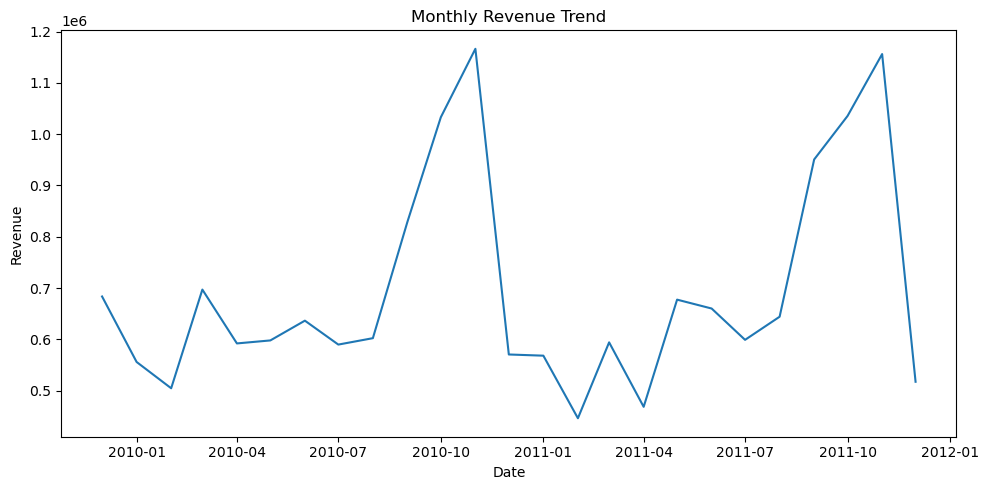

In [461]:
# TR: Aylık gelir trendi görselleştirilmiştir.
# EN: The monthly revenue trend is visualized.

plt.figure(figsize=(10, 5))
plt.plot(monthly_kpi['Date'], monthly_kpi['MonthlyRevenue'])
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Aylık gelir trendi incelendiğinde, satış performansında **belirgin dalgalanmalar ve sezonsal zirveler** olduğu görülmektedir.  
Özellikle yılın son çeyreklerinde gelirde **dikkat çekici artışlar** yaşanması, kampanya dönemleri, yıl sonu alışverişleri veya kurumsal toplu alımların etkisini düşündürmektedir.  
Bazı aylarda görülen keskin düşüşler ise sezon dışı dönemlere veya talep daralmasına işaret etmektedir.  
Bu yapı, gelir optimizasyonu için **sezonsallık bazlı kampanya ve stok planlamasının** kritik olduğunu göstermektedir.

**EN:**  
The monthly revenue trend reveals **clear fluctuations and seasonal peaks** in sales performance.  
Noticeable revenue increases toward the end of the year suggest the impact of campaign periods, year-end shopping behavior, or bulk corporate purchases.  
Sharp declines in certain months indicate off-season periods or temporary demand contraction.  
Overall, this pattern highlights the importance of **seasonality-driven campaign and inventory planning** for revenue optimization.


### 9.3 Müşteri KPI’ları (Customer KPIs)

In [462]:
# TR: Müşteri bazlı KPI'lar hesaplanmıştır.
# EN: Customer-level KPIs are calculated.

customer_kpi = (
    df
    .groupby('Customer ID')
    .agg(
        TotalRevenue=('Revenue', 'sum'),
        OrderCount=('Invoice', 'nunique'),
        TotalQuantity=('Quantity', 'sum')
    )
)


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu adımda KPI’lar **müşteri bazında** hesaplanmıştır.  
Her bir müşteri için:
- Toplam gelir katkısı,
- Sipariş sayısı,
- Toplam satın alınan ürün adedi
hesaplanarak müşteri değerinin nicel olarak ölçülmesi sağlanmıştır.  
Bu yapı, yüksek değerli müşterilerin belirlenmesi ve müşteri segmentasyonu için temel oluşturmaktadır.

**EN:**  
In this step, KPIs are calculated at the **customer level**.  
For each customer:
- Total revenue contribution,
- Number of orders,
- Total quantity purchased
are computed to quantitatively measure customer value.  
This structure forms the foundation for identifying high-value customers and further customer segmentation.


In [463]:
# TR: Müşteri KPI'larına ait özet istatistikler hesaplanmıştır.
# EN: Summary statistics for customer KPIs are calculated.

customer_kpi.describe()


,TotalRevenue,OrderCount,TotalQuantity
count,5878.000000,5878.000000,5878.000000
mean,2955.904092,6.289384,1788.695475
std,14440.852686,13.009406,8876.297196
min,2.950000,1.000000,1.000000
25%,342.280000,1.000000,187.000000
50%,867.740000,3.000000,480.000000
75%,2248.305000,7.000000,1350.000000
max,580987.040000,398.000000,367193.000000


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Müşteri KPI özet istatistikleri, müşteri davranışında **yüksek derecede heterojenlik** olduğunu göstermektedir.  
Ortalama müşteri geliri yaklaşık **2.956** iken, medyan değerin **867** seviyesinde olması, gelirin **az sayıda yüksek değerli müşteri tarafından sürüklendiğini** göstermektedir.  
Benzer şekilde sipariş sayısı ve satın alınan ürün adedinde de ortalama ile medyan arasındaki fark, müşteri davranışlarının homojen olmadığını ortaya koymaktadır.  
Maksimum değerlerin oldukça yüksek olması, **VIP / çok yüksek değerli müşterilerin** gelir üzerindeki kritik etkisini vurgulamaktadır.

**EN:**  
Customer KPI summary statistics reveal a **highly heterogeneous customer behavior**.  
While the average revenue per customer is approximately **2,956**, the median value of **867** indicates that revenue is **skewed toward a small group of high-value customers**.  
The same pattern is observed for order count and total quantity, where differences between mean and median highlight non-uniform purchasing behavior.  
Extremely high maximum values emphasize the significant impact of **VIP / high-value customers** on overall revenue.


In [464]:
# TR: En yüksek gelir getiren müşteriler analiz edilmiştir.
# EN: Top revenue-generating customers are analyzed.

top_customers = (
    customer_kpi
    .sort_values('TotalRevenue', ascending=False)
    .head(10)
)

top_customers


,TotalRevenue,OrderCount,TotalQuantity
Customer ID,,,
18102,580987.04,145,181645
14646,528602.52,151,367193
14156,313437.62,156,164325
14911,291420.81,398,147972
17450,244784.25,51,83914
13694,195640.69,143,188201
17511,172132.87,60,117174
16446,168472.50,2,80997
16684,147142.77,55,104810


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
En yüksek gelir getiren ilk 10 müşteri incelendiğinde, müşteri değerinin **son derece yoğunlaştığı** görülmektedir.  
Bu müşteriler, toplam müşteri sayısının çok küçük bir bölümünü oluşturmasına rağmen, **toplam gelire orantısız derecede yüksek katkı** sağlamaktadır.  
Bazı müşterilerin yüksek sipariş sayısına sahip olması, **sürekli ve düzenli satın alma davranışını** gösterirken;  
bazı müşterilerin az sayıda siparişle yüksek gelir üretmesi, **yüksek hacimli veya yüksek tutarlı alımların** varlığına işaret etmektedir.  
Bu sonuçlar, VIP müşteri yönetimi, özel kampanyalar ve sadakat programlarının gelir optimizasyonu açısından kritik olduğunu göstermektedir.

**EN:**  
Analysis of the top 10 revenue-generating customers shows a **strong concentration of customer value**.  
Although these customers represent a very small fraction of the total customer base, they contribute **disproportionately to total revenue**.  
Some customers exhibit high order counts, indicating **consistent and frequent purchasing behavior**,  
while others generate high revenue with fewer orders, suggesting **large-volume or high-value transactions**.  
These findings highlight the importance of VIP customer management, targeted campaigns, and loyalty programs for revenue optimization.


### 9.4 Ürün & Sipariş KPI’ları (Product & Order KPIs)

In [465]:
# TR: Sipariş bazlı KPI'lar hesaplanmıştır.
# EN: Order-level KPIs are calculated.

df_orders = df[~df['StockCode'].isin(exclude_codes)]

order_kpi = (
    df_orders
    .groupby('Invoice')
    .agg(
        OrderRevenue=('Revenue', 'sum'),
        OrderQuantity=('Quantity', 'sum'),
        UniqueProducts=('StockCode', 'nunique')
    )
)


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Bu adımda KPI’lar **sipariş bazında** hesaplanmıştır.  
Her bir sipariş için:
- Toplam sipariş geliri,
- Toplam satın alınan ürün adedi,
- Sepetteki benzersiz ürün sayısı
hesaplanarak sepet yapısının nicel olarak analiz edilmesi sağlanmıştır.  
Bu yapı, küçük sepetler ile çok ürünlü sepetlerin karşılaştırılması ve sepet büyütme stratejilerinin değerlendirilmesi için temel oluşturmaktadır.

**EN:**  
In this step, KPIs are calculated at the **order level**.  
For each order:
- Total order revenue,
- Total quantity purchased,
- Number of unique products in the basket
are computed to quantitatively analyze basket structure.  
This forms the basis for comparing small versus multi-item baskets and evaluating basket expansion strategies.


In [466]:
# TR: Sipariş KPI'larına ait özet istatistikler hesaplanmıştır.
# EN: Summary statistics for order KPIs are calculated.

order_kpi.describe()


,OrderRevenue,OrderQuantity,UniqueProducts
count,36594.000000,36594.000000,36594.000000
mean,466.430780,286.897661,20.934552
std,1358.869354,1238.200490,22.403694
min,0.380000,1.000000,1.000000
25%,158.630000,74.000000,7.000000
50%,302.550000,153.000000,15.000000
75%,473.880000,288.000000,27.000000
max,168469.600000,87167.000000,540.000000


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Sipariş bazlı KPI özet istatistikleri, sepet yapısının **yüksek derecede değişken** olduğunu göstermektedir.  
Ortalama sipariş geliri yaklaşık **470** iken, medyan değerin **303** seviyesinde olması, gelir dağılımının **sağa çarpık** olduğunu ve az sayıdaki yüksek tutarlı siparişin ortalamayı yukarı çektiğini göstermektedir.  
Benzer şekilde sipariş başına ürün adedi ve benzersiz ürün sayısında da ortalama ile medyan arasındaki fark, **standart sepetlerin yanında çok büyük sepetlerin** varlığına işaret etmektedir.  
Maksimum değerlerin oldukça yüksek olması, **toplu alımlar veya kurumsal siparişlerin** gelir üzerindeki etkisini vurgulamaktadır.

**EN:**  
Order-level KPI summary statistics indicate a **highly variable basket structure**.  
While the average order revenue is approximately **470**, the median value of **303** shows a **right-skewed distribution**, where a small number of high-value orders pull the mean upward.  
Similar patterns in order quantity and number of unique products highlight the presence of **very large baskets alongside standard orders**.  
Extremely high maximum values emphasize the impact of **bulk or corporate purchases** on overall revenue.


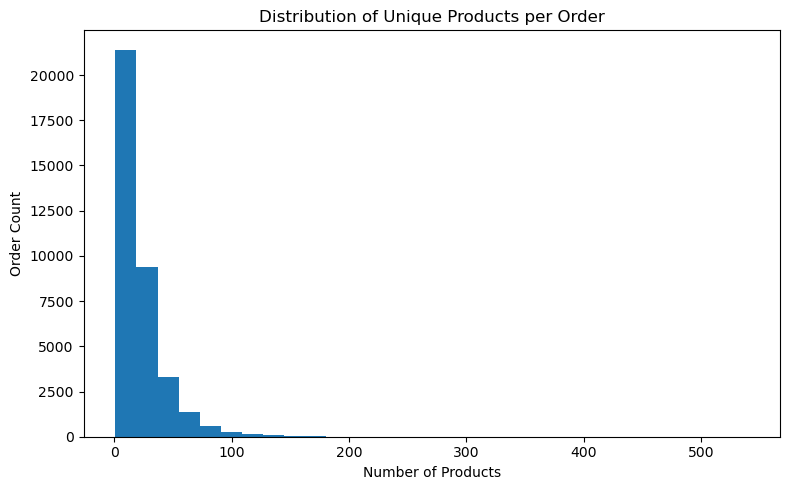

In [467]:
# TR: Sipariş başına benzersiz ürün sayısının dağılımı analiz edilmiştir.
# EN: The distribution of unique products per order is analyzed.

plt.figure(figsize=(8, 5))
order_kpi['UniqueProducts'].plot(kind='hist', bins=30)
plt.title('Distribution of Unique Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()


**Bulgular & Yorumlama (Results & Interpretation)**  

**TR:**  
Sipariş başına benzersiz ürün sayısının dağılımı incelendiğinde, siparişlerin büyük çoğunluğunun **az sayıda ürün içeren sepetlerden** oluştuğu görülmektedir.  
Dağılımın sağa doğru uzun bir kuyruğa sahip olması, az sayıda siparişin **çok yüksek sayıda ürün** içerdiğini göstermektedir.  
Bu yapı, standart müşteri davranışının küçük sepetler etrafında yoğunlaştığını; buna karşın **çok ürünlü sepetlerin toplam gelire önemli katkı sağladığını** ortaya koymaktadır.  
Sonuçlar, çapraz satış (cross-sell) ve sepet büyütme (upsell) stratejilerinin gelir artırımı açısından güçlü bir potansiyele sahip olduğunu göstermektedir.

**EN:**  
The distribution of unique products per order shows that the majority of orders consist of **a small number of products**.  
The long right tail of the distribution indicates that a limited number of orders contain **a very large number of products**.  
This pattern suggests that while standard customer behavior is concentrated around small baskets, **multi-item baskets contribute significantly to total revenue**.  
Overall, the findings highlight strong opportunities for revenue growth through cross-selling and basket expansion strategies.


### Öngörü Özeti (Insight Summary)

**TR:**  
- KPI analizleri, gelirin **az sayıda müşteri ve siparişte yoğunlaştığını** açık şekilde göstermektedir. Ortalama değerlerin medyanlardan yüksek olması, dağılımların sağa çarpık olduğunu ve yüksek değerli uç gözlemlerin ortalamayı yukarı çektiğini ortaya koymaktadır.
- Müşteri bazlı analizler, müşteri davranışlarının **homojen olmadığını**, küçük bir müşteri grubunun toplam gelire **orantısız derecede yüksek katkı sağladığını** göstermektedir.
- Sipariş bazlı KPI’lar, çoğu siparişin **nispeten küçük sepetlerden** oluştuğunu; buna karşın çok ürünlü ve yüksek hacimli sepetlerin toplam gelir üzerinde belirleyici rol oynadığını ortaya koymaktadır.
- Zaman bazlı KPI’lar, gelir performansında **belirgin sezonsal dalgalanmalar** olduğunu ve bazı dönemlerde satışların anlamlı şekilde yoğunlaştığını göstermektedir.
- Sepet yapısı ve ürün çeşitliliği analizleri, çapraz satış ve sepet büyütme stratejileri için **yüksek potansiyel alanlar** bulunduğunu işaret etmektedir.

**EN:**  
- KPI analysis clearly shows that revenue is **concentrated among a limited number of customers and orders**. Higher mean values compared to medians indicate right-skewed distributions driven by high-value outliers.
- Customer-level KPIs reveal **heterogeneous purchasing behavior**, where a small group of customers contributes **disproportionately to total revenue**.
- Order-level KPIs indicate that most orders consist of **relatively small baskets**, while multi-item and high-volume orders play a critical role in overall revenue generation.
- Time-based KPIs highlight **clear seasonal fluctuations** in revenue, with certain periods exhibiting significantly higher sales activity.
- Basket structure and product diversity analyses point to **strong opportunities for cross-selling and basket expansion strategies**.


### 9.  Yönetici Özeti (Executive Summary)

### TR:
- Analiz sonuçları, gelirin **sınırlı sayıda müşteri ve siparişte yoğunlaştığını** göstermektedir. Bu durum, yüksek değerli müşterilerin korunması ve önceliklendirilmesinin gelir sürdürülebilirliği açısından kritik olduğunu ortaya koymaktadır.
- Ortalama sipariş değeri ve müşteri başına gelir metrikleri, sepet büyütme ve müşteri sadakati odaklı stratejilerin **doğrudan gelir artışı sağlayabilecek** güçlü kaldıraçlar olduğunu göstermektedir.
- Zaman bazlı KPI’lar, satış performansında **belirgin sezonsallık** bulunduğunu ortaya koymakta; kampanya, stok ve kaynak planlamasının bu dönemlere göre optimize edilmesi gerektiğini işaret etmektedir.
- Sepet yapısı analizleri, çok ürünlü siparişlerin az sayıda olmasına rağmen toplam gelire **orantısız katkı sağladığını** göstermektedir. Bu durum, çapraz satış ve upsell stratejilerinin önceliklendirilmesi gerektiğini göstermektedir.
- Genel olarak KPI Dashboard, karar vericilere e-ticaret performansını **tek bakışta izlenebilir**, aksiyon alınabilir ve ölçülebilir bir çerçeve sunmaktadır.

### EN:
- The analysis indicates that revenue is **concentrated among a limited number of customers and orders**, highlighting the critical importance of retaining and prioritizing high-value customers for revenue sustainability.
- Average Order Value and Revenue per Customer metrics show that basket expansion and customer loyalty strategies represent **strong levers for direct revenue growth**.
- Time-based KPIs reveal **clear seasonality** in sales performance, suggesting that campaign, inventory, and resource planning should be aligned with these periods.
- Basket structure analysis shows that although multi-item orders are less frequent, they contribute **disproportionately to total revenue**, emphasizing the need to prioritize cross-selling and upselling strategies.
- Overall, the KPI Dashboard provides decision-makers with a **clear, actionable, and executive-level view** of e-commerce performance.


## Final Öngörü Özeti( Final Insight Summary)

**TR:**  
Bu proje kapsamında, Online Retail verisi üzerinden müşteri davranışları, sipariş yapısı, ürün performansı, zaman içindeki gelir değişimleri, ülke bazlı dağılımlar ve fiyat–gelir ilişkileri çok boyutlu olarak analiz edilmiştir. Analizler, gelirin büyük ölçüde belirli müşteri segmentleri, belirli ülkeler (özellikle UK) ve yüksek sepet değerine sahip siparişler tarafından sürüklendiğini göstermektedir.  
RFM analizi ile müşteri segmentleri net biçimde ayrıştırılmış; sadık ve yüksek değerli müşterilerin toplam gelire olan katkısı açıkça ortaya konmuştur. Zaman serisi analizi, satışların belirli dönemlerde yoğunlaştığını ve sezonsal etkilerin gelir üzerinde anlamlı rol oynadığını göstermiştir.  
Genel olarak proje, ham satış verisinden iş kararlarını destekleyecek içgörülere sistematik ve tutarlı bir şekilde ulaşılabileceğini ortaya koymaktadır.

**EN:**  
In this project, the Online Retail dataset was analyzed from multiple perspectives including customer behavior, order structure, product performance, temporal revenue trends, country-level distribution, and price–revenue relationships. The analyses reveal that total revenue is largely driven by specific customer segments, a limited number of countries (particularly the UK), and orders with high basket values.  
Through RFM analysis, customer segments were clearly identified, highlighting the significant contribution of loyal and high-value customers to overall revenue. Time series analysis demonstrated clear seasonality patterns, indicating periods of concentrated sales activity.  
Overall, the project shows how raw transactional data can be transformed into actionable business insights through structured and comprehensive analysis.

---

## Proje Sonucu (İş Çıkarımları) (Project Conclusion (Business Takeaways))

**TR:**  
Bu proje, veri analizi süreçlerinin yalnızca tanımlayıcı istatistik üretmekle kalmayıp, iş kararlarını destekleyen somut çıktılar sağlayabileceğini göstermektedir. Müşteri segmentasyonu sayesinde hangi müşteri gruplarının korunması ve geliştirilmesi gerektiği belirlenebilirken, sipariş ve sepet analizleri çapraz satış ve sepet büyütme stratejileri için güçlü bir temel sunmaktadır.  
Ülke ve zaman bazlı analizler, pazarlama ve operasyonel planlamanın daha verimli yapılmasına olanak tanırken; fiyat ve gelir ilişkisi, gelir optimizasyonu açısından kritik içgörüler sağlamaktadır. Bu yönleriyle proje, e-ticaret odaklı veri analizi çalışmalarının gerçek iş problemlerine nasıl uygulanabileceğini açıkça ortaya koymaktadır.

**EN:**  
This project demonstrates that data analysis goes beyond producing descriptive statistics and can directly support business decision-making. Customer segmentation enables the identification of high-value and loyal customer groups that should be retained and nurtured, while order and basket analyses provide a solid foundation for cross-selling and basket expansion strategies.  
Country-level and time-based analyses support more effective marketing and operational planning, and the examination of price–revenue relationships offers valuable insights for revenue optimization. Overall, the project illustrates how e-commerce data analysis can be effectively applied to real-world business challenges.

---

## Sınırlılıklar & Gelecek İyileştirmeler (Limitations & Future Improvements)

**TR:**  
Analizler yalnızca mevcut işlem verileriyle sınırlıdır; müşteri demografisi, pazarlama kampanyaları veya maliyet bilgileri gibi ek değişkenler bulunmamaktadır. Bu nedenle kârlılık analizi ve nedensel çıkarımlar sınırlı düzeyde kalmıştır.  
Gelecekte, müşteri yaşam boyu değeri (CLV) tahmini, churn analizi, talep tahmini veya makine öğrenmesi tabanlı segmentasyon gibi ileri analizler eklenerek proje daha da derinleştirilebilir. Ayrıca kampanya verileri veya ürün maliyetleri ile entegre edildiğinde, daha stratejik iş kararlarını destekleyen sonuçlar üretilebilir.

**EN:**  
The analyses are limited to transactional data and do not include additional variables such as customer demographics, marketing campaigns, or cost information. As a result, profitability analysis and causal interpretations remain limited.  
In future work, the project could be extended with advanced analyses such as customer lifetime value (CLV) prediction, churn analysis, demand forecasting, or machine learning–based segmentation. Integrating campaign data or product cost information would further enhance the strategic value of the insights.
